In [19]:
import openslide
import numpy
import matplotlib.pyplot as plt
slide = openslide.open_slide(r'E:\MN_datasheet\1842.ndpi')
print(slide.level_dimensions[0])

(182784, 102400)


# python json格式处理

In [20]:
import json

a_dict = {'a':'11', 'b':'22'}
json.dump(a_dict, open('demo.json', 'a'))
a_dict = {'a':'11', 'b':'22'}
json.dump(a_dict, open('demo.json', 'a'))


# 读取csv文件

In [11]:
import csv
from shutil import copyfile

src_path = r"E:\seed\train\train_org_image"
dst_path = r"E:\seed\train\3_classes_org_image"

with open(r'E:\seed\train\train_label.csv', 'r') as f:
    reader = csv.reader(f)
    print(type(reader))
    result = list(reader)
    print(len(result))
    for i in range(1, len(result)):
        copyfile(src_path + "\\" + result[i][0], dst_path + "\\" + result[i][1] + "\\" + result[i][0])
            
#         print(result[i][0])
    print("over")


<class '_csv.reader'>
1771
over


In [21]:
# 小图片拼接
import os
from PIL import Image
import cv2

width_i = 100
height_i = 100

row_max = 5
line_max = 5

all_path = list()
num = 0
pic_max = line_max * row_max

dir_name = r"E:\MN_datasheet\new_data_cyclegan\test"

# root文件夹的路径  dirs 路径下的文件夹列表  files路径下的文件列表
for root, dirs, files in os.walk(dir_name):
    for file in files:
        if "jpg" in file:  # 子串在母串里面不
            all_path.append(os.path.join(root,file))

# all_path获取每张图片的绝对路径

# toImage = Image.new('RGBA',(width_i*line_max,height_i*row_max))
toImage = Image.open(r"E:\MN_datasheet\datasheet_train_11397_20210121_screen\MNi\JPEGImages\good_1_2148.jpg", mode='r')


for i in range(row_max):
    for j in range(line_max):
        # 每次打开图片绝对路路径列表的第一张图片
        pic_fole_head = Image.open(all_path[num])
        # 获取图片的尺寸
        wihth,height = pic_fole_head.size
        # 按照指定的尺寸，给图片重新赋值，<PIL.Image.Image image mode=RGB size=200x200 at 0x127B7978>
        tmppic = pic_fole_head.resize((width_i, height_i))
        # 计算每个图片的左上角的坐标点(0, 0)，(0, 200)，(0, 400)，(200, 0)，(200, 200)。。。。(400, 400)
#         print(i)
#         print(j)
        loc = (int((i % line_max * width_i)+2*(i+1)), int((j % line_max * height_i)+2*(j+1)))
#         print(loc)
#         print("第{}张图的存放位置".format(num),loc)
        toImage.paste(tmppic, loc)
        num = num + 1

        if num >= len(all_path):
            print("breadk")
            break
    if num >= pic_max:
        break

print(toImage.size)
toImage.show(title=None, command=None)
# cv2.imshow("er",toImage)
# toImage.save('merged.png')

breadk
(512, 512)


In [ ]:
"""Saves a generated sample from the test set"""
    filePath = r'E:\MN_datasheet\single_extract\NBUD_average_rid_96'
    i = 0
    j = 0
    batch = 32
    for root, dirs, files in os.walk(filePath):
        for file in files:
            if i < batch * (j + 1):
                os.makedirs("E:/NBUD_gan/" + str(j), exist_ok=True)
                shutil.copyfile(filePath + '\\' + file, "E:/NBUD_gan/" + str(j) + '/' + str(i) + '.jpg')
            else:
                j += 1
                os.makedirs("E:/NBUD_gan/" + str(j), exist_ok=True)
                shutil.copyfile(filePath + '\\' + file, "E:/NBUD_gan/" + str(j) + '/' + str(i) + '.jpg')
            i += 1

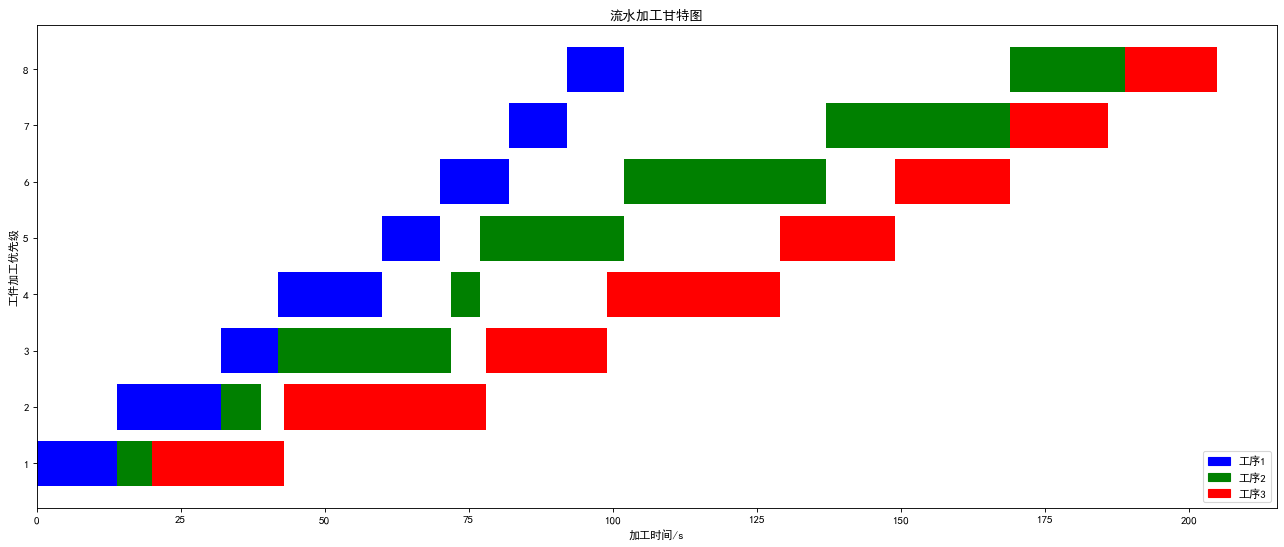

In [28]:
# coding=utf-8
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
add=[[14,6,23],[18,7,35],[10,30,21],[18,5,30],[10,25,20],[12,35,20],[10,32,17],[10,20,16]]
left=[[0,14,20],[14,32,43],[32,42,78],[42,72,99],[60,77,129],[70,102,149],[82,137,169],[92,169,189]]
m = range(len(add))
n=range(len(add[0]))
color = ['b','g','r','y','c','m','k']
 
#画布设置，大小与分辨率
plt.figure(figsize=(20,8),dpi=80)
#barh-柱状图换向，循坏迭代-层叠效果
for i in m:
    for j in n:
        plt.barh(m[i]+1, add[i][j], left=left[i][j],color=color[j])
plt.title("流水加工甘特图")
labels =[''] *len(add[0])
for f in n:
    labels[f] = "工序%d"%(f+1)
#图例绘制
patches = [ mpatches.Patch(color=color[i], label="{:s}".format(labels[i]) ) for i in range(len(add[0])) ]
plt.legend(handles=patches,loc=4)
#XY轴标签
plt.xlabel("加工时间/s")
plt.ylabel("工件加工优先级")
#网格线，此图使用不好看，注释掉
#plt.grid(linestyle="--",alpha=0.5)
plt.show()

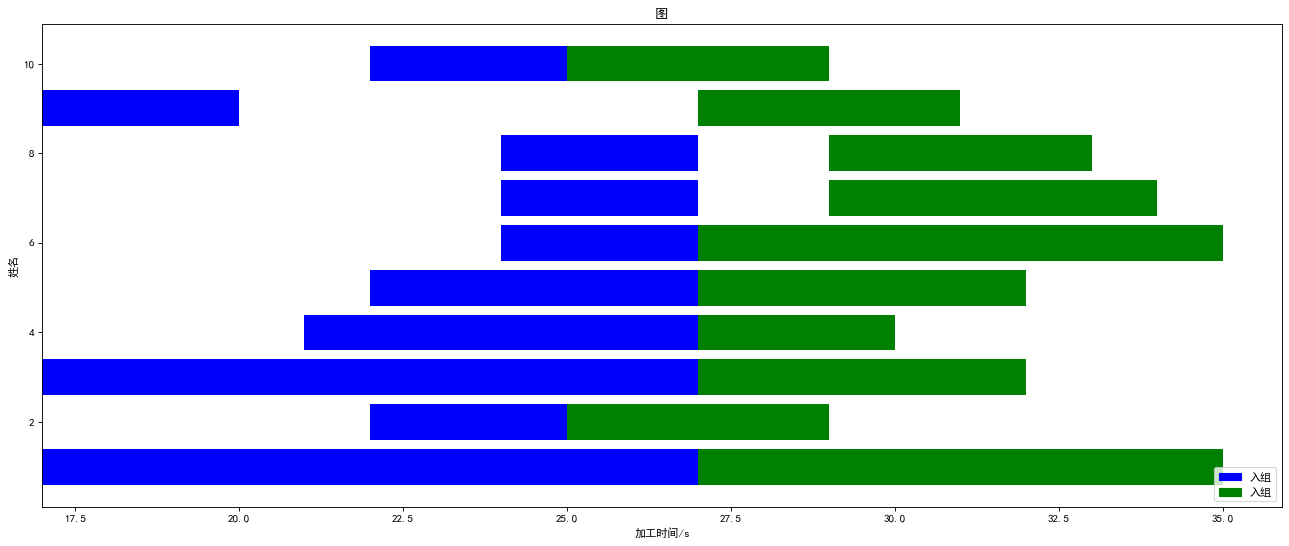

In [34]:
# coding=utf-8
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# add=[[14,6,1],[18,7,35],[100,30,21],[18,5,30],[10,25,20],[12,35,20],[10,32,17],[10,20,16]]
add=[[10,8],[3,4],[10,5],[6,3],[5,5],[3,8],[3,5],[3,4],[3,4],[3,4]]
left=[[17,27,35],[22,25,29],[17,27,32],[21,27,30],[22,27,32],[24,27,35],[24,29,36],[24,29,33],[17,27,35],[22,25,29]]
m = range(len(add))
n=range(len(add[0]))
color = ['b','g','r','y','c','m','k']
 
#画布设置，大小与分辨率
plt.figure(figsize=(20,8),dpi=80)
#barh-柱状图换向，循坏迭代-层叠效果
for i in m:
    for j in n:
        plt.barh(m[i]+1, add[i][j], left=left[i][j],color=color[j])
plt.title("图")
labels =[''] *len(add[0])
for f in n:
    labels[f] = "入组"
#     labels[f] = "工序%d"%(f+1)
#图例绘制
patches = [ mpatches.Patch(color=color[i], label="{:s}".format(labels[i]) ) for i in range(len(add[0])) ]
plt.legend(handles=patches,loc=4)
#XY轴标签
plt.xlabel("时间/s")
plt.ylabel("姓名")
#网格线，此图使用不好看，注释掉
#plt.grid(linestyle="--",alpha=0.5)
plt.show()

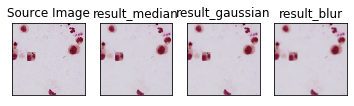

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#   读取图片
img = cv2.imread(r'E:\cyclegan_process\dup.png')

#   直方图
hist = cv2.calcHist([img], [0], None, [256], [0, 255])
plt.plot(hist, color='b')
# plt.show()
#   滤波
result_median = cv2.medianBlur(img, 9)
result_gaussian = cv2.GaussianBlur(img, (9, 9), 0)
result_blur = cv2.blur(img, (9, 9))
#   显示图形
titles = ['Source Image', 'result_median', 'result_gaussian', 'result_blur']
images = [img, result_median, result_gaussian, result_blur]
for i in range(4):
    plt.subplot(1, 4, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

In [2]:
# resize
#coding=utf-8
from PIL import Image
import os
image_width = 224
image_height = 224
def fixed_size(filePath,savePath):
    """按照固定尺寸处理图片"""
    im = Image.open(filePath)
    out = im.resize((image_width, image_height), Image.ANTIALIAS)
    # out.save(savePath)
    captcha = out.convert('RGB')
    captcha.save(savePath)

def changeSize():
    filePath = r'E:\seed\train\train_org_image'
    destPath = r'E:\seed\train\image_224'
    if not os.path.exists(destPath):
        os.makedirs(destPath)
    for root, dirs, files in os.walk(filePath):
        for file in files:
            if file[-1]=='g':
                fixed_size(os.path.join(filePath, file), os.path.join(destPath, file))
    print('Done')


if __name__ == '__main__':
    changeSize()

Done


In [24]:
# 计算SSIM
import skimage
import cv2
import os
# im1 和 im2 都为灰度图像，uint8 类型
src_0 = cv2.imread(r'E:\MN_datasheet\new_data\BN_average_128\cut_img_good_2_80.jpg')
gray_0 = cv2.cvtColor(src_0,cv2.COLOR_RGB2GRAY)
# src_1 = cv2.imread(r'E:\Targetdetection_model\PyTorch-GAN-master\implementations\dcgan\test_2\openslide_62.jpg')
# gray_1 = cv2.cvtColor(src_1,cv2.COLOR_RGB2GRAY)
# ssim = skimage.measure.compare_ssim(gray_0, gray_1, data_range=255)
# print(ssim)
path = r'E:\MN_datasheet\new_data\test'
ssim_res = {}
i = 0
for filename in os.listdir(path):
    src_1 = cv2.imread(path+'/'+filename)
    gray_1 = cv2.cvtColor(src_1,cv2.COLOR_RGB2GRAY)
    ssim = skimage.measure.compare_ssim(gray_0, gray_1, data_range=255) #对比的两张图size应该相同
    ssim_res[i] = ssim
    i += 1
print(ssim_res)
print("*************")
print(max(ssim_res.values()))
z = list(ssim_res.keys())[list(ssim_res.values()).index(max(ssim_res.values()))]
print(z)
print("*********")
print(min(ssim_res.values()))
z = list(ssim_res.keys())[list(ssim_res.values()).index(min(ssim_res.values()))]
print(z)

{0: 1.0, 1: 0.5315839567318891, 2: 0.5135681807331276, 3: 0.3602550664734394, 4: 0.5105676041180811}
*************
1.0
0
*********
0.3602550664734394
3


In [3]:
# cyclegan生成的图像质量评价
#MSE
import cv2
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio

img_classical = cv2.imread(r'E:\image_quality\classical.jpg')
img_original = cv2.imread(r'E:\image_quality\2_original.jpg')
img_generate = cv2.imread(r'E:/image_quality\2_generate.jpg')
img_classical = cv2.cvtColor(img_classical,cv2.COLOR_RGB2GRAY)
img_original = cv2.cvtColor(img_original,cv2.COLOR_RGB2GRAY)
img_generate = cv2.cvtColor(img_generate,cv2.COLOR_RGB2GRAY)

MSE = mean_squared_error(img_classical, img_original)
PSNR = peak_signal_noise_ratio(img_classical, img_original)
ssim = structural_similarity(img_classical, img_original, data_range=255) #对比的两张图size应该相同
print('MSE: ', MSE)
print('PSNR: ', PSNR)
print('SSIM: ', ssim)
print("***********")
MSE = mean_squared_error(img_classical, img_generate)
PSNR = peak_signal_noise_ratio(img_classical, img_generate)
ssim = structural_similarity(img_classical, img_generate, data_range=255) #对比的两张图size应该相同
print('MSE: ', MSE)
print('PSNR: ', PSNR)
print('SSIM: ', ssim)

MSE:  107.16590711805556
PSNR:  11.883630062712296
SSIM:  0.32777127358765995
***********
MSE:  97.84559461805554
PSNR:  14.27308099124425
SSIM:  0.36826499409347363


In [23]:
# cyclegan生成的图像质量评价,系列文件综合比较
#MSE
import cv2
import os
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio
import matplotlib.pyplot as plt

# img_original = cv2.imread(r'E:\image_quality\2_original.jpg')
# img_generate = cv2.imread(r'E:/image_quality\2_generate.jpg')
# img_original = cv2.cvtColor(img_original,cv2.COLOR_RGB2GRAY)
# img_generate = cv2.cvtColor(img_generate,cv2.COLOR_RGB2GRAY)

floder_classical_path = r'E:\MN_datasheet\new_data\MN_average_select_96'
floder_generate_path = r'E:\test1'
floder_original_path = r'E:\MN_datasheet\new_data_cyclegan\MN_gan\0'

MSE_generate_mean,PSNR_generate_mean,ssim_generate_mean = [],[],[]
MSE_original_mean,PSNR_original_mean,ssim_original_mean = [],[],[]
            
for root, dirs, files in os.walk(floder_generate_path):
    for file in files:
        print(root)
        print(file)
        img_generate_path = os.path.join(root, file)
#         print(img_generate_path)
        img_generate = cv2.imread(img_generate_path)
#         print(img_generate)
#         cv2.imshow("hu",img_generate)
        img_generate = cv2.cvtColor(img_generate,cv2.COLOR_RGB2GRAY)
        MSE_generate,PSNR_generate,ssim_generate = [],[],[]
        for root, dirs, files in os.walk(floder_classical_path):
            for file in files:
                img_classical_path = os.path.join(root, file)
                img_classical = cv2.imread(img_classical_path)
                img_classical = cv2.cvtColor(img_classical,cv2.COLOR_RGB2GRAY)
                    
                MSE_generate.append(mean_squared_error(img_classical, img_generate))
                PSNR_generate.append(peak_signal_noise_ratio(img_classical, img_generate))
                ssim_generate.append(structural_similarity(img_classical, img_generate, data_range=255)) #对比的两张图size应该相同
        MSE_generate_mean.append(sum(MSE_generate)/(len(MSE_generate)))
        PSNR_generate_mean.append(sum(PSNR_generate)/(len(PSNR_generate)))
        ssim_generate_mean.append(sum(ssim_generate)/(len(ssim_generate)))
for root, dirs, files in os.walk(floder_original_path):
    for file in files:
        img_original_path = os.path.join(root, file)
        img_original = cv2.imread(img_original_path)
        img_original = cv2.cvtColor(img_original,cv2.COLOR_RGB2GRAY)
        MSE_original,PSNR_original,ssim_original = [],[],[]
        for root, dirs, files in os.walk(floder_classical_path):
            for file in files:
                img_classical_path = os.path.join(root, file)
                img_classical = cv2.imread(img_classical_path)
                img_classical = cv2.cvtColor(img_classical,cv2.COLOR_RGB2GRAY)

                MSE_original.append(mean_squared_error(img_classical, img_original))
                PSNR_original.append(peak_signal_noise_ratio(img_classical, img_original))
                ssim_original.append(structural_similarity(img_classical, img_original, data_range=255)) #对比的两张图size应该相同
        MSE_original_mean.append(sum(MSE_original)/(len(MSE_original)))
        PSNR_original_mean.append(sum(PSNR_original)/(len(PSNR_original)))
        ssim_original_mean.append(sum(ssim_original)/(len(ssim_original)))

x = [i for i in range(32)]
# print(x)
plt.plot(x, MSE_generate)
plt.plot(x, MSE_original)
plt.show()

E:\test1
0.jpg
E:\MN_datasheet\new_data\MN_average_select_96
1.jpg


error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-i1s8y2i1\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


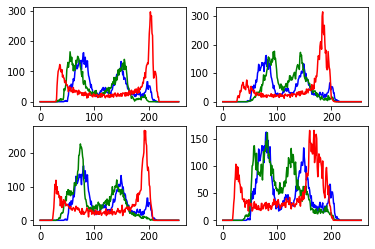

In [5]:
# cyclegan生成的图像质量评价，根据颜色直方图判断，筛选
#MSE
import cv2
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio
import matplotlib.pyplot as plt


img_classical = cv2.imread(r'E:\image_quality\classical.jpg')
img_original = cv2.imread(r'E:\image_quality\2_original.jpg')
img_generate = cv2.imread(r'E:/image_quality\2_generate.jpg')
img_classical = cv2.cvtColor(img_classical,cv2.COLOR_RGB2GRAY)
img_original = cv2.cvtColor(img_original,cv2.COLOR_RGB2GRAY)
img_generate = cv2.cvtColor(img_generate,cv2.COLOR_RGB2GRAY)
plt.subplot(2,2,1)
hist_classical = cv2.calcHist([img_classical],[0],None,[256],[0,255])
plt.plot(hist_classical,color='b')
hist_generate = cv2.calcHist([img_generate],[0],None,[256],[0,255])
plt.plot(hist_generate,color='g')
hist_original = cv2.calcHist([img_original],[0],None,[256],[0,255])
plt.plot(hist_original,color='r')
# 第二张
img_classical = cv2.imread(r'E:\image_quality\classical.jpg')
img_original = cv2.imread(r'E:\image_quality\5_original.jpg')
img_generate = cv2.imread(r'E:/image_quality\5_generate.jpg')
img_classical = cv2.cvtColor(img_classical,cv2.COLOR_RGB2GRAY)
img_original = cv2.cvtColor(img_original,cv2.COLOR_RGB2GRAY)
img_generate = cv2.cvtColor(img_generate,cv2.COLOR_RGB2GRAY)
plt.subplot(2,2,2)
hist_classical = cv2.calcHist([img_classical],[0],None,[256],[0,255])
plt.plot(hist_classical,color='b')
hist_generate = cv2.calcHist([img_generate],[0],None,[256],[0,255])
plt.plot(hist_generate,color='g')
hist_original = cv2.calcHist([img_original],[0],None,[256],[0,255])
plt.plot(hist_original,color='r')
# 第三张
img_classical = cv2.imread(r'E:\image_quality\classical.jpg')
img_original = cv2.imread(r'E:\image_quality\26_original.jpg')
img_generate = cv2.imread(r'E:/image_quality\26_generate.jpg')
img_classical = cv2.cvtColor(img_classical,cv2.COLOR_RGB2GRAY)
img_original = cv2.cvtColor(img_original,cv2.COLOR_RGB2GRAY)
img_generate = cv2.cvtColor(img_generate,cv2.COLOR_RGB2GRAY)
plt.subplot(2,2,3)
hist_classical = cv2.calcHist([img_classical],[0],None,[256],[0,255])
plt.plot(hist_classical,color='b')
hist_generate = cv2.calcHist([img_generate],[0],None,[256],[0,255])
plt.plot(hist_generate,color='g')
hist_original = cv2.calcHist([img_original],[0],None,[256],[0,255])
plt.plot(hist_original,color='r')
#第四张
img_classical = cv2.imread(r'E:\image_quality\classical.jpg')
img_original = cv2.imread(r'E:\image_quality\8_original.jpg')
img_generate = cv2.imread(r'E:/image_quality\8_generate.jpg')
img_classical = cv2.cvtColor(img_classical,cv2.COLOR_RGB2GRAY)
img_original = cv2.cvtColor(img_original,cv2.COLOR_RGB2GRAY)
img_generate = cv2.cvtColor(img_generate,cv2.COLOR_RGB2GRAY)
plt.subplot(2,2,4)
hist_classical = cv2.calcHist([img_classical],[0],None,[256],[0,255])
plt.plot(hist_classical,color='b')
hist_generate = cv2.calcHist([img_generate],[0],None,[256],[0,255])
plt.plot(hist_generate,color='g')
hist_original = cv2.calcHist([img_original],[0],None,[256],[0,255])
plt.plot(hist_original,color='r')

plt.show()

In [4]:
import os
import openslide as op
import subprocess as sp
import cv2
import numpy as np
import datetime
# 安装 openslide: https://github.com/openslide/openslide-python/issues/35
def main():
    slide = op.open_slide(r'E:\MN_datasheet\liuyu\W5-2.ndpi')
    (w, h) = slide.level_dimensions[0]
    index_w, count = 0, 0
    while index_w < w:

        index_h = 0
        while index_h < h:

            i = slide.read_region((index_w, index_h), 0, (1024, 1024))
            i = np.asarray(i)
#             if not os.path.exists("./output"):
#                 os.makedirs("./output")
            cv2.imwrite(r'E:\MN_datasheet\openslide\W5-2\W5-2_' + str(count) + ".jpg",
                        i[:, :, [2, 1, 0]], [cv2.IMWRITE_JPEG_QUALITY, 90])

            index_h += 1024
            count += 1
        index_w += 1024
if __name__ == '__main__':
    starttime = datetime.datetime.now()
    main()
    endtime = datetime.datetime.now()
    print("用时",endtime - starttime)

用时 0:15:16.875811


In [6]:
import os
import openslide as op
import subprocess as sp
import cv2
import numpy as np
import datetime
# 安装 openslide: https://github.com/openslide/openslide-python/issues/35
def main():
    slide = op.open_slide(r'E:\MN_datasheet\liuyu\W6-1.ndpi')
    (w, h) = slide.level_dimensions[0]
    index_w, count = 0, 0
    while index_w < w:

        index_h = 0
        while index_h < h:

            i = slide.read_region((index_w, index_h), 0, (1024, 1024))
            i = np.asarray(i)
            if not os.path.exists(r'E:\MN_datasheet\openslide\W6-1'):
                os.makedirs(r'E:\MN_datasheet\openslide\W6-1')
            cv2.imwrite(r'E:\MN_datasheet\openslide\W6-1\W6-1_' + str(count) + ".jpg",
                        i[:, :, [2, 1, 0]], [cv2.IMWRITE_JPEG_QUALITY, 90])

            index_h += 1024
            count += 1
        index_w += 1024
if __name__ == '__main__':
    starttime = datetime.datetime.now()
    main()
    endtime = datetime.datetime.now()
    print("用时",endtime - starttime)

用时 0:16:34.613319


In [ ]:
imgs = ["W10-1","W10-2","W10-3","W13-1","W13-2","W14-1","W14-2","W14-3","W16-1","W16-2","W16-3","W17-2","W17-3","W17-4","W20-2","W20-3","W20-4",
        "W22-1","W22-2","W22-3","W23-1","W23-2","W23-3","W42-1","W42-2","W42-3","W42-4","W44-1","W44-2","W45-1","W45-2","W45-3","W45-4","W7-1","W7-2","W9-1","W9-2","W9-3","W9-4"]

In [3]:
import os
import openslide as op
import subprocess as sp
import cv2
import numpy as np
import datetime
# 安装 openslide: https://github.com/openslide/openslide-python/issues/35
def main():
    imgs = ['1','2','3','4','6' ,'8','10', '11', '12', '13', '14', '15', '16', '17', '18', '19','20','7', '9']
    
    for i in range(0, len(imgs)):
        x=imgs[i]
        print(x)
        slide = op.open_slide(r'E:\MN_datasheet\HeJie20201106\\'+x+'.ndpi')
        (w, h) = slide.level_dimensions[0]
        index_w, count = 0, 0
        while index_w < w:

            index_h = 0
            while index_h < h:
 
                i = slide.read_region((index_w, index_h), 0, (512, 512))
                i = np.asarray(i)
                if not os.path.exists(r'E:\MN_datasheet\HeJie_512\\''good_'+x+''):
                    os.makedirs(r'E:\MN_datasheet\HeJie_512\\''good_'+x+'')
                cv2.imwrite(r'E:\MN_datasheet\HeJie_512\\''good_'+x+'\\''good_'+x+'_' + str(count) + ".jpg",
                            i[:, :, [2, 1, 0]], [cv2.IMWRITE_JPEG_QUALITY, 90])
                index_h += 512
                count += 1
            index_w += 512
if __name__ == '__main__':
    starttime = datetime.datetime.now()
    main()
    endtime = datetime.datetime.now() 
    print("用时",endtime - starttime)

1
2
3
4
6
8
4
10
11
12
13
14
15
16
17
18
19
20
7
9
用时 8:58:21.955206


In [ ]:
"W47-1","W47-2fan","W47-3fan","W48-1","W48-2","W48-3","W49-1","W49-2",
                "W49-3","W49-4","W52-1","W52-2","W52-3","W55-1","W55-2","W55-3","W56-1","W56-2","W56-3","W56-4","W57-1","W57-2","W57-3","W59-1","W59-2","W59-3","W60-1","W60-2","W60-3",

In [17]:
import os  
path = r"E:\MN_datasheet\openslide512\W6-1-label"
print(os.listdir(path))

['W6-1_10186.xml', 'W6-1_10424.xml', 'W6-1_10434.xml', 'W6-1_10444.xml', 'W6-1_10488.xml', 'W6-1_10500.xml', 'W6-1_10501.xml', 'W6-1_10633.xml', 'W6-1_10652.xml', 'W6-1_10657.xml', 'W6-1_10688.xml', 'W6-1_10956.xml', 'W6-1_11002.xml', 'W6-1_11106.xml', 'W6-1_11305.xml', 'W6-1_11379.xml', 'W6-1_11443.xml', 'W6-1_11558.xml', 'W6-1_11632.xml', 'W6-1_11659.xml', 'W6-1_11750.xml', 'W6-1_11890.xml', 'W6-1_11959.xml', 'W6-1_11986.xml', 'W6-1_12099.xml', 'W6-1_12147.xml', 'W6-1_12228.xml', 'W6-1_12338.xml', 'W6-1_12358.xml', 'W6-1_12453.xml', 'W6-1_12501.xml', 'W6-1_12594.xml', 'W6-1_12715.xml', 'W6-1_12907.xml', 'W6-1_13251.xml', 'W6-1_13482.xml', 'W6-1_13615.xml', 'W6-1_13726.xml', 'W6-1_13811.xml', 'W6-1_13969.xml', 'W6-1_14082.xml', 'W6-1_14144.xml', 'W6-1_1424.xml', 'W6-1_1447.xml', 'W6-1_1481.xml', 'W6-1_14911.xml', 'W6-1_15043.xml', 'W6-1_15201.xml', 'W6-1_15475.xml', 'W6-1_1551.xml', 'W6-1_1555.xml', 'W6-1_1579.xml', 'W6-1_15919.xml', 'W6-1_15981.xml', 'W6-1_16264.xml', 'W6-1_16268.xml

In [5]:
# 读取A文件的文件名到B文件挑选同名文件到C文件，有截取字符文件名修改，去掉cut
import os
import openslide as op
import subprocess as sp
import cv2
import numpy as np
import datetime
from shutil import copyfile
# 安装 openslide: https://github.com/openslide/openslide-python/issues/35
def main():
    os.getcwd()   #获取当前路径
 
    os.chdir(r"E:\MN_datasheet\new_data\NPBs_average_select")     #设置文件夹所在的位置
 
    os.listdir(".")

    filename=os.listdir(".")
 
    name=[]
    for i in filename:
        portion = os.path.splitext(i)   #把文件名拆分为名字和后缀
        if portion[1] == ".jpg":
            name.append(portion[0])
    imgs = name
    for i in range(0, len(imgs)):
        x=imgs[i]
#         print(x)
        x = x[8:]#截取cut字符
#         print(x)
        
        inputDir = r"E:\MN_datasheet\datasheet_train_11397_20210121_screen\nucles_data_20210121\images\all"
#         if not os.path.exists(r'E:\MN_datasheet\datasheet_train_1969_20201125\JPEGImages'):
#                     os.makedirs(r'E:\MN_datasheet\datasheet_train_1969_20201125\JPEGImages')
        outDir = r"E:\MN_datasheet\new_data\MNNPBsNBUD\images_all"
        copyfile(inputDir+'/'+x+".jpg", outDir+'/'+x+".jpg")
if __name__ == '__main__':
    starttime = datetime.datetime.now()
    main()
    endtime = datetime.datetime.now()
    print("用时",endtime - starttime)

用时 0:00:02.923110


In [7]:
# 读取A文件的文件名到B文件挑选同名文件到C文件
import os
import openslide as op
import subprocess as sp
import cv2
import numpy as np
import datetime
from shutil import copyfile
# 安装 openslide: https://github.com/openslide/openslide-python/issues/35
def main():
    os.getcwd()   #获取当前路径
 
    os.chdir(r"E:\Targetdetection_model\deep-learning-for-image-processing-master\pytorch_object_detection\select_MN\JPEGImages")     #设置文件夹所在的位置
 
    os.listdir(".")

    filename=os.listdir(".")
 
    name=[]
    for i in filename:
        portion = os.path.splitext(i)   #把文件名拆分为名字和后缀
        if portion[1] == ".jpg":
            name.append(portion[0])
    imgs = name
    for i in range(0, len(imgs)):
        x=imgs[i]
        inputDir = r"E:\MN_datasheet\datasheet_train_11397_20210121_screen\nucles_data_20210121\labels_xml\all"
#         if not os.path.exists(r'E:\MN_datasheet\datasheet_train_1969_20201125\JPEGImages'):
#                     os.makedirs(r'E:\MN_datasheet\datasheet_train_1969_20201125\JPEGImages')
        outDir = r"E:\Targetdetection_model\deep-learning-for-image-processing-master\pytorch_object_detection\select_MN\Annotations"
        copyfile(inputDir+'/'+x+".xml", outDir+'/'+x+".xml")
if __name__ == '__main__':
    starttime = datetime.datetime.now()
    main()
    endtime = datetime.datetime.now()
    print("用时",endtime - starttime)

用时 0:00:02.085745


In [3]:
#查找出两个文件夹内文件名不同的
# -*- coding: utf-8 -*-
import os


path1 = r'E:\MN_datasheet\datasheet_train_11397_20210121_screen\nucles_data_20210121\images\test_new'
path2 = r'E:\MN_datasheet\datasheet_train_11397_20210121_screen\nucles_data_20210121\labels_xml\test_new'

def file_name(image_dir,xml_dir):
    jpg_list = []
    xml_list = []
    for root, dirs, files in os.walk(image_dir):
        for file in files:
            jpg_list.append(os.path.splitext(file)[0])
    for root, dirs, files in os.walk(xml_dir):
        for file in files:
            xml_list.append(os.path.splitext(file)[0])
    print(len(jpg_list))
    diff = set(xml_list).difference(set(jpg_list))  # 差集，在a中但不在b中的元素
    for name in diff:
        print("no jpg", name + ".xml")
    diff2 = set(jpg_list).difference(set(xml_list))  # 差集，在b中但不在a中的元素
    print(len(diff2))
    for name in diff2:
        print("no xml", name + ".jpg")
if __name__ == '__main__':

    file_name(path1,path2)

2047
2
no xml valid.jpg
no xml train.jpg


In [69]:
# 遍历读取xml文件类别数量
#coding=utf-8
import xml.dom.minidom
import os
import sys

rootdir=r'E:\Targetdetection_model\deep-learning-for-image-processing-master\pytorch_object_detection\select+gan_MN\Annotations'#存有xml文件的文件夹的绝对路径
list=os.listdir(rootdir)#列出文件夹下所有的目录与文件

classes_list=[]
classes_count_imag=[0,0,0,0,0,0,0]#统计含有各个目标的图片数
classes_count_object=[0,0,0,0,0,0,0]#统计各个目标的总数

for i in range(0,len(list)):
    path=os.path.join(rootdir,list[i])
    if os.path.isfile(path):
        #用于区分imag和object
        flag=[0,0,0,0,0,0,0]
        #打开xml文档
        dom=xml.dom.minidom.parse(path)
        #得到文档元素对象
        root=dom.documentElement
        cc=dom.getElementsByTagName('name')
        ff=dom.getElementsByTagName('path')

#         f1=ff[0]

    
        for i in range(len(cc)):
            c1=cc[i]
            #如果是新的目标则将其加入classes_list数组中
            if classes_list.count(c1.firstChild.data)==0:
                classes_list.append(c1.firstChild.data)
#             if c1.firstChild.data == "NBUD":
# #                 print (c1.firstChild.data)
# #                 print("NBUD")
#             if c1.firstChild.data == "MNi":
# #                 print (c1.firstChild.data)
# #                 print("MNi")
#             if c1.firstChild.data == "NPBS":
# #                 print (c1.firstChild.data)
# #                 print("NPBS*******************************************************************")
#             if c1.firstChild.data == "NBUd":
# #                 print (c1.firstChild.data)
# #                 print("NPBS*************************////////////////////////////////////////////////******************************************")
            
            else:
                for j in range(0,len(classes_list)):
                    if(classes_list[j]==c1.firstChild.data):
                        if(flag[j]==0):
                            classes_count_imag[j]+=1
                            flag[j]=1
                        classes_count_object[j]+=1
print(classes_list)
print(len(classes_list))
images = 0
objects = 0
for i in range(len(classes_list)):
    print("类别%20s             num:%10d个"%(classes_list[i],classes_count_object[i]))
    objects = objects + classes_count_object[i]
print("object_sum:%d个"%(objects))

['MNi', 'NBUD', 'NPBs']
3
类别                 MNi             num:       993个
类别                NBUD             num:       568个
类别                NPBs             num:      1168个
object_sum:2729个


In [44]:
# 删除文件夹内的某问价
from PIL import Image

dic = {'788',"1117","2611","2660","2996","3159","3475","3654","3986","4630","4634","5755","6281",
       '6437',"6481","6516","6863","8602","8845","9065","9699","11452","12151","12302","12395","12986",
      '13084',"13369","13432","13472","13593","14464","14528","14541","14643","14699","14902","15488","15783",
       '15800',"17539","17678","18321","18437","18450","18948","19336","19938","19977"}
path = r"E:\MN_datasheet\new_data\BN_average_select_96_bigimages_labels\images"
i = 0
for root, dirs, files in os.walk(path):
        for file in files:
            
            if file[7:-4] in dic:
#                 print(file[7:-4])
                i += 1
                os.remove(root + "\\" + file)
print(i)

49


In [28]:
from PIL import Image

os.getcwd()   #获取当前路径
os.chdir(r"E:\water_detect\test-A-image")     #设置文件夹所在的位置
os.listdir(".")
filename=os.listdir(".")
print(filename)
dic = {}
for i in filename:
    im = Image.open(i)
#     size = []
    s = str(im.size[0])+"*"+str(im.size[1])
    if s not in dic:
        dic[s] = 1
    else:
        dic[s] += 1
for k,v in dic.items():
    print("测试集："+"尺寸："+str(k)+"个数:"+str(v))

['000001.jpg', '000002.jpg', '000003.jpg', '000004.jpg', '000005.jpg', '000006.jpg', '000007.jpg', '000008.jpg', '000009.jpg', '000010.jpg', '000011.jpg', '000012.jpg', '000013.jpg', '000014.jpg', '000015.jpg', '000016.jpg', '000017.jpg', '000018.jpg', '000019.jpg', '000020.jpg', '000021.jpg', '000022.jpg', '000023.jpg', '000024.jpg', '000025.jpg', '000026.jpg', '000027.jpg', '000028.jpg', '000029.jpg', '000030.jpg', '000031.jpg', '000032.jpg', '000033.jpg', '000034.jpg', '000035.jpg', '000036.jpg', '000037.jpg', '000038.jpg', '000039.jpg', '000040.jpg', '000041.jpg', '000042.jpg', '000043.jpg', '000044.jpg', '000045.jpg', '000046.jpg', '000047.jpg', '000048.jpg', '000049.jpg', '000050.jpg', '000051.jpg', '000052.jpg', '000053.jpg', '000054.jpg', '000055.jpg', '000056.jpg', '000057.jpg', '000058.jpg', '000059.jpg', '000060.jpg', '000061.jpg', '000062.jpg', '000063.jpg', '000064.jpg', '000065.jpg', '000066.jpg', '000067.jpg', '000068.jpg', '000069.jpg', '000070.jpg', '000071.jpg', '0000

测试集：尺寸：1920*1080个数:34
测试集：尺寸：2560*1440个数:14
测试集：尺寸：2048*1536个数:12
测试集：尺寸：3840*2160个数:978
测试集：尺寸：720*405个数:162


In [4]:
import os, random, shutil

def moveFile(fileDir, tarDir):
    pathDir = os.listdir(fileDir)  # 取图片的原始路径
    filenumber = len(pathDir)
    rate = 0.2 # 自定义抽取图片的比例，比方说100张抽10张，那就是0.1
    picknumber = int(filenumber * rate)  # 按照rate比例从文件夹中取一定数量图片
    sample = random.sample(pathDir, picknumber)  # 随机选取picknumber数量的样本图片
#     print(sample)
    print(len(sample))
    for name in sample:
#         shutil.copyfile(fileDir +'/'+ name, tarDir +'/'+ name)
        shutil.move(fileDir +'/'+ name, tarDir +'/'+ name)
        
if __name__ == '__main__':
    fileDir = r"E:\Transformer_model\Swin-Transformer-classfication\data\newdata_classification_224_original+cyclegan\train\NBUD"  # 源图片文件夹路径
    tarDir = r'E:\Transformer_model\Swin-Transformer-classfication\data\newdata_classification_224_original+cyclegan\val\NBUD'  # 移动到新的文件夹路径
    moveFile(fileDir, tarDir)

145


## 挑选比例，image与mask一起移动

In [1]:
import os, random, shutil

def moveFile(fileDir, tarDir):
    pathDir = os.listdir(fileDir)  # 取图片的原始路径
    filenumber = len(pathDir)
    rate = 0.1 # 自定义抽取图片的比例，比方说100张抽10张，那就是0.1
    picknumber = int(filenumber * rate)  # 按照rate比例从文件夹中取一定数量图片
    sample = random.sample(pathDir, picknumber)  # 随机选取picknumber数量的样本图片
#     print(sample)
    print(len(sample))
    for name in sample:
#         shutil.copyfile(fileDir +'/'+ name, tarDir +'/'+ name)
        shutil.move(fileDir +'/'+ name, tarDir +'/'+ name)
        shutil.move(fileDir.replace('train\image', 'train\mask') +'/'+ name, tarDir.replace('val\image', 'val\mask') +'/'+ name)
        
if __name__ == '__main__':
    fileDir = r"E:\Imageseg_model\Semantic-Segmentation-of-Pathological-Images-master\datasets\seed_data_512\train\image"  # 源图片文件夹路径
    tarDir = r'E:\Imageseg_model\Semantic-Segmentation-of-Pathological-Images-master\datasets\seed_data_512\val\image'  # 移动到新的文件夹路径
    moveFile(fileDir, tarDir)

179


In [70]:
# 复制整个文件夹文件到另一个文件夹
import os, random, shutil

def moveFile(fileDir, tarDir):
    pathDir = os.listdir(fileDir)  # 取图片的原始路径
    filenumber = len(pathDir)
#     rate = 0.5 # 自定义抽取图片的比例，比方说100张抽10张，那就是0.1
#     picknumber = int(filenumber * rate)  # 按照rate比例从文件夹中取一定数量图片
    sample = random.sample(pathDir, filenumber)  # 随机选取picknumber数量的样本图片
#     print(sample)
    print(len(sample))
    for name in sample:
#         shutil.copyfile(fileDir +'/'+ name, tarDir +'/'+ name)
        shutil.copyfile(fileDir +'/'+ name, tarDir +'/'+ name)
    print(filenumber)
        
if __name__ == '__main__':
    fileDir = r"E:\MN_datasheet\new_data\MNNPBsNBUD\resize_cleanbackground_gan_select+original5floder\0\labels"  # 源图片文件夹路径
    tarDir = r'E:\MN_datasheet\new_data\MNNPBsNBUD\resize_MN_5_floder_cleanbckgan\4\labels\val'  # 移动到新的文件夹路径
    moveFile(fileDir, tarDir)
#     print()

320
320


In [10]:
# coding=utf-8
"""选出指定标签的xml文件"""
#"""选出对应标签的图片"""
import os
import os.path
import xml.dom.minidom
import shutil
import sys
path = r"E:\MN_datasheet\HeJie_512\good_2_BN"
newpath=r"E:\MN_datasheet\HeJie_512\good_2_BN_annoations"
 
label_path = r"E:\MN_datasheet\HeJie_512\good_2_BN_annoations"
image_path = r"E:\MN_datasheet\HeJie_512\good_2"
image_new_path =r"E:\MN_datasheet\HeJie_512\good_2_BN_images"
files = os.listdir(path)  # 得到文件夹下所有文件名称
# s = []
classes={"BN"}
new =[]
 
def selete_xml_file():
    j = 1
    for xmlFile in files:
        # 遍历文件夹
        j=j+1
        fp = os.path.join(path, xmlFile)
        # print(fp)
        portion = os.path.splitext(xmlFile)
        if not os.path.isdir(xmlFile):
            # 判断是否是文件夹,不是文件夹才打开
            # print (xmlFile)
 
            # xml文件读取操作
 
            # 将获取的xml文件名送入到dom解析
            dom = xml.dom.minidom.parse(os.path.join(path, xmlFile))
            ###最核心的部分os.path.join(path,xmlFile),路径拼接,输入的是具体路径
            root = dom.documentElement
            name = root.getElementsByTagName('name')
            # print(name)
            # pose=root.getElementsByTagName('pose')
            # 重命名class name
            for i in range(len(name)):
                # print (name[i].firstChild.data)
                # print(xmlFile)
                # if name[i].firstChild.data=="one":
                if name[i].firstChild.data in classes:
                    # print("jjjjj")
                    newfp = os.path.join(newpath, os.path.basename(fp))
                    shutil.copyfile(fp, newfp)
                    print(j)
                    # new.append(fp)

                    
def selete_image_file():
    k= 0
    # image_file = os.listdir(image_path)
    # list = os.listdir(newpath)
    list =[]
    for label in os.listdir(label_path):
        label = label.split('.',1)[0]
        list.append(label)
 
    for image in os.listdir(image_path):
        print(image)
        image_name= image.split('.',1)[0]
        print(image_name)
        if image_name in list:
            k=k+1
            print(k)
            newfp = os.path.join(image_new_path, os.path.basename(image))
            image = os.path.join(image_path, image)
            print(image)
            print(newfp)
            shutil.copyfile(image, newfp)
            print(k)
 
selete_image_file()
# selete_xml_file()

good_2_0.jpg
good_2_0
good_2_1.jpg
good_2_1
good_2_10.jpg
good_2_10
good_2_100.jpg
good_2_100
good_2_1000.jpg
good_2_1000
good_2_10000.jpg
good_2_10000
good_2_10001.jpg
good_2_10001
good_2_10002.jpg
good_2_10002
good_2_10003.jpg
good_2_10003
good_2_10004.jpg
good_2_10004
good_2_10005.jpg
good_2_10005
good_2_10006.jpg
good_2_10006
good_2_10007.jpg
good_2_10007
good_2_10008.jpg
good_2_10008
good_2_10009.jpg
good_2_10009
good_2_1001.jpg
good_2_1001
good_2_10010.jpg
good_2_10010
good_2_10011.jpg
good_2_10011
good_2_10012.jpg
good_2_10012
good_2_10013.jpg
good_2_10013
good_2_10014.jpg
good_2_10014
good_2_10015.jpg
good_2_10015
good_2_10016.jpg
good_2_10016
good_2_10017.jpg
good_2_10017
good_2_10018.jpg
good_2_10018
good_2_10019.jpg
good_2_10019
good_2_1002.jpg
good_2_1002
good_2_10020.jpg
good_2_10020
good_2_10021.jpg
good_2_10021
good_2_10022.jpg
good_2_10022
good_2_10023.jpg
good_2_10023
good_2_10024.jpg
good_2_10024
good_2_10025.jpg
good_2_10025
good_2_10026.jpg
good_2_10026
good_2_10027

good_2_10526
good_2_10527.jpg
good_2_10527
good_2_10528.jpg
good_2_10528
good_2_10529.jpg
good_2_10529
good_2_1053.jpg
good_2_1053
good_2_10530.jpg
good_2_10530
good_2_10531.jpg
good_2_10531
good_2_10532.jpg
good_2_10532
good_2_10533.jpg
good_2_10533
good_2_10534.jpg
good_2_10534
good_2_10535.jpg
good_2_10535
good_2_10536.jpg
good_2_10536
good_2_10537.jpg
good_2_10537
good_2_10538.jpg
good_2_10538
good_2_10539.jpg
good_2_10539
good_2_1054.jpg
good_2_1054
good_2_10540.jpg
good_2_10540
good_2_10541.jpg
good_2_10541
good_2_10542.jpg
good_2_10542
good_2_10543.jpg
good_2_10543
good_2_10544.jpg
good_2_10544
good_2_10545.jpg
good_2_10545
good_2_10546.jpg
good_2_10546
good_2_10547.jpg
good_2_10547
good_2_10548.jpg
good_2_10548
good_2_10549.jpg
good_2_10549
good_2_1055.jpg
good_2_1055
good_2_10550.jpg
good_2_10550
good_2_10551.jpg
good_2_10551
good_2_10552.jpg
good_2_10552
good_2_10553.jpg
good_2_10553
good_2_10554.jpg
good_2_10554
good_2_10555.jpg
good_2_10555
good_2_10556.jpg
good_2_10556
goo

good_2_11017
good_2_11018.jpg
good_2_11018
good_2_11019.jpg
good_2_11019
good_2_1102.jpg
good_2_1102
good_2_11020.jpg
good_2_11020
good_2_11021.jpg
good_2_11021
good_2_11022.jpg
good_2_11022
good_2_11023.jpg
good_2_11023
good_2_11024.jpg
good_2_11024
good_2_11025.jpg
good_2_11025
good_2_11026.jpg
good_2_11026
good_2_11027.jpg
good_2_11027
good_2_11028.jpg
good_2_11028
good_2_11029.jpg
good_2_11029
good_2_1103.jpg
good_2_1103
good_2_11030.jpg
good_2_11030
good_2_11031.jpg
good_2_11031
good_2_11032.jpg
good_2_11032
good_2_11033.jpg
good_2_11033
good_2_11034.jpg
good_2_11034
good_2_11035.jpg
good_2_11035
good_2_11036.jpg
good_2_11036
good_2_11037.jpg
good_2_11037
good_2_11038.jpg
good_2_11038
good_2_11039.jpg
good_2_11039
good_2_1104.jpg
good_2_1104
good_2_11040.jpg
good_2_11040
good_2_11041.jpg
good_2_11041
good_2_11042.jpg
good_2_11042
good_2_11043.jpg
good_2_11043
good_2_11044.jpg
good_2_11044
good_2_11045.jpg
good_2_11045
good_2_11046.jpg
good_2_11046
good_2_11047.jpg
good_2_11047
goo

good_2_11549
good_2_1155.jpg
good_2_1155
good_2_11550.jpg
good_2_11550
good_2_11551.jpg
good_2_11551
good_2_11552.jpg
good_2_11552
good_2_11553.jpg
good_2_11553
good_2_11554.jpg
good_2_11554
good_2_11555.jpg
good_2_11555
good_2_11556.jpg
good_2_11556
good_2_11557.jpg
good_2_11557
good_2_11558.jpg
good_2_11558
good_2_11559.jpg
good_2_11559
good_2_1156.jpg
good_2_1156
good_2_11560.jpg
good_2_11560
good_2_11561.jpg
good_2_11561
good_2_11562.jpg
good_2_11562
good_2_11563.jpg
good_2_11563
good_2_11564.jpg
good_2_11564
good_2_11565.jpg
good_2_11565
good_2_11566.jpg
good_2_11566
good_2_11567.jpg
good_2_11567
good_2_11568.jpg
good_2_11568
good_2_11569.jpg
good_2_11569
good_2_1157.jpg
good_2_1157
good_2_11570.jpg
good_2_11570
good_2_11571.jpg
good_2_11571
good_2_11572.jpg
good_2_11572
good_2_11573.jpg
good_2_11573
good_2_11574.jpg
good_2_11574
good_2_11575.jpg
good_2_11575
good_2_11576.jpg
good_2_11576
good_2_11577.jpg
good_2_11577
good_2_11578.jpg
good_2_11578
good_2_11579.jpg
good_2_11579
goo

good_2_11967
good_2_11968.jpg
good_2_11968
good_2_11969.jpg
good_2_11969
good_2_1197.jpg
good_2_1197
good_2_11970.jpg
good_2_11970
good_2_11971.jpg
good_2_11971
good_2_11972.jpg
good_2_11972
good_2_11973.jpg
good_2_11973
good_2_11974.jpg
good_2_11974
good_2_11975.jpg
good_2_11975
good_2_11976.jpg
good_2_11976
good_2_11977.jpg
good_2_11977
good_2_11978.jpg
good_2_11978
good_2_11979.jpg
good_2_11979
good_2_1198.jpg
good_2_1198
good_2_11980.jpg
good_2_11980
good_2_11981.jpg
good_2_11981
good_2_11982.jpg
good_2_11982
good_2_11983.jpg
good_2_11983
good_2_11984.jpg
good_2_11984
good_2_11985.jpg
good_2_11985
good_2_11986.jpg
good_2_11986
good_2_11987.jpg
good_2_11987
good_2_11988.jpg
good_2_11988
good_2_11989.jpg
good_2_11989
good_2_1199.jpg
good_2_1199
good_2_11990.jpg
good_2_11990
good_2_11991.jpg
good_2_11991
good_2_11992.jpg
good_2_11992
good_2_11993.jpg
good_2_11993
good_2_11994.jpg
good_2_11994
good_2_11995.jpg
good_2_11995
good_2_11996.jpg
good_2_11996
good_2_11997.jpg
good_2_11997
goo

good_2_12425.jpg
good_2_12425
good_2_12426.jpg
good_2_12426
good_2_12427.jpg
good_2_12427
good_2_12428.jpg
good_2_12428
good_2_12429.jpg
good_2_12429
good_2_1243.jpg
good_2_1243
good_2_12430.jpg
good_2_12430
good_2_12431.jpg
good_2_12431
good_2_12432.jpg
good_2_12432
good_2_12433.jpg
good_2_12433
good_2_12434.jpg
good_2_12434
good_2_12435.jpg
good_2_12435
good_2_12436.jpg
good_2_12436
good_2_12437.jpg
good_2_12437
good_2_12438.jpg
good_2_12438
good_2_12439.jpg
good_2_12439
good_2_1244.jpg
good_2_1244
good_2_12440.jpg
good_2_12440
good_2_12441.jpg
good_2_12441
good_2_12442.jpg
good_2_12442
good_2_12443.jpg
good_2_12443
good_2_12444.jpg
good_2_12444
good_2_12445.jpg
good_2_12445
good_2_12446.jpg
good_2_12446
good_2_12447.jpg
good_2_12447
good_2_12448.jpg
good_2_12448
good_2_12449.jpg
good_2_12449
good_2_1245.jpg
good_2_1245
good_2_12450.jpg
good_2_12450
good_2_12451.jpg
good_2_12451
good_2_12452.jpg
good_2_12452
good_2_12453.jpg
good_2_12453
good_2_12454.jpg
good_2_12454
good_2_12455.jpg

good_2_1291.jpg
good_2_1291
good_2_12910.jpg
good_2_12910
good_2_12911.jpg
good_2_12911
good_2_12912.jpg
good_2_12912
good_2_12913.jpg
good_2_12913
good_2_12914.jpg
good_2_12914
good_2_12915.jpg
good_2_12915
good_2_12916.jpg
good_2_12916
good_2_12917.jpg
good_2_12917
good_2_12918.jpg
good_2_12918
good_2_12919.jpg
good_2_12919
good_2_1292.jpg
good_2_1292
good_2_12920.jpg
good_2_12920
good_2_12921.jpg
good_2_12921
good_2_12922.jpg
good_2_12922
good_2_12923.jpg
good_2_12923
good_2_12924.jpg
good_2_12924
good_2_12925.jpg
good_2_12925
good_2_12926.jpg
good_2_12926
good_2_12927.jpg
good_2_12927
good_2_12928.jpg
good_2_12928
good_2_12929.jpg
good_2_12929
good_2_1293.jpg
good_2_1293
good_2_12930.jpg
good_2_12930
good_2_12931.jpg
good_2_12931
good_2_12932.jpg
good_2_12932
good_2_12933.jpg
good_2_12933
good_2_12934.jpg
good_2_12934
good_2_12935.jpg
good_2_12935
good_2_12936.jpg
good_2_12936
good_2_12937.jpg
good_2_12937
good_2_12938.jpg
good_2_12938
good_2_12939.jpg
good_2_12939
good_2_1294.jpg


good_2_13378.jpg
good_2_13378
good_2_13379.jpg
good_2_13379
good_2_1338.jpg
good_2_1338
good_2_13380.jpg
good_2_13380
good_2_13381.jpg
good_2_13381
good_2_13382.jpg
good_2_13382
good_2_13383.jpg
good_2_13383
good_2_13384.jpg
good_2_13384
good_2_13385.jpg
good_2_13385
good_2_13386.jpg
good_2_13386
good_2_13387.jpg
good_2_13387
good_2_13388.jpg
good_2_13388
good_2_13389.jpg
good_2_13389
good_2_1339.jpg
good_2_1339
good_2_13390.jpg
good_2_13390
good_2_13391.jpg
good_2_13391
good_2_13392.jpg
good_2_13392
good_2_13393.jpg
good_2_13393
good_2_13394.jpg
good_2_13394
good_2_13395.jpg
good_2_13395
good_2_13396.jpg
good_2_13396
good_2_13397.jpg
good_2_13397
good_2_13398.jpg
good_2_13398
good_2_13399.jpg
good_2_13399
good_2_134.jpg
good_2_134
good_2_1340.jpg
good_2_1340
good_2_13400.jpg
good_2_13400
good_2_13401.jpg
good_2_13401
good_2_13402.jpg
good_2_13402
good_2_13403.jpg
good_2_13403
good_2_13404.jpg
good_2_13404
good_2_13405.jpg
good_2_13405
good_2_13406.jpg
good_2_13406
good_2_13407.jpg
goo

good_2_13847.jpg
good_2_13847
good_2_13848.jpg
good_2_13848
good_2_13849.jpg
good_2_13849
good_2_1385.jpg
good_2_1385
good_2_13850.jpg
good_2_13850
good_2_13851.jpg
good_2_13851
good_2_13852.jpg
good_2_13852
good_2_13853.jpg
good_2_13853
good_2_13854.jpg
good_2_13854
good_2_13855.jpg
good_2_13855
good_2_13856.jpg
good_2_13856
good_2_13857.jpg
good_2_13857
good_2_13858.jpg
good_2_13858
good_2_13859.jpg
good_2_13859
good_2_1386.jpg
good_2_1386
good_2_13860.jpg
good_2_13860
good_2_13861.jpg
good_2_13861
good_2_13862.jpg
good_2_13862
good_2_13863.jpg
good_2_13863
good_2_13864.jpg
good_2_13864
good_2_13865.jpg
good_2_13865
good_2_13866.jpg
good_2_13866
good_2_13867.jpg
good_2_13867
good_2_13868.jpg
good_2_13868
good_2_13869.jpg
good_2_13869
good_2_1387.jpg
good_2_1387
good_2_13870.jpg
good_2_13870
good_2_13871.jpg
good_2_13871
good_2_13872.jpg
good_2_13872
good_2_13873.jpg
good_2_13873
good_2_13874.jpg
good_2_13874
good_2_13875.jpg
good_2_13875
good_2_13876.jpg
good_2_13876
good_2_13877.jpg

good_2_14310.jpg
good_2_14310
good_2_14311.jpg
good_2_14311
good_2_14312.jpg
good_2_14312
good_2_14313.jpg
good_2_14313
good_2_14314.jpg
good_2_14314
good_2_14315.jpg
good_2_14315
good_2_14316.jpg
good_2_14316
good_2_14317.jpg
good_2_14317
good_2_14318.jpg
good_2_14318
good_2_14319.jpg
good_2_14319
good_2_1432.jpg
good_2_1432
good_2_14320.jpg
good_2_14320
good_2_14321.jpg
good_2_14321
good_2_14322.jpg
good_2_14322
good_2_14323.jpg
good_2_14323
good_2_14324.jpg
good_2_14324
good_2_14325.jpg
good_2_14325
good_2_14326.jpg
good_2_14326
good_2_14327.jpg
good_2_14327
good_2_14328.jpg
good_2_14328
good_2_14329.jpg
good_2_14329
good_2_1433.jpg
good_2_1433
good_2_14330.jpg
good_2_14330
good_2_14331.jpg
good_2_14331
good_2_14332.jpg
good_2_14332
good_2_14333.jpg
good_2_14333
good_2_14334.jpg
good_2_14334
good_2_14335.jpg
good_2_14335
good_2_14336.jpg
good_2_14336
good_2_14337.jpg
good_2_14337
good_2_14338.jpg
good_2_14338
good_2_14339.jpg
good_2_14339
good_2_1434.jpg
good_2_1434
good_2_14340.jpg

good_2_148.jpg
good_2_148
good_2_1480.jpg
good_2_1480
good_2_14800.jpg
good_2_14800
good_2_14801.jpg
good_2_14801
good_2_14802.jpg
good_2_14802
good_2_14803.jpg
good_2_14803
good_2_14804.jpg
good_2_14804
good_2_14805.jpg
good_2_14805
good_2_14806.jpg
good_2_14806
good_2_14807.jpg
good_2_14807
good_2_14808.jpg
good_2_14808
good_2_14809.jpg
good_2_14809
good_2_1481.jpg
good_2_1481
good_2_14810.jpg
good_2_14810
good_2_14811.jpg
good_2_14811
good_2_14812.jpg
good_2_14812
good_2_14813.jpg
good_2_14813
good_2_14814.jpg
good_2_14814
good_2_14815.jpg
good_2_14815
good_2_14816.jpg
good_2_14816
good_2_14817.jpg
good_2_14817
good_2_14818.jpg
good_2_14818
good_2_14819.jpg
good_2_14819
good_2_1482.jpg
good_2_1482
good_2_14820.jpg
good_2_14820
good_2_14821.jpg
good_2_14821
good_2_14822.jpg
good_2_14822
good_2_14823.jpg
good_2_14823
good_2_14824.jpg
good_2_14824
good_2_14825.jpg
good_2_14825
good_2_14826.jpg
good_2_14826
good_2_14827.jpg
good_2_14827
good_2_14828.jpg
good_2_14828
good_2_14829.jpg
goo

good_2_15283
good_2_15284.jpg
good_2_15284
good_2_15285.jpg
good_2_15285
good_2_15286.jpg
good_2_15286
good_2_15287.jpg
good_2_15287
good_2_15288.jpg
good_2_15288
good_2_15289.jpg
good_2_15289
good_2_1529.jpg
good_2_1529
good_2_15290.jpg
good_2_15290
good_2_15291.jpg
good_2_15291
good_2_15292.jpg
good_2_15292
good_2_15293.jpg
good_2_15293
good_2_15294.jpg
good_2_15294
good_2_15295.jpg
good_2_15295
good_2_15296.jpg
good_2_15296
good_2_15297.jpg
good_2_15297
good_2_15298.jpg
good_2_15298
good_2_15299.jpg
good_2_15299
good_2_153.jpg
good_2_153
good_2_1530.jpg
good_2_1530
good_2_15300.jpg
good_2_15300
good_2_15301.jpg
good_2_15301
good_2_15302.jpg
good_2_15302
good_2_15303.jpg
good_2_15303
good_2_15304.jpg
good_2_15304
good_2_15305.jpg
good_2_15305
good_2_15306.jpg
good_2_15306
good_2_15307.jpg
good_2_15307
good_2_15308.jpg
good_2_15308
good_2_15309.jpg
good_2_15309
good_2_1531.jpg
good_2_1531
good_2_15310.jpg
good_2_15310
good_2_15311.jpg
good_2_15311
good_2_15312.jpg
good_2_15312
good_2_

good_2_15714.jpg
good_2_15714
good_2_15715.jpg
good_2_15715
good_2_15716.jpg
good_2_15716
good_2_15717.jpg
good_2_15717
good_2_15718.jpg
good_2_15718
good_2_15719.jpg
good_2_15719
good_2_1572.jpg
good_2_1572
good_2_15720.jpg
good_2_15720
good_2_15721.jpg
good_2_15721
good_2_15722.jpg
good_2_15722
good_2_15723.jpg
good_2_15723
good_2_15724.jpg
good_2_15724
good_2_15725.jpg
good_2_15725
good_2_15726.jpg
good_2_15726
good_2_15727.jpg
good_2_15727
good_2_15728.jpg
good_2_15728
good_2_15729.jpg
good_2_15729
good_2_1573.jpg
good_2_1573
good_2_15730.jpg
good_2_15730
good_2_15731.jpg
good_2_15731
good_2_15732.jpg
good_2_15732
good_2_15733.jpg
good_2_15733
good_2_15734.jpg
good_2_15734
good_2_15735.jpg
good_2_15735
good_2_15736.jpg
good_2_15736
good_2_15737.jpg
good_2_15737
good_2_15738.jpg
good_2_15738
good_2_15739.jpg
good_2_15739
good_2_1574.jpg
good_2_1574
good_2_15740.jpg
good_2_15740
good_2_15741.jpg
good_2_15741
good_2_15742.jpg
good_2_15742
good_2_15743.jpg
good_2_15743
good_2_15744.jpg

good_2_16242.jpg
good_2_16242
good_2_16243.jpg
good_2_16243
good_2_16244.jpg
good_2_16244
good_2_16245.jpg
good_2_16245
good_2_16246.jpg
good_2_16246
good_2_16247.jpg
good_2_16247
good_2_16248.jpg
good_2_16248
good_2_16249.jpg
good_2_16249
good_2_1625.jpg
good_2_1625
good_2_16250.jpg
good_2_16250
good_2_16251.jpg
good_2_16251
good_2_16252.jpg
good_2_16252
good_2_16253.jpg
good_2_16253
good_2_16254.jpg
good_2_16254
good_2_16255.jpg
good_2_16255
good_2_16256.jpg
good_2_16256
good_2_16257.jpg
good_2_16257
good_2_16258.jpg
good_2_16258
good_2_16259.jpg
good_2_16259
good_2_1626.jpg
good_2_1626
good_2_16260.jpg
good_2_16260
good_2_16261.jpg
good_2_16261
good_2_16262.jpg
good_2_16262
good_2_16263.jpg
good_2_16263
good_2_16264.jpg
good_2_16264
good_2_16265.jpg
good_2_16265
good_2_16266.jpg
good_2_16266
good_2_16267.jpg
good_2_16267
good_2_16268.jpg
good_2_16268
good_2_16269.jpg
good_2_16269
good_2_1627.jpg
good_2_1627
good_2_16270.jpg
good_2_16270
good_2_16271.jpg
good_2_16271
good_2_16272.jpg

good_2_16736
good_2_16737.jpg
good_2_16737
good_2_16738.jpg
good_2_16738
good_2_16739.jpg
good_2_16739
good_2_1674.jpg
good_2_1674
good_2_16740.jpg
good_2_16740
good_2_16741.jpg
good_2_16741
good_2_16742.jpg
good_2_16742
good_2_16743.jpg
good_2_16743
good_2_16744.jpg
good_2_16744
good_2_16745.jpg
good_2_16745
good_2_16746.jpg
good_2_16746
good_2_16747.jpg
good_2_16747
good_2_16748.jpg
good_2_16748
good_2_16749.jpg
good_2_16749
good_2_1675.jpg
good_2_1675
good_2_16750.jpg
good_2_16750
good_2_16751.jpg
good_2_16751
good_2_16752.jpg
good_2_16752
good_2_16753.jpg
good_2_16753
good_2_16754.jpg
good_2_16754
good_2_16755.jpg
good_2_16755
good_2_16756.jpg
good_2_16756
good_2_16757.jpg
good_2_16757
good_2_16758.jpg
good_2_16758
good_2_16759.jpg
good_2_16759
good_2_1676.jpg
good_2_1676
good_2_16760.jpg
good_2_16760
good_2_16761.jpg
good_2_16761
good_2_16762.jpg
good_2_16762
good_2_16763.jpg
good_2_16763
good_2_16764.jpg
good_2_16764
good_2_16765.jpg
good_2_16765
good_2_16766.jpg
good_2_16766
goo

good_2_17266.jpg
good_2_17266
good_2_17267.jpg
good_2_17267
good_2_17268.jpg
good_2_17268
good_2_17269.jpg
good_2_17269
good_2_1727.jpg
good_2_1727
good_2_17270.jpg
good_2_17270
good_2_17271.jpg
good_2_17271
good_2_17272.jpg
good_2_17272
good_2_17273.jpg
good_2_17273
good_2_17274.jpg
good_2_17274
good_2_17275.jpg
good_2_17275
good_2_17276.jpg
good_2_17276
good_2_17277.jpg
good_2_17277
good_2_17278.jpg
good_2_17278
good_2_17279.jpg
good_2_17279
good_2_1728.jpg
good_2_1728
good_2_17280.jpg
good_2_17280
good_2_17281.jpg
good_2_17281
good_2_17282.jpg
good_2_17282
good_2_17283.jpg
good_2_17283
good_2_17284.jpg
good_2_17284
good_2_17285.jpg
good_2_17285
good_2_17286.jpg
good_2_17286
good_2_17287.jpg
good_2_17287
good_2_17288.jpg
good_2_17288
good_2_17289.jpg
good_2_17289
good_2_1729.jpg
good_2_1729
good_2_17290.jpg
good_2_17290
good_2_17291.jpg
good_2_17291
good_2_17292.jpg
good_2_17292
good_2_17293.jpg
good_2_17293
good_2_17294.jpg
good_2_17294
good_2_17295.jpg
good_2_17295
good_2_17296.jpg

good_2_17976.jpg
good_2_17976
good_2_17977.jpg
good_2_17977
good_2_17978.jpg
good_2_17978
good_2_17979.jpg
good_2_17979
good_2_1798.jpg
good_2_1798
good_2_17980.jpg
good_2_17980
good_2_17981.jpg
good_2_17981
good_2_17982.jpg
good_2_17982
good_2_17983.jpg
good_2_17983
good_2_17984.jpg
good_2_17984
good_2_17985.jpg
good_2_17985
good_2_17986.jpg
good_2_17986
good_2_17987.jpg
good_2_17987
good_2_17988.jpg
good_2_17988
good_2_17989.jpg
good_2_17989
good_2_1799.jpg
good_2_1799
good_2_17990.jpg
good_2_17990
good_2_17991.jpg
good_2_17991
good_2_17992.jpg
good_2_17992
good_2_17993.jpg
good_2_17993
good_2_17994.jpg
good_2_17994
good_2_17995.jpg
good_2_17995
good_2_17996.jpg
good_2_17996
good_2_17997.jpg
good_2_17997
good_2_17998.jpg
good_2_17998
good_2_17999.jpg
good_2_17999
good_2_18.jpg
good_2_18
good_2_180.jpg
good_2_180
good_2_1800.jpg
good_2_1800
good_2_18000.jpg
good_2_18000
good_2_18001.jpg
good_2_18001
good_2_18002.jpg
good_2_18002
good_2_18003.jpg
good_2_18003
good_2_18004.jpg
good_2_18

good_2_18720.jpg
good_2_18720
good_2_18721.jpg
good_2_18721
good_2_18722.jpg
good_2_18722
good_2_18723.jpg
good_2_18723
good_2_18724.jpg
good_2_18724
good_2_18725.jpg
good_2_18725
good_2_18726.jpg
good_2_18726
good_2_18727.jpg
good_2_18727
good_2_18728.jpg
good_2_18728
good_2_18729.jpg
good_2_18729
good_2_1873.jpg
good_2_1873
good_2_18730.jpg
good_2_18730
good_2_18731.jpg
good_2_18731
good_2_18732.jpg
good_2_18732
good_2_18733.jpg
good_2_18733
good_2_18734.jpg
good_2_18734
good_2_18735.jpg
good_2_18735
good_2_18736.jpg
good_2_18736
good_2_18737.jpg
good_2_18737
good_2_18738.jpg
good_2_18738
good_2_18739.jpg
good_2_18739
good_2_1874.jpg
good_2_1874
good_2_18740.jpg
good_2_18740
good_2_18741.jpg
good_2_18741
good_2_18742.jpg
good_2_18742
good_2_18743.jpg
good_2_18743
good_2_18744.jpg
good_2_18744
good_2_18745.jpg
good_2_18745
good_2_18746.jpg
good_2_18746
good_2_18747.jpg
good_2_18747
good_2_18748.jpg
good_2_18748
good_2_18749.jpg
good_2_18749
good_2_1875.jpg
good_2_1875
good_2_18750.jpg

good_2_19219
good_2_1922.jpg
good_2_1922
good_2_19220.jpg
good_2_19220
good_2_19221.jpg
good_2_19221
good_2_19222.jpg
good_2_19222
good_2_19223.jpg
good_2_19223
good_2_19224.jpg
good_2_19224
good_2_19225.jpg
good_2_19225
good_2_19226.jpg
good_2_19226
good_2_19227.jpg
good_2_19227
good_2_19228.jpg
good_2_19228
good_2_19229.jpg
good_2_19229
good_2_1923.jpg
good_2_1923
good_2_19230.jpg
good_2_19230
good_2_19231.jpg
good_2_19231
good_2_19232.jpg
good_2_19232
good_2_19233.jpg
good_2_19233
good_2_19234.jpg
good_2_19234
good_2_19235.jpg
good_2_19235
good_2_19236.jpg
good_2_19236
good_2_19237.jpg
good_2_19237
good_2_19238.jpg
good_2_19238
good_2_19239.jpg
good_2_19239
good_2_1924.jpg
good_2_1924
good_2_19240.jpg
good_2_19240
good_2_19241.jpg
good_2_19241
good_2_19242.jpg
good_2_19242
good_2_19243.jpg
good_2_19243
good_2_19244.jpg
good_2_19244
good_2_19245.jpg
good_2_19245
good_2_19246.jpg
good_2_19246
good_2_19247.jpg
good_2_19247
good_2_19248.jpg
good_2_19248
good_2_19249.jpg
good_2_19249
goo

good_2_19765.jpg
good_2_19765
good_2_19766.jpg
good_2_19766
good_2_19767.jpg
good_2_19767
good_2_19768.jpg
good_2_19768
good_2_19769.jpg
good_2_19769
good_2_1977.jpg
good_2_1977
good_2_19770.jpg
good_2_19770
good_2_19771.jpg
good_2_19771
good_2_19772.jpg
good_2_19772
good_2_19773.jpg
good_2_19773
good_2_19774.jpg
good_2_19774
good_2_19775.jpg
good_2_19775
good_2_19776.jpg
good_2_19776
good_2_19777.jpg
good_2_19777
good_2_19778.jpg
good_2_19778
good_2_19779.jpg
good_2_19779
good_2_1978.jpg
good_2_1978
good_2_19780.jpg
good_2_19780
good_2_19781.jpg
good_2_19781
good_2_19782.jpg
good_2_19782
good_2_19783.jpg
good_2_19783
good_2_19784.jpg
good_2_19784
good_2_19785.jpg
good_2_19785
good_2_19786.jpg
good_2_19786
good_2_19787.jpg
good_2_19787
good_2_19788.jpg
good_2_19788
good_2_19789.jpg
good_2_19789
good_2_1979.jpg
good_2_1979
good_2_19790.jpg
good_2_19790
good_2_19791.jpg
good_2_19791
good_2_19792.jpg
good_2_19792
good_2_19793.jpg
good_2_19793
good_2_19794.jpg
good_2_19794
good_2_19795.jpg

good_2_2026.jpg
good_2_2026
good_2_20260.jpg
good_2_20260
good_2_20261.jpg
good_2_20261
good_2_20262.jpg
good_2_20262
good_2_20263.jpg
good_2_20263
good_2_20264.jpg
good_2_20264
good_2_20265.jpg
good_2_20265
good_2_20266.jpg
good_2_20266
good_2_20267.jpg
good_2_20267
good_2_20268.jpg
good_2_20268
good_2_20269.jpg
good_2_20269
good_2_2027.jpg
good_2_2027
good_2_20270.jpg
good_2_20270
good_2_20271.jpg
good_2_20271
good_2_20272.jpg
good_2_20272
good_2_20273.jpg
good_2_20273
good_2_20274.jpg
good_2_20274
good_2_20275.jpg
good_2_20275
good_2_20276.jpg
good_2_20276
good_2_20277.jpg
good_2_20277
good_2_20278.jpg
good_2_20278
good_2_20279.jpg
good_2_20279
good_2_2028.jpg
good_2_2028
good_2_20280.jpg
good_2_20280
good_2_20281.jpg
good_2_20281
good_2_20282.jpg
good_2_20282
good_2_20283.jpg
good_2_20283
good_2_20284.jpg
good_2_20284
good_2_20285.jpg
good_2_20285
good_2_20286.jpg
good_2_20286
good_2_20287.jpg
good_2_20287
good_2_20288.jpg
good_2_20288
good_2_20289.jpg
good_2_20289
good_2_2029.jpg


good_2_20744.jpg
good_2_20744
good_2_20745.jpg
good_2_20745
good_2_20746.jpg
good_2_20746
good_2_20747.jpg
good_2_20747
good_2_20748.jpg
good_2_20748
good_2_20749.jpg
good_2_20749
good_2_2075.jpg
good_2_2075
good_2_20750.jpg
good_2_20750
good_2_20751.jpg
good_2_20751
good_2_20752.jpg
good_2_20752
good_2_20753.jpg
good_2_20753
good_2_20754.jpg
good_2_20754
good_2_20755.jpg
good_2_20755
good_2_20756.jpg
good_2_20756
good_2_20757.jpg
good_2_20757
good_2_20758.jpg
good_2_20758
good_2_20759.jpg
good_2_20759
good_2_2076.jpg
good_2_2076
good_2_20760.jpg
good_2_20760
good_2_20761.jpg
good_2_20761
good_2_20762.jpg
good_2_20762
good_2_20763.jpg
good_2_20763
good_2_20764.jpg
good_2_20764
good_2_20765.jpg
good_2_20765
good_2_20766.jpg
good_2_20766
good_2_20767.jpg
good_2_20767
good_2_20768.jpg
good_2_20768
good_2_20769.jpg
good_2_20769
good_2_2077.jpg
good_2_2077
good_2_20770.jpg
good_2_20770
good_2_20771.jpg
good_2_20771
good_2_20772.jpg
good_2_20772
good_2_20773.jpg
good_2_20773
good_2_20774.jpg

good_2_21236.jpg
good_2_21236
good_2_21237.jpg
good_2_21237
good_2_21238.jpg
good_2_21238
good_2_21239.jpg
good_2_21239
good_2_2124.jpg
good_2_2124
good_2_21240.jpg
good_2_21240
good_2_21241.jpg
good_2_21241
good_2_21242.jpg
good_2_21242
good_2_21243.jpg
good_2_21243
good_2_21244.jpg
good_2_21244
good_2_21245.jpg
good_2_21245
good_2_21246.jpg
good_2_21246
good_2_21247.jpg
good_2_21247
good_2_21248.jpg
good_2_21248
good_2_21249.jpg
good_2_21249
good_2_2125.jpg
good_2_2125
good_2_21250.jpg
good_2_21250
good_2_21251.jpg
good_2_21251
good_2_21252.jpg
good_2_21252
good_2_21253.jpg
good_2_21253
good_2_21254.jpg
good_2_21254
good_2_21255.jpg
good_2_21255
good_2_21256.jpg
good_2_21256
good_2_21257.jpg
good_2_21257
good_2_21258.jpg
good_2_21258
good_2_21259.jpg
good_2_21259
good_2_2126.jpg
good_2_2126
good_2_21260.jpg
good_2_21260
good_2_21261.jpg
good_2_21261
good_2_21262.jpg
good_2_21262
good_2_21263.jpg
good_2_21263
good_2_21264.jpg
good_2_21264
good_2_21265.jpg
good_2_21265
good_2_21266.jpg

good_2_21796.jpg
good_2_21796
good_2_21797.jpg
good_2_21797
good_2_21798.jpg
good_2_21798
good_2_21799.jpg
good_2_21799
good_2_218.jpg
good_2_218
good_2_2180.jpg
good_2_2180
good_2_21800.jpg
good_2_21800
good_2_21801.jpg
good_2_21801
good_2_21802.jpg
good_2_21802
good_2_21803.jpg
good_2_21803
good_2_21804.jpg
good_2_21804
good_2_21805.jpg
good_2_21805
good_2_21806.jpg
good_2_21806
good_2_21807.jpg
good_2_21807
good_2_21808.jpg
good_2_21808
good_2_21809.jpg
good_2_21809
good_2_2181.jpg
good_2_2181
good_2_21810.jpg
good_2_21810
good_2_21811.jpg
good_2_21811
good_2_21812.jpg
good_2_21812
good_2_21813.jpg
good_2_21813
good_2_21814.jpg
good_2_21814
good_2_21815.jpg
good_2_21815
good_2_21816.jpg
good_2_21816
good_2_21817.jpg
good_2_21817
good_2_21818.jpg
good_2_21818
good_2_21819.jpg
good_2_21819
good_2_2182.jpg
good_2_2182
good_2_21820.jpg
good_2_21820
good_2_21821.jpg
good_2_21821
good_2_21822.jpg
good_2_21822
good_2_21823.jpg
good_2_21823
good_2_21824.jpg
good_2_21824
good_2_21825.jpg
goo

good_2_22315.jpg
good_2_22315
good_2_22316.jpg
good_2_22316
good_2_22317.jpg
good_2_22317
good_2_22318.jpg
good_2_22318
good_2_22319.jpg
good_2_22319
good_2_2232.jpg
good_2_2232
good_2_22320.jpg
good_2_22320
good_2_22321.jpg
good_2_22321
good_2_22322.jpg
good_2_22322
good_2_22323.jpg
good_2_22323
good_2_22324.jpg
good_2_22324
good_2_22325.jpg
good_2_22325
good_2_22326.jpg
good_2_22326
good_2_22327.jpg
good_2_22327
good_2_22328.jpg
good_2_22328
good_2_22329.jpg
good_2_22329
good_2_2233.jpg
good_2_2233
good_2_22330.jpg
good_2_22330
good_2_22331.jpg
good_2_22331
good_2_22332.jpg
good_2_22332
good_2_22333.jpg
good_2_22333
good_2_22334.jpg
good_2_22334
good_2_22335.jpg
good_2_22335
good_2_22336.jpg
good_2_22336
good_2_22337.jpg
good_2_22337
good_2_22338.jpg
good_2_22338
good_2_22339.jpg
good_2_22339
good_2_2234.jpg
good_2_2234
good_2_22340.jpg
good_2_22340
good_2_22341.jpg
good_2_22341
good_2_22342.jpg
good_2_22342
good_2_22343.jpg
good_2_22343
good_2_22344.jpg
good_2_22344
good_2_22345.jpg

good_2_22842.jpg
good_2_22842
good_2_22843.jpg
good_2_22843
good_2_22844.jpg
good_2_22844
good_2_22845.jpg
good_2_22845
good_2_22846.jpg
good_2_22846
good_2_22847.jpg
good_2_22847
good_2_22848.jpg
good_2_22848
good_2_22849.jpg
good_2_22849
good_2_2285.jpg
good_2_2285
good_2_22850.jpg
good_2_22850
good_2_22851.jpg
good_2_22851
good_2_22852.jpg
good_2_22852
good_2_22853.jpg
good_2_22853
good_2_22854.jpg
good_2_22854
good_2_22855.jpg
good_2_22855
good_2_22856.jpg
good_2_22856
good_2_22857.jpg
good_2_22857
good_2_22858.jpg
good_2_22858
good_2_22859.jpg
good_2_22859
good_2_2286.jpg
good_2_2286
good_2_22860.jpg
good_2_22860
good_2_22861.jpg
good_2_22861
good_2_22862.jpg
good_2_22862
good_2_22863.jpg
good_2_22863
good_2_22864.jpg
good_2_22864
good_2_22865.jpg
good_2_22865
good_2_22866.jpg
good_2_22866
good_2_22867.jpg
good_2_22867
good_2_22868.jpg
good_2_22868
good_2_22869.jpg
good_2_22869
good_2_2287.jpg
good_2_2287
good_2_22870.jpg
good_2_22870
good_2_22871.jpg
good_2_22871
good_2_22872.jpg

good_2_23336.jpg
good_2_23336
good_2_23337.jpg
good_2_23337
good_2_23338.jpg
good_2_23338
good_2_23339.jpg
good_2_23339
good_2_2334.jpg
good_2_2334
good_2_23340.jpg
good_2_23340
good_2_23341.jpg
good_2_23341
good_2_23342.jpg
good_2_23342
good_2_23343.jpg
good_2_23343
good_2_23344.jpg
good_2_23344
good_2_23345.jpg
good_2_23345
good_2_23346.jpg
good_2_23346
good_2_23347.jpg
good_2_23347
good_2_23348.jpg
good_2_23348
good_2_23349.jpg
good_2_23349
good_2_2335.jpg
good_2_2335
good_2_23350.jpg
good_2_23350
good_2_23351.jpg
good_2_23351
good_2_23352.jpg
good_2_23352
good_2_23353.jpg
good_2_23353
good_2_23354.jpg
good_2_23354
good_2_23355.jpg
good_2_23355
good_2_23356.jpg
good_2_23356
good_2_23357.jpg
good_2_23357
good_2_23358.jpg
good_2_23358
good_2_23359.jpg
good_2_23359
good_2_2336.jpg
good_2_2336
good_2_23360.jpg
good_2_23360
good_2_23361.jpg
good_2_23361
good_2_23362.jpg
good_2_23362
good_2_23363.jpg
good_2_23363
good_2_23364.jpg
good_2_23364
good_2_23365.jpg
good_2_23365
good_2_23366.jpg

good_2_23807.jpg
good_2_23807
good_2_23808.jpg
good_2_23808
good_2_23809.jpg
good_2_23809
good_2_2381.jpg
good_2_2381
good_2_23810.jpg
good_2_23810
good_2_23811.jpg
good_2_23811
good_2_23812.jpg
good_2_23812
good_2_23813.jpg
good_2_23813
good_2_23814.jpg
good_2_23814
good_2_23815.jpg
good_2_23815
good_2_23816.jpg
good_2_23816
good_2_23817.jpg
good_2_23817
good_2_23818.jpg
good_2_23818
good_2_23819.jpg
good_2_23819
good_2_2382.jpg
good_2_2382
good_2_23820.jpg
good_2_23820
good_2_23821.jpg
good_2_23821
good_2_23822.jpg
good_2_23822
good_2_23823.jpg
good_2_23823
good_2_23824.jpg
good_2_23824
good_2_23825.jpg
good_2_23825
good_2_23826.jpg
good_2_23826
good_2_23827.jpg
good_2_23827
good_2_23828.jpg
good_2_23828
good_2_23829.jpg
good_2_23829
good_2_2383.jpg
good_2_2383
good_2_23830.jpg
good_2_23830
good_2_23831.jpg
good_2_23831
good_2_23832.jpg
good_2_23832
good_2_23833.jpg
good_2_23833
good_2_23834.jpg
good_2_23834
good_2_23835.jpg
good_2_23835
good_2_23836.jpg
good_2_23836
good_2_23837.jpg

good_2_24282
good_2_24283.jpg
good_2_24283
good_2_24284.jpg
good_2_24284
good_2_24285.jpg
good_2_24285
good_2_24286.jpg
good_2_24286
good_2_24287.jpg
good_2_24287
good_2_24288.jpg
good_2_24288
good_2_24289.jpg
good_2_24289
good_2_2429.jpg
good_2_2429
good_2_24290.jpg
good_2_24290
good_2_24291.jpg
good_2_24291
good_2_24292.jpg
good_2_24292
good_2_24293.jpg
good_2_24293
good_2_24294.jpg
good_2_24294
good_2_24295.jpg
good_2_24295
good_2_24296.jpg
good_2_24296
good_2_24297.jpg
good_2_24297
good_2_24298.jpg
good_2_24298
good_2_24299.jpg
good_2_24299
good_2_243.jpg
good_2_243
good_2_2430.jpg
good_2_2430
good_2_24300.jpg
good_2_24300
good_2_24301.jpg
good_2_24301
good_2_24302.jpg
good_2_24302
good_2_24303.jpg
good_2_24303
good_2_24304.jpg
good_2_24304
good_2_24305.jpg
good_2_24305
good_2_24306.jpg
good_2_24306
good_2_24307.jpg
good_2_24307
good_2_24308.jpg
good_2_24308
good_2_24309.jpg
good_2_24309
good_2_2431.jpg
good_2_2431
good_2_24310.jpg
good_2_24310
good_2_24311.jpg
good_2_24311
good_2_

good_2_24830
good_2_24831.jpg
good_2_24831
good_2_24832.jpg
good_2_24832
good_2_24833.jpg
good_2_24833
good_2_24834.jpg
good_2_24834
good_2_24835.jpg
good_2_24835
good_2_24836.jpg
good_2_24836
good_2_24837.jpg
good_2_24837
good_2_24838.jpg
good_2_24838
good_2_24839.jpg
good_2_24839
good_2_2484.jpg
good_2_2484
good_2_24840.jpg
good_2_24840
good_2_24841.jpg
good_2_24841
good_2_24842.jpg
good_2_24842
good_2_24843.jpg
good_2_24843
good_2_24844.jpg
good_2_24844
good_2_24845.jpg
good_2_24845
good_2_24846.jpg
good_2_24846
good_2_24847.jpg
good_2_24847
good_2_24848.jpg
good_2_24848
good_2_24849.jpg
good_2_24849
good_2_2485.jpg
good_2_2485
good_2_24850.jpg
good_2_24850
good_2_24851.jpg
good_2_24851
good_2_24852.jpg
good_2_24852
good_2_24853.jpg
good_2_24853
good_2_24854.jpg
good_2_24854
good_2_24855.jpg
good_2_24855
good_2_24856.jpg
good_2_24856
good_2_24857.jpg
good_2_24857
good_2_24858.jpg
good_2_24858
good_2_24859.jpg
good_2_24859
good_2_2486.jpg
good_2_2486
good_2_24860.jpg
good_2_24860
goo

good_2_25292.jpg
good_2_25292
good_2_25293.jpg
good_2_25293
good_2_25294.jpg
good_2_25294
good_2_25295.jpg
good_2_25295
good_2_25296.jpg
good_2_25296
good_2_25297.jpg
good_2_25297
good_2_25298.jpg
good_2_25298
good_2_25299.jpg
good_2_25299
good_2_253.jpg
good_2_253
good_2_2530.jpg
good_2_2530
good_2_25300.jpg
good_2_25300
good_2_25301.jpg
good_2_25301
good_2_25302.jpg
good_2_25302
good_2_25303.jpg
good_2_25303
good_2_25304.jpg
good_2_25304
good_2_25305.jpg
good_2_25305
good_2_25306.jpg
good_2_25306
good_2_25307.jpg
good_2_25307
good_2_25308.jpg
good_2_25308
good_2_25309.jpg
good_2_25309
good_2_2531.jpg
good_2_2531
good_2_25310.jpg
good_2_25310
good_2_25311.jpg
good_2_25311
good_2_25312.jpg
good_2_25312
good_2_25313.jpg
good_2_25313
good_2_25314.jpg
good_2_25314
good_2_25315.jpg
good_2_25315
good_2_25316.jpg
good_2_25316
good_2_25317.jpg
good_2_25317
good_2_25318.jpg
good_2_25318
good_2_25319.jpg
good_2_25319
good_2_2532.jpg
good_2_2532
good_2_25320.jpg
good_2_25320
good_2_25321.jpg
goo

good_2_25852
good_2_25853.jpg
good_2_25853
good_2_25854.jpg
good_2_25854
good_2_25855.jpg
good_2_25855
good_2_25856.jpg
good_2_25856
good_2_25857.jpg
good_2_25857
good_2_25858.jpg
good_2_25858
good_2_25859.jpg
good_2_25859
good_2_2586.jpg
good_2_2586
good_2_25860.jpg
good_2_25860
good_2_25861.jpg
good_2_25861
good_2_25862.jpg
good_2_25862
good_2_25863.jpg
good_2_25863
good_2_25864.jpg
good_2_25864
good_2_25865.jpg
good_2_25865
good_2_25866.jpg
good_2_25866
good_2_25867.jpg
good_2_25867
good_2_25868.jpg
good_2_25868
good_2_25869.jpg
good_2_25869
good_2_2587.jpg
good_2_2587
good_2_25870.jpg
good_2_25870
good_2_25871.jpg
good_2_25871
good_2_25872.jpg
good_2_25872
good_2_25873.jpg
good_2_25873
good_2_25874.jpg
good_2_25874
good_2_25875.jpg
good_2_25875
good_2_25876.jpg
good_2_25876
good_2_25877.jpg
good_2_25877
good_2_25878.jpg
good_2_25878
good_2_25879.jpg
good_2_25879
good_2_2588.jpg
good_2_2588
good_2_25880.jpg
good_2_25880
good_2_25881.jpg
good_2_25881
good_2_25882.jpg
good_2_25882
goo

good_2_26281.jpg
good_2_26281
good_2_26282.jpg
good_2_26282
good_2_26283.jpg
good_2_26283
good_2_26284.jpg
good_2_26284
good_2_26285.jpg
good_2_26285
good_2_26286.jpg
good_2_26286
good_2_26287.jpg
good_2_26287
good_2_26288.jpg
good_2_26288
good_2_26289.jpg
good_2_26289
good_2_2629.jpg
good_2_2629
good_2_26290.jpg
good_2_26290
good_2_26291.jpg
good_2_26291
good_2_26292.jpg
good_2_26292
good_2_26293.jpg
good_2_26293
good_2_26294.jpg
good_2_26294
good_2_26295.jpg
good_2_26295
good_2_26296.jpg
good_2_26296
good_2_26297.jpg
good_2_26297
good_2_26298.jpg
good_2_26298
good_2_26299.jpg
good_2_26299
good_2_263.jpg
good_2_263
good_2_2630.jpg
good_2_2630
good_2_26300.jpg
good_2_26300
good_2_26301.jpg
good_2_26301
good_2_26302.jpg
good_2_26302
good_2_26303.jpg
good_2_26303
good_2_26304.jpg
good_2_26304
good_2_26305.jpg
good_2_26305
good_2_26306.jpg
good_2_26306
good_2_26307.jpg
good_2_26307
good_2_26308.jpg
good_2_26308
good_2_26309.jpg
good_2_26309
good_2_2631.jpg
good_2_2631
good_2_26310.jpg
goo

good_2_26788
good_2_26789.jpg
good_2_26789
good_2_2679.jpg
good_2_2679
good_2_26790.jpg
good_2_26790
good_2_26791.jpg
good_2_26791
good_2_26792.jpg
good_2_26792
good_2_26793.jpg
good_2_26793
good_2_26794.jpg
good_2_26794
good_2_26795.jpg
good_2_26795
good_2_26796.jpg
good_2_26796
good_2_26797.jpg
good_2_26797
good_2_26798.jpg
good_2_26798
good_2_26799.jpg
good_2_26799
good_2_268.jpg
good_2_268
good_2_2680.jpg
good_2_2680
good_2_26800.jpg
good_2_26800
good_2_26801.jpg
good_2_26801
good_2_26802.jpg
good_2_26802
good_2_26803.jpg
good_2_26803
good_2_26804.jpg
good_2_26804
good_2_26805.jpg
good_2_26805
good_2_26806.jpg
good_2_26806
good_2_26807.jpg
good_2_26807
good_2_26808.jpg
good_2_26808
good_2_26809.jpg
good_2_26809
good_2_2681.jpg
good_2_2681
good_2_26810.jpg
good_2_26810
good_2_26811.jpg
good_2_26811
good_2_26812.jpg
good_2_26812
good_2_26813.jpg
good_2_26813
good_2_26814.jpg
good_2_26814
good_2_26815.jpg
good_2_26815
good_2_26816.jpg
good_2_26816
good_2_26817.jpg
good_2_26817
good_2_

good_2_27239.jpg
good_2_27239
good_2_2724.jpg
good_2_2724
good_2_27240.jpg
good_2_27240
good_2_27241.jpg
good_2_27241
good_2_27242.jpg
good_2_27242
good_2_27243.jpg
good_2_27243
good_2_27244.jpg
good_2_27244
good_2_27245.jpg
good_2_27245
good_2_27246.jpg
good_2_27246
good_2_27247.jpg
good_2_27247
good_2_27248.jpg
good_2_27248
good_2_27249.jpg
good_2_27249
good_2_2725.jpg
good_2_2725
good_2_27250.jpg
good_2_27250
good_2_27251.jpg
good_2_27251
good_2_27252.jpg
good_2_27252
good_2_27253.jpg
good_2_27253
good_2_27254.jpg
good_2_27254
good_2_27255.jpg
good_2_27255
good_2_27256.jpg
good_2_27256
good_2_27257.jpg
good_2_27257
good_2_27258.jpg
good_2_27258
good_2_27259.jpg
good_2_27259
good_2_2726.jpg
good_2_2726
good_2_27260.jpg
good_2_27260
good_2_27261.jpg
good_2_27261
good_2_27262.jpg
good_2_27262
good_2_27263.jpg
good_2_27263
good_2_27264.jpg
good_2_27264
good_2_27265.jpg
good_2_27265
good_2_27266.jpg
good_2_27266
good_2_27267.jpg
good_2_27267
good_2_27268.jpg
good_2_27268
good_2_27269.jpg

good_2_27771
good_2_27772.jpg
good_2_27772
good_2_27773.jpg
good_2_27773
good_2_27774.jpg
good_2_27774
good_2_27775.jpg
good_2_27775
good_2_27776.jpg
good_2_27776
good_2_27777.jpg
good_2_27777
good_2_27778.jpg
good_2_27778
good_2_27779.jpg
good_2_27779
good_2_2778.jpg
good_2_2778
good_2_27780.jpg
good_2_27780
good_2_27781.jpg
good_2_27781
good_2_27782.jpg
good_2_27782
good_2_27783.jpg
good_2_27783
good_2_27784.jpg
good_2_27784
good_2_27785.jpg
good_2_27785
good_2_27786.jpg
good_2_27786
good_2_27787.jpg
good_2_27787
good_2_27788.jpg
good_2_27788
good_2_27789.jpg
good_2_27789
good_2_2779.jpg
good_2_2779
good_2_27790.jpg
good_2_27790
good_2_27791.jpg
good_2_27791
good_2_27792.jpg
good_2_27792
good_2_27793.jpg
good_2_27793
good_2_27794.jpg
good_2_27794
good_2_27795.jpg
good_2_27795
good_2_27796.jpg
good_2_27796
good_2_27797.jpg
good_2_27797
good_2_27798.jpg
good_2_27798
good_2_27799.jpg
good_2_27799
good_2_278.jpg
good_2_278
good_2_2780.jpg
good_2_2780
good_2_27800.jpg
good_2_27800
good_2_

good_2_28279
good_2_2828.jpg
good_2_2828
good_2_28280.jpg
good_2_28280
good_2_28281.jpg
good_2_28281
good_2_28282.jpg
good_2_28282
good_2_28283.jpg
good_2_28283
good_2_28284.jpg
good_2_28284
good_2_28285.jpg
good_2_28285
good_2_28286.jpg
good_2_28286
good_2_28287.jpg
good_2_28287
good_2_28288.jpg
good_2_28288
good_2_28289.jpg
good_2_28289
good_2_2829.jpg
good_2_2829
good_2_28290.jpg
good_2_28290
good_2_28291.jpg
good_2_28291
good_2_28292.jpg
good_2_28292
good_2_28293.jpg
good_2_28293
good_2_28294.jpg
good_2_28294
good_2_28295.jpg
good_2_28295
good_2_28296.jpg
good_2_28296
good_2_28297.jpg
good_2_28297
good_2_28298.jpg
good_2_28298
good_2_28299.jpg
good_2_28299
good_2_283.jpg
good_2_283
good_2_2830.jpg
good_2_2830
good_2_28300.jpg
good_2_28300
good_2_28301.jpg
good_2_28301
good_2_28302.jpg
good_2_28302
good_2_28303.jpg
good_2_28303
good_2_28304.jpg
good_2_28304
good_2_28305.jpg
good_2_28305
good_2_28306.jpg
good_2_28306
good_2_28307.jpg
good_2_28307
good_2_28308.jpg
good_2_28308
good_2_

good_2_28747.jpg
good_2_28747
good_2_28748.jpg
good_2_28748
good_2_28749.jpg
good_2_28749
good_2_2875.jpg
good_2_2875
good_2_28750.jpg
good_2_28750
good_2_28751.jpg
good_2_28751
good_2_28752.jpg
good_2_28752
good_2_28753.jpg
good_2_28753
good_2_28754.jpg
good_2_28754
good_2_28755.jpg
good_2_28755
good_2_28756.jpg
good_2_28756
good_2_28757.jpg
good_2_28757
good_2_28758.jpg
good_2_28758
good_2_28759.jpg
good_2_28759
good_2_2876.jpg
good_2_2876
good_2_28760.jpg
good_2_28760
good_2_28761.jpg
good_2_28761
good_2_28762.jpg
good_2_28762
good_2_28763.jpg
good_2_28763
good_2_28764.jpg
good_2_28764
good_2_28765.jpg
good_2_28765
good_2_28766.jpg
good_2_28766
good_2_28767.jpg
good_2_28767
good_2_28768.jpg
good_2_28768
good_2_28769.jpg
good_2_28769
good_2_2877.jpg
good_2_2877
good_2_28770.jpg
good_2_28770
good_2_28771.jpg
good_2_28771
good_2_28772.jpg
good_2_28772
good_2_28773.jpg
good_2_28773
good_2_28774.jpg
good_2_28774
good_2_28775.jpg
good_2_28775
good_2_28776.jpg
good_2_28776
good_2_28777.jpg

good_2_29197
good_2_29198.jpg
good_2_29198
good_2_29199.jpg
good_2_29199
good_2_292.jpg
good_2_292
good_2_2920.jpg
good_2_2920
good_2_29200.jpg
good_2_29200
good_2_29201.jpg
good_2_29201
good_2_29202.jpg
good_2_29202
good_2_29203.jpg
good_2_29203
good_2_29204.jpg
good_2_29204
good_2_29205.jpg
good_2_29205
good_2_29206.jpg
good_2_29206
good_2_29207.jpg
good_2_29207
good_2_29208.jpg
good_2_29208
good_2_29209.jpg
good_2_29209
good_2_2921.jpg
good_2_2921
good_2_29210.jpg
good_2_29210
good_2_29211.jpg
good_2_29211
good_2_29212.jpg
good_2_29212
good_2_29213.jpg
good_2_29213
good_2_29214.jpg
good_2_29214
good_2_29215.jpg
good_2_29215
good_2_29216.jpg
good_2_29216
good_2_29217.jpg
good_2_29217
good_2_29218.jpg
good_2_29218
good_2_29219.jpg
good_2_29219
good_2_2922.jpg
good_2_2922
good_2_29220.jpg
good_2_29220
good_2_29221.jpg
good_2_29221
good_2_29222.jpg
good_2_29222
good_2_29223.jpg
good_2_29223
good_2_29224.jpg
good_2_29224
good_2_29225.jpg
good_2_29225
good_2_29226.jpg
good_2_29226
good_2_

good_2_29664
good_2_29665.jpg
good_2_29665
good_2_29666.jpg
good_2_29666
good_2_29667.jpg
good_2_29667
good_2_29668.jpg
good_2_29668
good_2_29669.jpg
good_2_29669
good_2_2967.jpg
good_2_2967
good_2_29670.jpg
good_2_29670
good_2_29671.jpg
good_2_29671
good_2_29672.jpg
good_2_29672
good_2_29673.jpg
good_2_29673
good_2_29674.jpg
good_2_29674
good_2_29675.jpg
good_2_29675
good_2_29676.jpg
good_2_29676
good_2_29677.jpg
good_2_29677
good_2_29678.jpg
good_2_29678
good_2_29679.jpg
good_2_29679
good_2_2968.jpg
good_2_2968
good_2_29680.jpg
good_2_29680
good_2_29681.jpg
good_2_29681
good_2_29682.jpg
good_2_29682
good_2_29683.jpg
good_2_29683
good_2_29684.jpg
good_2_29684
good_2_29685.jpg
good_2_29685
good_2_29686.jpg
good_2_29686
good_2_29687.jpg
good_2_29687
good_2_29688.jpg
good_2_29688
good_2_29689.jpg
good_2_29689
good_2_2969.jpg
good_2_2969
good_2_29690.jpg
good_2_29690
good_2_29691.jpg
good_2_29691
good_2_29692.jpg
good_2_29692
good_2_29693.jpg
good_2_29693
good_2_29694.jpg
good_2_29694
goo

good_2_30179.jpg
good_2_30179
good_2_3018.jpg
good_2_3018
good_2_30180.jpg
good_2_30180
good_2_30181.jpg
good_2_30181
good_2_30182.jpg
good_2_30182
good_2_30183.jpg
good_2_30183
good_2_30184.jpg
good_2_30184
good_2_30185.jpg
good_2_30185
good_2_30186.jpg
good_2_30186
good_2_30187.jpg
good_2_30187
good_2_30188.jpg
good_2_30188
good_2_30189.jpg
good_2_30189
good_2_3019.jpg
good_2_3019
good_2_30190.jpg
good_2_30190
good_2_30191.jpg
good_2_30191
good_2_30192.jpg
good_2_30192
good_2_30193.jpg
good_2_30193
good_2_30194.jpg
good_2_30194
good_2_30195.jpg
good_2_30195
good_2_30196.jpg
good_2_30196
good_2_30197.jpg
good_2_30197
good_2_30198.jpg
good_2_30198
good_2_30199.jpg
good_2_30199
good_2_302.jpg
good_2_302
good_2_3020.jpg
good_2_3020
good_2_30200.jpg
good_2_30200
good_2_30201.jpg
good_2_30201
good_2_30202.jpg
good_2_30202
good_2_30203.jpg
good_2_30203
good_2_30204.jpg
good_2_30204
good_2_30205.jpg
good_2_30205
good_2_30206.jpg
good_2_30206
good_2_30207.jpg
good_2_30207
good_2_30208.jpg
goo

good_2_30724.jpg
good_2_30724
good_2_30725.jpg
good_2_30725
good_2_30726.jpg
good_2_30726
good_2_30727.jpg
good_2_30727
good_2_30728.jpg
good_2_30728
good_2_30729.jpg
good_2_30729
good_2_3073.jpg
good_2_3073
good_2_30730.jpg
good_2_30730
good_2_30731.jpg
good_2_30731
good_2_30732.jpg
good_2_30732
good_2_30733.jpg
good_2_30733
good_2_30734.jpg
good_2_30734
good_2_30735.jpg
good_2_30735
good_2_30736.jpg
good_2_30736
good_2_30737.jpg
good_2_30737
good_2_30738.jpg
good_2_30738
good_2_30739.jpg
good_2_30739
good_2_3074.jpg
good_2_3074
good_2_30740.jpg
good_2_30740
good_2_30741.jpg
good_2_30741
good_2_30742.jpg
good_2_30742
good_2_30743.jpg
good_2_30743
good_2_30744.jpg
good_2_30744
good_2_30745.jpg
good_2_30745
good_2_30746.jpg
good_2_30746
good_2_30747.jpg
good_2_30747
good_2_30748.jpg
good_2_30748
good_2_30749.jpg
good_2_30749
good_2_3075.jpg
good_2_3075
good_2_30750.jpg
good_2_30750
good_2_30751.jpg
good_2_30751
good_2_30752.jpg
good_2_30752
good_2_30753.jpg
good_2_30753
good_2_30754.jpg

good_2_31224
good_2_31225.jpg
good_2_31225
good_2_31226.jpg
good_2_31226
good_2_31227.jpg
good_2_31227
good_2_31228.jpg
good_2_31228
good_2_31229.jpg
good_2_31229
good_2_3123.jpg
good_2_3123
good_2_31230.jpg
good_2_31230
good_2_31231.jpg
good_2_31231
good_2_31232.jpg
good_2_31232
good_2_31233.jpg
good_2_31233
good_2_31234.jpg
good_2_31234
good_2_31235.jpg
good_2_31235
good_2_31236.jpg
good_2_31236
good_2_31237.jpg
good_2_31237
good_2_31238.jpg
good_2_31238
good_2_31239.jpg
good_2_31239
good_2_3124.jpg
good_2_3124
good_2_31240.jpg
good_2_31240
good_2_31241.jpg
good_2_31241
good_2_31242.jpg
good_2_31242
good_2_31243.jpg
good_2_31243
good_2_31244.jpg
good_2_31244
good_2_31245.jpg
good_2_31245
good_2_31246.jpg
good_2_31246
good_2_31247.jpg
good_2_31247
good_2_31248.jpg
good_2_31248
good_2_31249.jpg
good_2_31249
good_2_3125.jpg
good_2_3125
good_2_31250.jpg
good_2_31250
good_2_31251.jpg
good_2_31251
good_2_31252.jpg
good_2_31252
good_2_31253.jpg
good_2_31253
good_2_31254.jpg
good_2_31254
goo

good_2_31736
good_2_31737.jpg
good_2_31737
good_2_31738.jpg
good_2_31738
good_2_31739.jpg
good_2_31739
good_2_3174.jpg
good_2_3174
good_2_31740.jpg
good_2_31740
good_2_31741.jpg
good_2_31741
good_2_31742.jpg
good_2_31742
good_2_31743.jpg
good_2_31743
good_2_31744.jpg
good_2_31744
good_2_31745.jpg
good_2_31745
good_2_31746.jpg
good_2_31746
good_2_31747.jpg
good_2_31747
good_2_31748.jpg
good_2_31748
good_2_31749.jpg
good_2_31749
good_2_3175.jpg
good_2_3175
good_2_31750.jpg
good_2_31750
good_2_31751.jpg
good_2_31751
good_2_31752.jpg
good_2_31752
good_2_31753.jpg
good_2_31753
good_2_31754.jpg
good_2_31754
good_2_31755.jpg
good_2_31755
good_2_31756.jpg
good_2_31756
good_2_31757.jpg
good_2_31757
good_2_31758.jpg
good_2_31758
good_2_31759.jpg
good_2_31759
good_2_3176.jpg
good_2_3176
good_2_31760.jpg
good_2_31760
good_2_31761.jpg
good_2_31761
good_2_31762.jpg
good_2_31762
good_2_31763.jpg
good_2_31763
good_2_31764.jpg
good_2_31764
good_2_31765.jpg
good_2_31765
good_2_31766.jpg
good_2_31766
goo

good_2_32242
good_2_32243.jpg
good_2_32243
good_2_32244.jpg
good_2_32244
good_2_32245.jpg
good_2_32245
good_2_32246.jpg
good_2_32246
good_2_32247.jpg
good_2_32247
good_2_32248.jpg
good_2_32248
good_2_32249.jpg
good_2_32249
good_2_3225.jpg
good_2_3225
good_2_32250.jpg
good_2_32250
good_2_32251.jpg
good_2_32251
good_2_32252.jpg
good_2_32252
good_2_32253.jpg
good_2_32253
good_2_32254.jpg
good_2_32254
good_2_32255.jpg
good_2_32255
good_2_32256.jpg
good_2_32256
good_2_32257.jpg
good_2_32257
good_2_32258.jpg
good_2_32258
good_2_32259.jpg
good_2_32259
good_2_3226.jpg
good_2_3226
good_2_32260.jpg
good_2_32260
good_2_32261.jpg
good_2_32261
good_2_32262.jpg
good_2_32262
good_2_32263.jpg
good_2_32263
good_2_32264.jpg
good_2_32264
good_2_32265.jpg
good_2_32265
good_2_32266.jpg
good_2_32266
good_2_32267.jpg
good_2_32267
good_2_32268.jpg
good_2_32268
good_2_32269.jpg
good_2_32269
good_2_3227.jpg
good_2_3227
good_2_32270.jpg
good_2_32270
good_2_32271.jpg
good_2_32271
good_2_32272.jpg
good_2_32272
goo

good_2_3273
good_2_32730.jpg
good_2_32730
good_2_32731.jpg
good_2_32731
good_2_32732.jpg
good_2_32732
good_2_32733.jpg
good_2_32733
good_2_32734.jpg
good_2_32734
good_2_32735.jpg
good_2_32735
good_2_32736.jpg
good_2_32736
good_2_32737.jpg
good_2_32737
good_2_32738.jpg
good_2_32738
good_2_32739.jpg
good_2_32739
good_2_3274.jpg
good_2_3274
good_2_32740.jpg
good_2_32740
good_2_32741.jpg
good_2_32741
good_2_32742.jpg
good_2_32742
good_2_32743.jpg
good_2_32743
good_2_32744.jpg
good_2_32744
good_2_32745.jpg
good_2_32745
good_2_32746.jpg
good_2_32746
good_2_32747.jpg
good_2_32747
good_2_32748.jpg
good_2_32748
good_2_32749.jpg
good_2_32749
good_2_3275.jpg
good_2_3275
good_2_32750.jpg
good_2_32750
good_2_32751.jpg
good_2_32751
good_2_32752.jpg
good_2_32752
good_2_32753.jpg
good_2_32753
good_2_32754.jpg
good_2_32754
good_2_32755.jpg
good_2_32755
good_2_32756.jpg
good_2_32756
good_2_32757.jpg
good_2_32757
good_2_32758.jpg
good_2_32758
good_2_32759.jpg
good_2_32759
good_2_3276.jpg
good_2_3276
good

good_2_3347.jpg
good_2_3347
good_2_33470.jpg
good_2_33470
good_2_33471.jpg
good_2_33471
good_2_33472.jpg
good_2_33472
good_2_33473.jpg
good_2_33473
good_2_33474.jpg
good_2_33474
good_2_33475.jpg
good_2_33475
good_2_33476.jpg
good_2_33476
good_2_33477.jpg
good_2_33477
good_2_33478.jpg
good_2_33478
good_2_33479.jpg
good_2_33479
good_2_3348.jpg
good_2_3348
good_2_33480.jpg
good_2_33480
good_2_33481.jpg
good_2_33481
good_2_33482.jpg
good_2_33482
good_2_33483.jpg
good_2_33483
good_2_33484.jpg
good_2_33484
good_2_33485.jpg
good_2_33485
good_2_33486.jpg
good_2_33486
good_2_33487.jpg
good_2_33487
good_2_33488.jpg
good_2_33488
good_2_33489.jpg
good_2_33489
good_2_3349.jpg
good_2_3349
good_2_33490.jpg
good_2_33490
good_2_33491.jpg
good_2_33491
good_2_33492.jpg
good_2_33492
good_2_33493.jpg
good_2_33493
good_2_33494.jpg
good_2_33494
good_2_33495.jpg
good_2_33495
good_2_33496.jpg
good_2_33496
good_2_33497.jpg
good_2_33497
good_2_33498.jpg
good_2_33498
good_2_33499.jpg
good_2_33499
good_2_335.jpg
g

good_2_33921
good_2_33922.jpg
good_2_33922
good_2_33923.jpg
good_2_33923
good_2_33924.jpg
good_2_33924
good_2_33925.jpg
good_2_33925
good_2_33926.jpg
good_2_33926
good_2_33927.jpg
good_2_33927
good_2_33928.jpg
good_2_33928
good_2_33929.jpg
good_2_33929
good_2_3393.jpg
good_2_3393
good_2_33930.jpg
good_2_33930
good_2_33931.jpg
good_2_33931
good_2_33932.jpg
good_2_33932
good_2_33933.jpg
good_2_33933
good_2_33934.jpg
good_2_33934
good_2_33935.jpg
good_2_33935
good_2_33936.jpg
good_2_33936
good_2_33937.jpg
good_2_33937
good_2_33938.jpg
good_2_33938
good_2_33939.jpg
good_2_33939
good_2_3394.jpg
good_2_3394
good_2_33940.jpg
good_2_33940
good_2_33941.jpg
good_2_33941
good_2_33942.jpg
good_2_33942
good_2_33943.jpg
good_2_33943
good_2_33944.jpg
good_2_33944
good_2_33945.jpg
good_2_33945
good_2_33946.jpg
good_2_33946
good_2_33947.jpg
good_2_33947
good_2_33948.jpg
good_2_33948
good_2_33949.jpg
good_2_33949
good_2_3395.jpg
good_2_3395
good_2_33950.jpg
good_2_33950
good_2_33951.jpg
good_2_33951
goo

good_2_34444
good_2_34445.jpg
good_2_34445
good_2_34446.jpg
good_2_34446
good_2_34447.jpg
good_2_34447
good_2_34448.jpg
good_2_34448
good_2_34449.jpg
good_2_34449
good_2_3445.jpg
good_2_3445
good_2_34450.jpg
good_2_34450
good_2_34451.jpg
good_2_34451
good_2_34452.jpg
good_2_34452
good_2_34453.jpg
good_2_34453
good_2_34454.jpg
good_2_34454
good_2_34455.jpg
good_2_34455
good_2_34456.jpg
good_2_34456
good_2_34457.jpg
good_2_34457
good_2_34458.jpg
good_2_34458
good_2_34459.jpg
good_2_34459
good_2_3446.jpg
good_2_3446
good_2_34460.jpg
good_2_34460
good_2_34461.jpg
good_2_34461
good_2_34462.jpg
good_2_34462
good_2_34463.jpg
good_2_34463
good_2_34464.jpg
good_2_34464
good_2_34465.jpg
good_2_34465
good_2_34466.jpg
good_2_34466
good_2_34467.jpg
good_2_34467
good_2_34468.jpg
good_2_34468
good_2_34469.jpg
good_2_34469
good_2_3447.jpg
good_2_3447
good_2_34470.jpg
good_2_34470
good_2_34471.jpg
good_2_34471
good_2_34472.jpg
good_2_34472
good_2_34473.jpg
good_2_34473
good_2_34474.jpg
good_2_34474
goo

good_2_34914.jpg
good_2_34914
good_2_34915.jpg
good_2_34915
good_2_34916.jpg
good_2_34916
good_2_34917.jpg
good_2_34917
good_2_34918.jpg
good_2_34918
good_2_34919.jpg
good_2_34919
good_2_3492.jpg
good_2_3492
good_2_34920.jpg
good_2_34920
good_2_34921.jpg
good_2_34921
good_2_34922.jpg
good_2_34922
good_2_34923.jpg
good_2_34923
good_2_34924.jpg
good_2_34924
good_2_34925.jpg
good_2_34925
good_2_34926.jpg
good_2_34926
good_2_34927.jpg
good_2_34927
good_2_34928.jpg
good_2_34928
good_2_34929.jpg
good_2_34929
good_2_3493.jpg
good_2_3493
good_2_34930.jpg
good_2_34930
good_2_34931.jpg
good_2_34931
good_2_34932.jpg
good_2_34932
good_2_34933.jpg
good_2_34933
good_2_34934.jpg
good_2_34934
good_2_34935.jpg
good_2_34935
good_2_34936.jpg
good_2_34936
good_2_34937.jpg
good_2_34937
good_2_34938.jpg
good_2_34938
good_2_34939.jpg
good_2_34939
good_2_3494.jpg
good_2_3494
good_2_34940.jpg
good_2_34940
good_2_34941.jpg
good_2_34941
good_2_34942.jpg
good_2_34942
good_2_34943.jpg
good_2_34943
good_2_34944.jpg

good_2_35381
good_2_35382.jpg
good_2_35382
good_2_35383.jpg
good_2_35383
good_2_35384.jpg
good_2_35384
good_2_35385.jpg
good_2_35385
good_2_35386.jpg
good_2_35386
good_2_35387.jpg
good_2_35387
good_2_35388.jpg
good_2_35388
good_2_35389.jpg
good_2_35389
good_2_3539.jpg
good_2_3539
good_2_35390.jpg
good_2_35390
good_2_35391.jpg
good_2_35391
good_2_35392.jpg
good_2_35392
good_2_35393.jpg
good_2_35393
good_2_35394.jpg
good_2_35394
good_2_35395.jpg
good_2_35395
good_2_35396.jpg
good_2_35396
good_2_35397.jpg
good_2_35397
good_2_35398.jpg
good_2_35398
good_2_35399.jpg
good_2_35399
good_2_354.jpg
good_2_354
good_2_3540.jpg
good_2_3540
good_2_35400.jpg
good_2_35400
good_2_35401.jpg
good_2_35401
good_2_35402.jpg
good_2_35402
good_2_35403.jpg
good_2_35403
good_2_35404.jpg
good_2_35404
good_2_35405.jpg
good_2_35405
good_2_35406.jpg
good_2_35406
good_2_35407.jpg
good_2_35407
good_2_35408.jpg
good_2_35408
good_2_35409.jpg
good_2_35409
good_2_3541.jpg
good_2_3541
good_2_35410.jpg
good_2_35410
good_2_

good_2_35842
good_2_35843.jpg
good_2_35843
good_2_35844.jpg
good_2_35844
good_2_35845.jpg
good_2_35845
good_2_35846.jpg
good_2_35846
good_2_35847.jpg
good_2_35847
good_2_35848.jpg
good_2_35848
good_2_35849.jpg
good_2_35849
good_2_3585.jpg
good_2_3585
good_2_35850.jpg
good_2_35850
good_2_35851.jpg
good_2_35851
good_2_35852.jpg
good_2_35852
good_2_35853.jpg
good_2_35853
good_2_35854.jpg
good_2_35854
good_2_35855.jpg
good_2_35855
good_2_35856.jpg
good_2_35856
good_2_35857.jpg
good_2_35857
good_2_35858.jpg
good_2_35858
good_2_35859.jpg
good_2_35859
good_2_3586.jpg
good_2_3586
good_2_35860.jpg
good_2_35860
good_2_35861.jpg
good_2_35861
good_2_35862.jpg
good_2_35862
good_2_35863.jpg
good_2_35863
good_2_35864.jpg
good_2_35864
good_2_35865.jpg
good_2_35865
good_2_35866.jpg
good_2_35866
good_2_35867.jpg
good_2_35867
good_2_35868.jpg
good_2_35868
good_2_35869.jpg
good_2_35869
good_2_3587.jpg
good_2_3587
good_2_35870.jpg
good_2_35870
good_2_35871.jpg
good_2_35871
good_2_35872.jpg
good_2_35872
goo

good_2_36382
good_2_36383.jpg
good_2_36383
good_2_36384.jpg
good_2_36384
good_2_36385.jpg
good_2_36385
good_2_36386.jpg
good_2_36386
good_2_36387.jpg
good_2_36387
good_2_36388.jpg
good_2_36388
good_2_36389.jpg
good_2_36389
good_2_3639.jpg
good_2_3639
good_2_36390.jpg
good_2_36390
good_2_36391.jpg
good_2_36391
good_2_36392.jpg
good_2_36392
good_2_36393.jpg
good_2_36393
good_2_36394.jpg
good_2_36394
good_2_36395.jpg
good_2_36395
good_2_36396.jpg
good_2_36396
good_2_36397.jpg
good_2_36397
good_2_36398.jpg
good_2_36398
good_2_36399.jpg
good_2_36399
good_2_364.jpg
good_2_364
good_2_3640.jpg
good_2_3640
good_2_36400.jpg
good_2_36400
good_2_36401.jpg
good_2_36401
good_2_36402.jpg
good_2_36402
good_2_36403.jpg
good_2_36403
good_2_36404.jpg
good_2_36404
good_2_36405.jpg
good_2_36405
good_2_36406.jpg
good_2_36406
good_2_36407.jpg
good_2_36407
good_2_36408.jpg
good_2_36408
good_2_36409.jpg
good_2_36409
good_2_3641.jpg
good_2_3641
good_2_36410.jpg
good_2_36410
good_2_36411.jpg
good_2_36411
good_2_

good_2_3683.jpg
good_2_3683
good_2_36830.jpg
good_2_36830
good_2_36831.jpg
good_2_36831
good_2_36832.jpg
good_2_36832
good_2_36833.jpg
good_2_36833
good_2_36834.jpg
good_2_36834
good_2_36835.jpg
good_2_36835
good_2_36836.jpg
good_2_36836
good_2_36837.jpg
good_2_36837
good_2_36838.jpg
good_2_36838
good_2_36839.jpg
good_2_36839
good_2_3684.jpg
good_2_3684
good_2_36840.jpg
good_2_36840
good_2_36841.jpg
good_2_36841
good_2_36842.jpg
good_2_36842
good_2_36843.jpg
good_2_36843
good_2_36844.jpg
good_2_36844
good_2_36845.jpg
good_2_36845
good_2_36846.jpg
good_2_36846
good_2_36847.jpg
good_2_36847
good_2_36848.jpg
good_2_36848
good_2_36849.jpg
good_2_36849
good_2_3685.jpg
good_2_3685
good_2_36850.jpg
good_2_36850
good_2_36851.jpg
good_2_36851
good_2_36852.jpg
good_2_36852
good_2_36853.jpg
good_2_36853
good_2_36854.jpg
good_2_36854
good_2_36855.jpg
good_2_36855
good_2_36856.jpg
good_2_36856
good_2_36857.jpg
good_2_36857
good_2_36858.jpg
good_2_36858
good_2_36859.jpg
good_2_36859
good_2_3686.jpg


good_2_37331.jpg
good_2_37331
good_2_37332.jpg
good_2_37332
good_2_37333.jpg
good_2_37333
good_2_37334.jpg
good_2_37334
good_2_37335.jpg
good_2_37335
good_2_37336.jpg
good_2_37336
good_2_37337.jpg
good_2_37337
good_2_37338.jpg
good_2_37338
good_2_37339.jpg
good_2_37339
good_2_3734.jpg
good_2_3734
good_2_37340.jpg
good_2_37340
good_2_37341.jpg
good_2_37341
good_2_37342.jpg
good_2_37342
good_2_37343.jpg
good_2_37343
good_2_37344.jpg
good_2_37344
good_2_37345.jpg
good_2_37345
good_2_37346.jpg
good_2_37346
good_2_37347.jpg
good_2_37347
good_2_37348.jpg
good_2_37348
good_2_37349.jpg
good_2_37349
good_2_3735.jpg
good_2_3735
good_2_37350.jpg
good_2_37350
good_2_37351.jpg
good_2_37351
good_2_37352.jpg
good_2_37352
good_2_37353.jpg
good_2_37353
good_2_37354.jpg
good_2_37354
good_2_37355.jpg
good_2_37355
good_2_37356.jpg
good_2_37356
good_2_37357.jpg
good_2_37357
good_2_37358.jpg
good_2_37358
good_2_37359.jpg
good_2_37359
good_2_3736.jpg
good_2_3736
good_2_37360.jpg
good_2_37360
good_2_37361.jpg

good_2_37789.jpg
good_2_37789
good_2_3779.jpg
good_2_3779
good_2_37790.jpg
good_2_37790
good_2_37791.jpg
good_2_37791
good_2_37792.jpg
good_2_37792
good_2_37793.jpg
good_2_37793
good_2_37794.jpg
good_2_37794
good_2_37795.jpg
good_2_37795
good_2_37796.jpg
good_2_37796
good_2_37797.jpg
good_2_37797
good_2_37798.jpg
good_2_37798
good_2_37799.jpg
good_2_37799
good_2_378.jpg
good_2_378
good_2_3780.jpg
good_2_3780
good_2_37800.jpg
good_2_37800
good_2_37801.jpg
good_2_37801
good_2_37802.jpg
good_2_37802
good_2_37803.jpg
good_2_37803
good_2_37804.jpg
good_2_37804
good_2_37805.jpg
good_2_37805
good_2_37806.jpg
good_2_37806
good_2_37807.jpg
good_2_37807
good_2_37808.jpg
good_2_37808
good_2_37809.jpg
good_2_37809
good_2_3781.jpg
good_2_3781
good_2_37810.jpg
good_2_37810
good_2_37811.jpg
good_2_37811
good_2_37812.jpg
good_2_37812
good_2_37813.jpg
good_2_37813
good_2_37814.jpg
good_2_37814
good_2_37815.jpg
good_2_37815
good_2_37816.jpg
good_2_37816
good_2_37817.jpg
good_2_37817
good_2_37818.jpg
goo

good_2_38378
good_2_38379.jpg
good_2_38379
good_2_3838.jpg
good_2_3838
good_2_38380.jpg
good_2_38380
good_2_38381.jpg
good_2_38381
good_2_38382.jpg
good_2_38382
good_2_38383.jpg
good_2_38383
good_2_38384.jpg
good_2_38384
good_2_38385.jpg
good_2_38385
good_2_38386.jpg
good_2_38386
good_2_38387.jpg
good_2_38387
good_2_38388.jpg
good_2_38388
good_2_38389.jpg
good_2_38389
good_2_3839.jpg
good_2_3839
good_2_38390.jpg
good_2_38390
good_2_38391.jpg
good_2_38391
good_2_38392.jpg
good_2_38392
good_2_38393.jpg
good_2_38393
good_2_38394.jpg
good_2_38394
good_2_38395.jpg
good_2_38395
good_2_38396.jpg
good_2_38396
good_2_38397.jpg
good_2_38397
good_2_38398.jpg
good_2_38398
good_2_38399.jpg
good_2_38399
good_2_384.jpg
good_2_384
good_2_3840.jpg
good_2_3840
good_2_38400.jpg
good_2_38400
good_2_38401.jpg
good_2_38401
good_2_38402.jpg
good_2_38402
good_2_38403.jpg
good_2_38403
good_2_38404.jpg
good_2_38404
good_2_38405.jpg
good_2_38405
good_2_38406.jpg
good_2_38406
good_2_38407.jpg
good_2_38407
good_2_

good_2_38834.jpg
good_2_38834
good_2_38835.jpg
good_2_38835
good_2_38836.jpg
good_2_38836
good_2_38837.jpg
good_2_38837
good_2_38838.jpg
good_2_38838
good_2_38839.jpg
good_2_38839
good_2_3884.jpg
good_2_3884
good_2_38840.jpg
good_2_38840
good_2_38841.jpg
good_2_38841
good_2_38842.jpg
good_2_38842
good_2_38843.jpg
good_2_38843
good_2_38844.jpg
good_2_38844
good_2_38845.jpg
good_2_38845
good_2_38846.jpg
good_2_38846
good_2_38847.jpg
good_2_38847
good_2_38848.jpg
good_2_38848
good_2_38849.jpg
good_2_38849
good_2_3885.jpg
good_2_3885
good_2_38850.jpg
good_2_38850
good_2_38851.jpg
good_2_38851
good_2_38852.jpg
good_2_38852
good_2_38853.jpg
good_2_38853
good_2_38854.jpg
good_2_38854
good_2_38855.jpg
good_2_38855
good_2_38856.jpg
good_2_38856
good_2_38857.jpg
good_2_38857
good_2_38858.jpg
good_2_38858
good_2_38859.jpg
good_2_38859
good_2_3886.jpg
good_2_3886
good_2_38860.jpg
good_2_38860
good_2_38861.jpg
good_2_38861
good_2_38862.jpg
good_2_38862
good_2_38863.jpg
good_2_38863
good_2_38864.jpg

good_2_39308
good_2_39309.jpg
good_2_39309
good_2_3931.jpg
good_2_3931
good_2_39310.jpg
good_2_39310
good_2_39311.jpg
good_2_39311
good_2_39312.jpg
good_2_39312
good_2_39313.jpg
good_2_39313
good_2_39314.jpg
good_2_39314
good_2_39315.jpg
good_2_39315
good_2_39316.jpg
good_2_39316
good_2_39317.jpg
good_2_39317
good_2_39318.jpg
good_2_39318
good_2_39319.jpg
good_2_39319
good_2_3932.jpg
good_2_3932
good_2_39320.jpg
good_2_39320
good_2_39321.jpg
good_2_39321
good_2_39322.jpg
good_2_39322
good_2_39323.jpg
good_2_39323
good_2_39324.jpg
good_2_39324
good_2_39325.jpg
good_2_39325
good_2_39326.jpg
good_2_39326
good_2_39327.jpg
good_2_39327
good_2_39328.jpg
good_2_39328
good_2_39329.jpg
good_2_39329
good_2_3933.jpg
good_2_3933
good_2_39330.jpg
good_2_39330
good_2_39331.jpg
good_2_39331
good_2_39332.jpg
good_2_39332
good_2_39333.jpg
good_2_39333
good_2_39334.jpg
good_2_39334
good_2_39335.jpg
good_2_39335
good_2_39336.jpg
good_2_39336
good_2_39337.jpg
good_2_39337
good_2_39338.jpg
good_2_39338
goo

good_2_39767
good_2_39768.jpg
good_2_39768
good_2_39769.jpg
good_2_39769
good_2_3977.jpg
good_2_3977
good_2_39770.jpg
good_2_39770
good_2_39771.jpg
good_2_39771
good_2_39772.jpg
good_2_39772
good_2_39773.jpg
good_2_39773
good_2_39774.jpg
good_2_39774
good_2_39775.jpg
good_2_39775
good_2_39776.jpg
good_2_39776
good_2_39777.jpg
good_2_39777
good_2_39778.jpg
good_2_39778
good_2_39779.jpg
good_2_39779
good_2_3978.jpg
good_2_3978
good_2_39780.jpg
good_2_39780
good_2_39781.jpg
good_2_39781
good_2_39782.jpg
good_2_39782
good_2_39783.jpg
good_2_39783
good_2_39784.jpg
good_2_39784
good_2_39785.jpg
good_2_39785
good_2_39786.jpg
good_2_39786
good_2_39787.jpg
good_2_39787
good_2_39788.jpg
good_2_39788
good_2_39789.jpg
good_2_39789
good_2_3979.jpg
good_2_3979
good_2_39790.jpg
good_2_39790
good_2_39791.jpg
good_2_39791
good_2_39792.jpg
good_2_39792
good_2_39793.jpg
good_2_39793
good_2_39794.jpg
good_2_39794
good_2_39795.jpg
good_2_39795
good_2_39796.jpg
good_2_39796
good_2_39797.jpg
good_2_39797
goo

good_2_40212
good_2_40213.jpg
good_2_40213
good_2_40214.jpg
good_2_40214
good_2_40215.jpg
good_2_40215
good_2_40216.jpg
good_2_40216
good_2_40217.jpg
good_2_40217
good_2_40218.jpg
good_2_40218
good_2_40219.jpg
good_2_40219
good_2_4022.jpg
good_2_4022
good_2_40220.jpg
good_2_40220
good_2_40221.jpg
good_2_40221
good_2_40222.jpg
good_2_40222
good_2_40223.jpg
good_2_40223
good_2_40224.jpg
good_2_40224
good_2_40225.jpg
good_2_40225
good_2_40226.jpg
good_2_40226
good_2_40227.jpg
good_2_40227
good_2_40228.jpg
good_2_40228
good_2_40229.jpg
good_2_40229
good_2_4023.jpg
good_2_4023
good_2_40230.jpg
good_2_40230
good_2_40231.jpg
good_2_40231
good_2_40232.jpg
good_2_40232
good_2_40233.jpg
good_2_40233
good_2_40234.jpg
good_2_40234
good_2_40235.jpg
good_2_40235
good_2_40236.jpg
good_2_40236
good_2_40237.jpg
good_2_40237
good_2_40238.jpg
good_2_40238
good_2_40239.jpg
good_2_40239
good_2_4024.jpg
good_2_4024
good_2_40240.jpg
good_2_40240
good_2_40241.jpg
good_2_40241
good_2_40242.jpg
good_2_40242
goo

good_2_4084
good_2_40840.jpg
good_2_40840
good_2_40841.jpg
good_2_40841
good_2_40842.jpg
good_2_40842
good_2_40843.jpg
good_2_40843
good_2_40844.jpg
good_2_40844
good_2_40845.jpg
good_2_40845
good_2_40846.jpg
good_2_40846
good_2_40847.jpg
good_2_40847
good_2_40848.jpg
good_2_40848
good_2_40849.jpg
good_2_40849
good_2_4085.jpg
good_2_4085
good_2_40850.jpg
good_2_40850
good_2_40851.jpg
good_2_40851
good_2_40852.jpg
good_2_40852
good_2_40853.jpg
good_2_40853
good_2_40854.jpg
good_2_40854
good_2_40855.jpg
good_2_40855
good_2_40856.jpg
good_2_40856
good_2_40857.jpg
good_2_40857
good_2_40858.jpg
good_2_40858
good_2_40859.jpg
good_2_40859
good_2_4086.jpg
good_2_4086
good_2_40860.jpg
good_2_40860
good_2_40861.jpg
good_2_40861
good_2_40862.jpg
good_2_40862
good_2_40863.jpg
good_2_40863
good_2_40864.jpg
good_2_40864
good_2_40865.jpg
good_2_40865
good_2_40866.jpg
good_2_40866
good_2_40867.jpg
good_2_40867
good_2_40868.jpg
good_2_40868
good_2_40869.jpg
good_2_40869
good_2_4087.jpg
good_2_4087
good

good_2_41437.jpg
good_2_41437
good_2_41438.jpg
good_2_41438
good_2_41439.jpg
good_2_41439
good_2_4144.jpg
good_2_4144
good_2_41440.jpg
good_2_41440
good_2_41441.jpg
good_2_41441
good_2_41442.jpg
good_2_41442
good_2_41443.jpg
good_2_41443
good_2_41444.jpg
good_2_41444
good_2_41445.jpg
good_2_41445
good_2_41446.jpg
good_2_41446
good_2_41447.jpg
good_2_41447
good_2_41448.jpg
good_2_41448
good_2_41449.jpg
good_2_41449
good_2_4145.jpg
good_2_4145
good_2_41450.jpg
good_2_41450
good_2_41451.jpg
good_2_41451
good_2_41452.jpg
good_2_41452
good_2_41453.jpg
good_2_41453
good_2_41454.jpg
good_2_41454
good_2_41455.jpg
good_2_41455
good_2_41456.jpg
good_2_41456
good_2_41457.jpg
good_2_41457
good_2_41458.jpg
good_2_41458
good_2_41459.jpg
good_2_41459
good_2_4146.jpg
good_2_4146
good_2_41460.jpg
good_2_41460
good_2_41461.jpg
good_2_41461
good_2_41462.jpg
good_2_41462
good_2_41463.jpg
good_2_41463
good_2_41464.jpg
good_2_41464
good_2_41465.jpg
good_2_41465
good_2_41466.jpg
good_2_41466
good_2_41467.jpg

good_2_41950.jpg
good_2_41950
good_2_41951.jpg
good_2_41951
good_2_41952.jpg
good_2_41952
good_2_41953.jpg
good_2_41953
good_2_41954.jpg
good_2_41954
good_2_41955.jpg
good_2_41955
good_2_41956.jpg
good_2_41956
good_2_41957.jpg
good_2_41957
good_2_41958.jpg
good_2_41958
good_2_41959.jpg
good_2_41959
good_2_4196.jpg
good_2_4196
good_2_41960.jpg
good_2_41960
good_2_41961.jpg
good_2_41961
good_2_41962.jpg
good_2_41962
good_2_41963.jpg
good_2_41963
good_2_41964.jpg
good_2_41964
good_2_41965.jpg
good_2_41965
good_2_41966.jpg
good_2_41966
good_2_41967.jpg
good_2_41967
good_2_41968.jpg
good_2_41968
good_2_41969.jpg
good_2_41969
good_2_4197.jpg
good_2_4197
good_2_41970.jpg
good_2_41970
good_2_41971.jpg
good_2_41971
good_2_41972.jpg
good_2_41972
good_2_41973.jpg
good_2_41973
good_2_41974.jpg
good_2_41974
good_2_41975.jpg
good_2_41975
good_2_41976.jpg
good_2_41976
good_2_41977.jpg
good_2_41977
good_2_41978.jpg
good_2_41978
good_2_41979.jpg
good_2_41979
good_2_4198.jpg
good_2_4198
good_2_41980.jpg

good_2_4243.jpg
good_2_4243
good_2_42430.jpg
good_2_42430
good_2_42431.jpg
good_2_42431
good_2_42432.jpg
good_2_42432
good_2_42433.jpg
good_2_42433
good_2_42434.jpg
good_2_42434
good_2_42435.jpg
good_2_42435
good_2_42436.jpg
good_2_42436
good_2_42437.jpg
good_2_42437
good_2_42438.jpg
good_2_42438
good_2_42439.jpg
good_2_42439
good_2_4244.jpg
good_2_4244
good_2_42440.jpg
good_2_42440
good_2_42441.jpg
good_2_42441
good_2_42442.jpg
good_2_42442
good_2_42443.jpg
good_2_42443
good_2_42444.jpg
good_2_42444
good_2_42445.jpg
good_2_42445
good_2_42446.jpg
good_2_42446
good_2_42447.jpg
good_2_42447
good_2_42448.jpg
good_2_42448
good_2_42449.jpg
good_2_42449
good_2_4245.jpg
good_2_4245
good_2_42450.jpg
good_2_42450
good_2_42451.jpg
good_2_42451
good_2_42452.jpg
good_2_42452
good_2_42453.jpg
good_2_42453
good_2_42454.jpg
good_2_42454
good_2_42455.jpg
good_2_42455
good_2_42456.jpg
good_2_42456
good_2_42457.jpg
good_2_42457
good_2_42458.jpg
good_2_42458
good_2_42459.jpg
good_2_42459
good_2_4246.jpg


good_2_42900.jpg
good_2_42900
good_2_42901.jpg
good_2_42901
good_2_42902.jpg
good_2_42902
good_2_42903.jpg
good_2_42903
good_2_42904.jpg
good_2_42904
good_2_42905.jpg
good_2_42905
good_2_42906.jpg
good_2_42906
good_2_42907.jpg
good_2_42907
good_2_42908.jpg
good_2_42908
good_2_42909.jpg
good_2_42909
good_2_4291.jpg
good_2_4291
good_2_42910.jpg
good_2_42910
good_2_42911.jpg
good_2_42911
good_2_42912.jpg
good_2_42912
good_2_42913.jpg
good_2_42913
good_2_42914.jpg
good_2_42914
good_2_42915.jpg
good_2_42915
good_2_42916.jpg
good_2_42916
good_2_42917.jpg
good_2_42917
good_2_42918.jpg
good_2_42918
good_2_42919.jpg
good_2_42919
good_2_4292.jpg
good_2_4292
good_2_42920.jpg
good_2_42920
good_2_42921.jpg
good_2_42921
good_2_42922.jpg
good_2_42922
good_2_42923.jpg
good_2_42923
good_2_42924.jpg
good_2_42924
good_2_42925.jpg
good_2_42925
good_2_42926.jpg
good_2_42926
good_2_42927.jpg
good_2_42927
good_2_42928.jpg
good_2_42928
good_2_42929.jpg
good_2_42929
good_2_4293.jpg
good_2_4293
good_2_42930.jpg

good_2_43440
good_2_43441.jpg
good_2_43441
good_2_43442.jpg
good_2_43442
good_2_43443.jpg
good_2_43443
good_2_43444.jpg
good_2_43444
good_2_43445.jpg
good_2_43445
good_2_43446.jpg
good_2_43446
good_2_43447.jpg
good_2_43447
good_2_43448.jpg
good_2_43448
good_2_43449.jpg
good_2_43449
good_2_4345.jpg
good_2_4345
good_2_43450.jpg
good_2_43450
good_2_43451.jpg
good_2_43451
good_2_43452.jpg
good_2_43452
good_2_43453.jpg
good_2_43453
good_2_43454.jpg
good_2_43454
good_2_43455.jpg
good_2_43455
good_2_43456.jpg
good_2_43456
good_2_43457.jpg
good_2_43457
good_2_43458.jpg
good_2_43458
good_2_43459.jpg
good_2_43459
good_2_4346.jpg
good_2_4346
good_2_43460.jpg
good_2_43460
good_2_43461.jpg
good_2_43461
good_2_43462.jpg
good_2_43462
good_2_43463.jpg
good_2_43463
good_2_43464.jpg
good_2_43464
good_2_43465.jpg
good_2_43465
good_2_43466.jpg
good_2_43466
good_2_43467.jpg
good_2_43467
good_2_43468.jpg
good_2_43468
good_2_43469.jpg
good_2_43469
good_2_4347.jpg
good_2_4347
good_2_43470.jpg
good_2_43470
goo

good_2_43919.jpg
good_2_43919
good_2_4392.jpg
good_2_4392
good_2_43920.jpg
good_2_43920
good_2_43921.jpg
good_2_43921
good_2_43922.jpg
good_2_43922
good_2_43923.jpg
good_2_43923
good_2_43924.jpg
good_2_43924
good_2_43925.jpg
good_2_43925
good_2_43926.jpg
good_2_43926
good_2_43927.jpg
good_2_43927
good_2_43928.jpg
good_2_43928
good_2_43929.jpg
good_2_43929
good_2_4393.jpg
good_2_4393
good_2_43930.jpg
good_2_43930
good_2_43931.jpg
good_2_43931
good_2_43932.jpg
good_2_43932
good_2_43933.jpg
good_2_43933
good_2_43934.jpg
good_2_43934
good_2_43935.jpg
good_2_43935
good_2_43936.jpg
good_2_43936
good_2_43937.jpg
good_2_43937
good_2_43938.jpg
good_2_43938
good_2_43939.jpg
good_2_43939
good_2_4394.jpg
good_2_4394
good_2_43940.jpg
good_2_43940
good_2_43941.jpg
good_2_43941
good_2_43942.jpg
good_2_43942
good_2_43943.jpg
good_2_43943
good_2_43944.jpg
good_2_43944
good_2_43945.jpg
good_2_43945
good_2_43946.jpg
good_2_43946
good_2_43947.jpg
good_2_43947
good_2_43948.jpg
good_2_43948
good_2_43949.jpg

good_2_44376.jpg
good_2_44376
good_2_44377.jpg
good_2_44377
good_2_44378.jpg
good_2_44378
good_2_44379.jpg
good_2_44379
good_2_4438.jpg
good_2_4438
good_2_44380.jpg
good_2_44380
good_2_44381.jpg
good_2_44381
good_2_44382.jpg
good_2_44382
good_2_44383.jpg
good_2_44383
good_2_44384.jpg
good_2_44384
good_2_44385.jpg
good_2_44385
good_2_44386.jpg
good_2_44386
good_2_44387.jpg
good_2_44387
good_2_44388.jpg
good_2_44388
good_2_44389.jpg
good_2_44389
good_2_4439.jpg
good_2_4439
good_2_44390.jpg
good_2_44390
good_2_44391.jpg
good_2_44391
good_2_44392.jpg
good_2_44392
good_2_44393.jpg
good_2_44393
good_2_44394.jpg
good_2_44394
good_2_44395.jpg
good_2_44395
good_2_44396.jpg
good_2_44396
good_2_44397.jpg
good_2_44397
good_2_44398.jpg
good_2_44398
good_2_44399.jpg
good_2_44399
good_2_444.jpg
good_2_444
good_2_4440.jpg
good_2_4440
good_2_44400.jpg
good_2_44400
good_2_44401.jpg
good_2_44401
good_2_44402.jpg
good_2_44402
good_2_44403.jpg
good_2_44403
good_2_44404.jpg
good_2_44404
good_2_44405.jpg
goo

good_2_44864
good_2_44865.jpg
good_2_44865
good_2_44866.jpg
good_2_44866
good_2_44867.jpg
good_2_44867
good_2_44868.jpg
good_2_44868
good_2_44869.jpg
good_2_44869
good_2_4487.jpg
good_2_4487
good_2_44870.jpg
good_2_44870
good_2_44871.jpg
good_2_44871
good_2_44872.jpg
good_2_44872
good_2_44873.jpg
good_2_44873
good_2_44874.jpg
good_2_44874
good_2_44875.jpg
good_2_44875
good_2_44876.jpg
good_2_44876
good_2_44877.jpg
good_2_44877
good_2_44878.jpg
good_2_44878
good_2_44879.jpg
good_2_44879
good_2_4488.jpg
good_2_4488
good_2_44880.jpg
good_2_44880
good_2_44881.jpg
good_2_44881
good_2_44882.jpg
good_2_44882
good_2_44883.jpg
good_2_44883
good_2_44884.jpg
good_2_44884
good_2_44885.jpg
good_2_44885
good_2_44886.jpg
good_2_44886
good_2_44887.jpg
good_2_44887
good_2_44888.jpg
good_2_44888
good_2_44889.jpg
good_2_44889
good_2_4489.jpg
good_2_4489
good_2_44890.jpg
good_2_44890
good_2_44891.jpg
good_2_44891
good_2_44892.jpg
good_2_44892
good_2_44893.jpg
good_2_44893
good_2_44894.jpg
good_2_44894
goo

good_2_45323.jpg
good_2_45323
good_2_45324.jpg
good_2_45324
good_2_45325.jpg
good_2_45325
good_2_45326.jpg
good_2_45326
good_2_45327.jpg
good_2_45327
good_2_45328.jpg
good_2_45328
good_2_45329.jpg
good_2_45329
good_2_4533.jpg
good_2_4533
good_2_45330.jpg
good_2_45330
good_2_45331.jpg
good_2_45331
good_2_45332.jpg
good_2_45332
good_2_45333.jpg
good_2_45333
good_2_45334.jpg
good_2_45334
good_2_45335.jpg
good_2_45335
good_2_45336.jpg
good_2_45336
good_2_45337.jpg
good_2_45337
good_2_45338.jpg
good_2_45338
good_2_45339.jpg
good_2_45339
good_2_4534.jpg
good_2_4534
good_2_45340.jpg
good_2_45340
good_2_45341.jpg
good_2_45341
good_2_45342.jpg
good_2_45342
good_2_45343.jpg
good_2_45343
good_2_45344.jpg
good_2_45344
good_2_45345.jpg
good_2_45345
good_2_45346.jpg
good_2_45346
good_2_45347.jpg
good_2_45347
good_2_45348.jpg
good_2_45348
good_2_45349.jpg
good_2_45349
good_2_4535.jpg
good_2_4535
good_2_45350.jpg
good_2_45350
good_2_45351.jpg
good_2_45351
good_2_45352.jpg
good_2_45352
good_2_45353.jpg

good_2_45870.jpg
good_2_45870
good_2_45871.jpg
good_2_45871
good_2_45872.jpg
good_2_45872
good_2_45873.jpg
good_2_45873
good_2_45874.jpg
good_2_45874
good_2_45875.jpg
good_2_45875
good_2_45876.jpg
good_2_45876
good_2_45877.jpg
good_2_45877
good_2_45878.jpg
good_2_45878
good_2_45879.jpg
good_2_45879
good_2_4588.jpg
good_2_4588
good_2_45880.jpg
good_2_45880
good_2_45881.jpg
good_2_45881
good_2_45882.jpg
good_2_45882
good_2_45883.jpg
good_2_45883
good_2_45884.jpg
good_2_45884
good_2_45885.jpg
good_2_45885
good_2_45886.jpg
good_2_45886
good_2_45887.jpg
good_2_45887
good_2_45888.jpg
good_2_45888
good_2_45889.jpg
good_2_45889
good_2_4589.jpg
good_2_4589
good_2_45890.jpg
good_2_45890
good_2_45891.jpg
good_2_45891
good_2_45892.jpg
good_2_45892
good_2_45893.jpg
good_2_45893
good_2_45894.jpg
good_2_45894
good_2_45895.jpg
good_2_45895
good_2_45896.jpg
good_2_45896
good_2_45897.jpg
good_2_45897
good_2_45898.jpg
good_2_45898
good_2_45899.jpg
good_2_45899
good_2_459.jpg
good_2_459
good_2_4590.jpg
go

good_2_46455.jpg
good_2_46455
good_2_46456.jpg
good_2_46456
good_2_46457.jpg
good_2_46457
good_2_46458.jpg
good_2_46458
good_2_46459.jpg
good_2_46459
good_2_4646.jpg
good_2_4646
good_2_46460.jpg
good_2_46460
good_2_46461.jpg
good_2_46461
good_2_46462.jpg
good_2_46462
good_2_46463.jpg
good_2_46463
good_2_46464.jpg
good_2_46464
good_2_46465.jpg
good_2_46465
good_2_46466.jpg
good_2_46466
good_2_46467.jpg
good_2_46467
good_2_46468.jpg
good_2_46468
good_2_46469.jpg
good_2_46469
good_2_4647.jpg
good_2_4647
good_2_46470.jpg
good_2_46470
good_2_46471.jpg
good_2_46471
good_2_46472.jpg
good_2_46472
good_2_46473.jpg
good_2_46473
good_2_46474.jpg
good_2_46474
good_2_46475.jpg
good_2_46475
good_2_46476.jpg
good_2_46476
good_2_46477.jpg
good_2_46477
good_2_46478.jpg
good_2_46478
good_2_46479.jpg
good_2_46479
good_2_4648.jpg
good_2_4648
good_2_46480.jpg
good_2_46480
good_2_46481.jpg
good_2_46481
good_2_46482.jpg
good_2_46482
good_2_46483.jpg
good_2_46483
good_2_46484.jpg
good_2_46484
good_2_46485.jpg

good_2_4693.jpg
good_2_4693
good_2_46930.jpg
good_2_46930
good_2_46931.jpg
good_2_46931
good_2_46932.jpg
good_2_46932
good_2_46933.jpg
good_2_46933
good_2_46934.jpg
good_2_46934
good_2_46935.jpg
good_2_46935
good_2_46936.jpg
good_2_46936
good_2_46937.jpg
good_2_46937
good_2_46938.jpg
good_2_46938
good_2_46939.jpg
good_2_46939
good_2_4694.jpg
good_2_4694
good_2_46940.jpg
good_2_46940
good_2_46941.jpg
good_2_46941
good_2_46942.jpg
good_2_46942
good_2_46943.jpg
good_2_46943
good_2_46944.jpg
good_2_46944
good_2_46945.jpg
good_2_46945
good_2_46946.jpg
good_2_46946
good_2_46947.jpg
good_2_46947
good_2_46948.jpg
good_2_46948
good_2_46949.jpg
good_2_46949
good_2_4695.jpg
good_2_4695
good_2_46950.jpg
good_2_46950
good_2_46951.jpg
good_2_46951
good_2_46952.jpg
good_2_46952
good_2_46953.jpg
good_2_46953
good_2_46954.jpg
good_2_46954
good_2_46955.jpg
good_2_46955
good_2_46956.jpg
good_2_46956
good_2_46957.jpg
good_2_46957
good_2_46958.jpg
good_2_46958
good_2_46959.jpg
good_2_46959
good_2_4696.jpg


good_2_47440
good_2_47441.jpg
good_2_47441
good_2_47442.jpg
good_2_47442
good_2_47443.jpg
good_2_47443
good_2_47444.jpg
good_2_47444
good_2_47445.jpg
good_2_47445
good_2_47446.jpg
good_2_47446
good_2_47447.jpg
good_2_47447
good_2_47448.jpg
good_2_47448
good_2_47449.jpg
good_2_47449
good_2_4745.jpg
good_2_4745
good_2_47450.jpg
good_2_47450
good_2_47451.jpg
good_2_47451
good_2_47452.jpg
good_2_47452
good_2_47453.jpg
good_2_47453
good_2_47454.jpg
good_2_47454
good_2_47455.jpg
good_2_47455
good_2_47456.jpg
good_2_47456
good_2_47457.jpg
good_2_47457
good_2_47458.jpg
good_2_47458
good_2_47459.jpg
good_2_47459
good_2_4746.jpg
good_2_4746
good_2_47460.jpg
good_2_47460
good_2_47461.jpg
good_2_47461
good_2_47462.jpg
good_2_47462
good_2_47463.jpg
good_2_47463
good_2_47464.jpg
good_2_47464
good_2_47465.jpg
good_2_47465
good_2_47466.jpg
good_2_47466
good_2_47467.jpg
good_2_47467
good_2_47468.jpg
good_2_47468
good_2_47469.jpg
good_2_47469
good_2_4747.jpg
good_2_4747
good_2_47470.jpg
good_2_47470
goo

good_2_47956.jpg
good_2_47956
good_2_47957.jpg
good_2_47957
good_2_47958.jpg
good_2_47958
good_2_47959.jpg
good_2_47959
good_2_4796.jpg
good_2_4796
good_2_47960.jpg
good_2_47960
good_2_47961.jpg
good_2_47961
good_2_47962.jpg
good_2_47962
good_2_47963.jpg
good_2_47963
good_2_47964.jpg
good_2_47964
good_2_47965.jpg
good_2_47965
good_2_47966.jpg
good_2_47966
good_2_47967.jpg
good_2_47967
good_2_47968.jpg
good_2_47968
good_2_47969.jpg
good_2_47969
good_2_4797.jpg
good_2_4797
good_2_47970.jpg
good_2_47970
good_2_47971.jpg
good_2_47971
good_2_47972.jpg
good_2_47972
good_2_47973.jpg
good_2_47973
good_2_47974.jpg
good_2_47974
good_2_47975.jpg
good_2_47975
good_2_47976.jpg
good_2_47976
good_2_47977.jpg
good_2_47977
good_2_47978.jpg
good_2_47978
good_2_47979.jpg
good_2_47979
good_2_4798.jpg
good_2_4798
good_2_47980.jpg
good_2_47980
good_2_47981.jpg
good_2_47981
good_2_47982.jpg
good_2_47982
good_2_47983.jpg
good_2_47983
good_2_47984.jpg
good_2_47984
good_2_47985.jpg
good_2_47985
good_2_47986.jpg

good_2_48491.jpg
good_2_48491
good_2_48492.jpg
good_2_48492
good_2_48493.jpg
good_2_48493
good_2_48494.jpg
good_2_48494
good_2_48495.jpg
good_2_48495
good_2_48496.jpg
good_2_48496
good_2_48497.jpg
good_2_48497
good_2_48498.jpg
good_2_48498
good_2_48499.jpg
good_2_48499
good_2_485.jpg
good_2_485
good_2_4850.jpg
good_2_4850
good_2_48500.jpg
good_2_48500
good_2_48501.jpg
good_2_48501
good_2_48502.jpg
good_2_48502
good_2_48503.jpg
good_2_48503
good_2_48504.jpg
good_2_48504
good_2_48505.jpg
good_2_48505
good_2_48506.jpg
good_2_48506
good_2_48507.jpg
good_2_48507
good_2_48508.jpg
good_2_48508
good_2_48509.jpg
good_2_48509
good_2_4851.jpg
good_2_4851
good_2_48510.jpg
good_2_48510
good_2_48511.jpg
good_2_48511
good_2_48512.jpg
good_2_48512
good_2_48513.jpg
good_2_48513
good_2_48514.jpg
good_2_48514
good_2_48515.jpg
good_2_48515
good_2_48516.jpg
good_2_48516
good_2_48517.jpg
good_2_48517
good_2_48518.jpg
good_2_48518
good_2_48519.jpg
good_2_48519
good_2_4852.jpg
good_2_4852
good_2_48520.jpg
goo

good_2_48978
good_2_48979.jpg
good_2_48979
good_2_4898.jpg
good_2_4898
good_2_48980.jpg
good_2_48980
good_2_48981.jpg
good_2_48981
good_2_48982.jpg
good_2_48982
good_2_48983.jpg
good_2_48983
good_2_48984.jpg
good_2_48984
good_2_48985.jpg
good_2_48985
good_2_48986.jpg
good_2_48986
good_2_48987.jpg
good_2_48987
good_2_48988.jpg
good_2_48988
good_2_48989.jpg
good_2_48989
good_2_4899.jpg
good_2_4899
good_2_48990.jpg
good_2_48990
good_2_48991.jpg
good_2_48991
good_2_48992.jpg
good_2_48992
good_2_48993.jpg
good_2_48993
good_2_48994.jpg
good_2_48994
good_2_48995.jpg
good_2_48995
good_2_48996.jpg
good_2_48996
good_2_48997.jpg
good_2_48997
good_2_48998.jpg
good_2_48998
good_2_48999.jpg
good_2_48999
good_2_49.jpg
good_2_49
good_2_490.jpg
good_2_490
good_2_4900.jpg
good_2_4900
good_2_49000.jpg
good_2_49000
good_2_49001.jpg
good_2_49001
good_2_49002.jpg
good_2_49002
good_2_49003.jpg
good_2_49003
good_2_49004.jpg
good_2_49004
good_2_49005.jpg
good_2_49005
good_2_49006.jpg
good_2_49006
good_2_49007.

good_2_49408
good_2_49409.jpg
good_2_49409
good_2_4941.jpg
good_2_4941
good_2_49410.jpg
good_2_49410
good_2_49411.jpg
good_2_49411
good_2_49412.jpg
good_2_49412
good_2_49413.jpg
good_2_49413
good_2_49414.jpg
good_2_49414
good_2_49415.jpg
good_2_49415
good_2_49416.jpg
good_2_49416
good_2_49417.jpg
good_2_49417
good_2_49418.jpg
good_2_49418
good_2_49419.jpg
good_2_49419
good_2_4942.jpg
good_2_4942
good_2_49420.jpg
good_2_49420
good_2_49421.jpg
good_2_49421
good_2_49422.jpg
good_2_49422
good_2_49423.jpg
good_2_49423
good_2_49424.jpg
good_2_49424
good_2_49425.jpg
good_2_49425
good_2_49426.jpg
good_2_49426
good_2_49427.jpg
good_2_49427
good_2_49428.jpg
good_2_49428
good_2_49429.jpg
good_2_49429
good_2_4943.jpg
good_2_4943
good_2_49430.jpg
good_2_49430
good_2_49431.jpg
good_2_49431
good_2_49432.jpg
good_2_49432
good_2_49433.jpg
good_2_49433
good_2_49434.jpg
good_2_49434
good_2_49435.jpg
good_2_49435
good_2_49436.jpg
good_2_49436
good_2_49437.jpg
good_2_49437
good_2_49438.jpg
good_2_49438
goo

good_2_49904
good_2_49905.jpg
good_2_49905
good_2_49906.jpg
good_2_49906
good_2_49907.jpg
good_2_49907
good_2_49908.jpg
good_2_49908
good_2_49909.jpg
good_2_49909
good_2_4991.jpg
good_2_4991
good_2_49910.jpg
good_2_49910
good_2_49911.jpg
good_2_49911
good_2_49912.jpg
good_2_49912
good_2_49913.jpg
good_2_49913
good_2_49914.jpg
good_2_49914
good_2_49915.jpg
good_2_49915
good_2_49916.jpg
good_2_49916
good_2_49917.jpg
good_2_49917
good_2_49918.jpg
good_2_49918
good_2_49919.jpg
good_2_49919
good_2_4992.jpg
good_2_4992
good_2_49920.jpg
good_2_49920
good_2_49921.jpg
good_2_49921
good_2_49922.jpg
good_2_49922
good_2_49923.jpg
good_2_49923
good_2_49924.jpg
good_2_49924
good_2_49925.jpg
good_2_49925
good_2_49926.jpg
good_2_49926
good_2_49927.jpg
good_2_49927
good_2_49928.jpg
good_2_49928
good_2_49929.jpg
good_2_49929
good_2_4993.jpg
good_2_4993
good_2_49930.jpg
good_2_49930
good_2_49931.jpg
good_2_49931
good_2_49932.jpg
good_2_49932
good_2_49933.jpg
good_2_49933
good_2_49934.jpg
good_2_49934
goo

good_2_50370
good_2_50371.jpg
good_2_50371
good_2_50372.jpg
good_2_50372
good_2_50373.jpg
good_2_50373
good_2_50374.jpg
good_2_50374
good_2_50375.jpg
good_2_50375
good_2_50376.jpg
good_2_50376
good_2_50377.jpg
good_2_50377
good_2_50378.jpg
good_2_50378
good_2_50379.jpg
good_2_50379
good_2_5038.jpg
good_2_5038
good_2_50380.jpg
good_2_50380
good_2_50381.jpg
good_2_50381
good_2_50382.jpg
good_2_50382
good_2_50383.jpg
good_2_50383
good_2_50384.jpg
good_2_50384
good_2_50385.jpg
good_2_50385
good_2_50386.jpg
good_2_50386
good_2_50387.jpg
good_2_50387
good_2_50388.jpg
good_2_50388
good_2_50389.jpg
good_2_50389
good_2_5039.jpg
good_2_5039
good_2_50390.jpg
good_2_50390
good_2_50391.jpg
good_2_50391
good_2_50392.jpg
good_2_50392
good_2_50393.jpg
good_2_50393
good_2_50394.jpg
good_2_50394
good_2_50395.jpg
good_2_50395
good_2_50396.jpg
good_2_50396
good_2_50397.jpg
good_2_50397
good_2_50398.jpg
good_2_50398
good_2_50399.jpg
good_2_50399
good_2_504.jpg
good_2_504
good_2_5040.jpg
good_2_5040
good_2_

good_2_50842.jpg
good_2_50842
good_2_50843.jpg
good_2_50843
good_2_50844.jpg
good_2_50844
good_2_50845.jpg
good_2_50845
good_2_50846.jpg
good_2_50846
good_2_50847.jpg
good_2_50847
good_2_50848.jpg
good_2_50848
good_2_50849.jpg
good_2_50849
good_2_5085.jpg
good_2_5085
good_2_50850.jpg
good_2_50850
good_2_50851.jpg
good_2_50851
good_2_50852.jpg
good_2_50852
good_2_50853.jpg
good_2_50853
good_2_50854.jpg
good_2_50854
good_2_50855.jpg
good_2_50855
good_2_50856.jpg
good_2_50856
good_2_50857.jpg
good_2_50857
good_2_50858.jpg
good_2_50858
good_2_50859.jpg
good_2_50859
good_2_5086.jpg
good_2_5086
good_2_50860.jpg
good_2_50860
good_2_50861.jpg
good_2_50861
good_2_50862.jpg
good_2_50862
good_2_50863.jpg
good_2_50863
good_2_50864.jpg
good_2_50864
good_2_50865.jpg
good_2_50865
good_2_50866.jpg
good_2_50866
good_2_50867.jpg
good_2_50867
good_2_50868.jpg
good_2_50868
good_2_50869.jpg
good_2_50869
good_2_5087.jpg
good_2_5087
good_2_50870.jpg
good_2_50870
good_2_50871.jpg
good_2_50871
good_2_50872.jpg

good_2_51308.jpg
good_2_51308
good_2_51309.jpg
good_2_51309
good_2_5131.jpg
good_2_5131
good_2_51310.jpg
good_2_51310
good_2_51311.jpg
good_2_51311
good_2_51312.jpg
good_2_51312
good_2_51313.jpg
good_2_51313
good_2_51314.jpg
good_2_51314
good_2_51315.jpg
good_2_51315
good_2_51316.jpg
good_2_51316
good_2_51317.jpg
good_2_51317
good_2_51318.jpg
good_2_51318
good_2_51319.jpg
good_2_51319
good_2_5132.jpg
good_2_5132
good_2_51320.jpg
good_2_51320
good_2_51321.jpg
good_2_51321
good_2_51322.jpg
good_2_51322
good_2_51323.jpg
good_2_51323
good_2_51324.jpg
good_2_51324
good_2_51325.jpg
good_2_51325
good_2_51326.jpg
good_2_51326
good_2_51327.jpg
good_2_51327
good_2_51328.jpg
good_2_51328
good_2_51329.jpg
good_2_51329
good_2_5133.jpg
good_2_5133
good_2_51330.jpg
good_2_51330
good_2_51331.jpg
good_2_51331
good_2_51332.jpg
good_2_51332
good_2_51333.jpg
good_2_51333
good_2_51334.jpg
good_2_51334
good_2_51335.jpg
good_2_51335
good_2_51336.jpg
good_2_51336
good_2_51337.jpg
good_2_51337
good_2_51338.jpg

good_2_51769.jpg
good_2_51769
good_2_5177.jpg
good_2_5177
good_2_51770.jpg
good_2_51770
good_2_51771.jpg
good_2_51771
good_2_51772.jpg
good_2_51772
good_2_51773.jpg
good_2_51773
good_2_51774.jpg
good_2_51774
good_2_51775.jpg
good_2_51775
good_2_51776.jpg
good_2_51776
good_2_51777.jpg
good_2_51777
good_2_51778.jpg
good_2_51778
good_2_51779.jpg
good_2_51779
good_2_5178.jpg
good_2_5178
good_2_51780.jpg
good_2_51780
good_2_51781.jpg
good_2_51781
good_2_51782.jpg
good_2_51782
good_2_51783.jpg
good_2_51783
good_2_51784.jpg
good_2_51784
good_2_51785.jpg
good_2_51785
good_2_51786.jpg
good_2_51786
good_2_51787.jpg
good_2_51787
good_2_51788.jpg
good_2_51788
good_2_51789.jpg
good_2_51789
good_2_5179.jpg
good_2_5179
good_2_51790.jpg
good_2_51790
good_2_51791.jpg
good_2_51791
good_2_51792.jpg
good_2_51792
good_2_51793.jpg
good_2_51793
good_2_51794.jpg
good_2_51794
good_2_51795.jpg
good_2_51795
good_2_51796.jpg
good_2_51796
good_2_51797.jpg
good_2_51797
good_2_51798.jpg
good_2_51798
good_2_51799.jpg

good_2_52218.jpg
good_2_52218
good_2_52219.jpg
good_2_52219
good_2_5222.jpg
good_2_5222
good_2_52220.jpg
good_2_52220
good_2_52221.jpg
good_2_52221
good_2_52222.jpg
good_2_52222
good_2_52223.jpg
good_2_52223
good_2_52224.jpg
good_2_52224
good_2_52225.jpg
good_2_52225
good_2_52226.jpg
good_2_52226
good_2_52227.jpg
good_2_52227
good_2_52228.jpg
good_2_52228
good_2_52229.jpg
good_2_52229
good_2_5223.jpg
good_2_5223
good_2_52230.jpg
good_2_52230
good_2_52231.jpg
good_2_52231
good_2_52232.jpg
good_2_52232
good_2_52233.jpg
good_2_52233
good_2_52234.jpg
good_2_52234
good_2_52235.jpg
good_2_52235
good_2_52236.jpg
good_2_52236
good_2_52237.jpg
good_2_52237
good_2_52238.jpg
good_2_52238
good_2_52239.jpg
good_2_52239
good_2_5224.jpg
good_2_5224
good_2_52240.jpg
good_2_52240
good_2_52241.jpg
good_2_52241
good_2_52242.jpg
good_2_52242
good_2_52243.jpg
good_2_52243
good_2_52244.jpg
good_2_52244
good_2_52245.jpg
good_2_52245
good_2_52246.jpg
good_2_52246
good_2_52247.jpg
good_2_52247
good_2_52248.jpg

good_2_52706.jpg
good_2_52706
good_2_52707.jpg
good_2_52707
good_2_52708.jpg
good_2_52708
good_2_52709.jpg
good_2_52709
good_2_5271.jpg
good_2_5271
good_2_52710.jpg
good_2_52710
good_2_52711.jpg
good_2_52711
good_2_52712.jpg
good_2_52712
good_2_52713.jpg
good_2_52713
good_2_52714.jpg
good_2_52714
good_2_52715.jpg
good_2_52715
good_2_52716.jpg
good_2_52716
good_2_52717.jpg
good_2_52717
good_2_52718.jpg
good_2_52718
good_2_52719.jpg
good_2_52719
good_2_5272.jpg
good_2_5272
good_2_52720.jpg
good_2_52720
good_2_52721.jpg
good_2_52721
good_2_52722.jpg
good_2_52722
good_2_52723.jpg
good_2_52723
good_2_52724.jpg
good_2_52724
good_2_52725.jpg
good_2_52725
good_2_52726.jpg
good_2_52726
good_2_52727.jpg
good_2_52727
good_2_52728.jpg
good_2_52728
good_2_52729.jpg
good_2_52729
good_2_5273.jpg
good_2_5273
good_2_52730.jpg
good_2_52730
good_2_52731.jpg
good_2_52731
good_2_52732.jpg
good_2_52732
good_2_52733.jpg
good_2_52733
good_2_52734.jpg
good_2_52734
good_2_52735.jpg
good_2_52735
good_2_52736.jpg

good_2_53173.jpg
good_2_53173
good_2_53174.jpg
good_2_53174
good_2_53175.jpg
good_2_53175
good_2_53176.jpg
good_2_53176
good_2_53177.jpg
good_2_53177
good_2_53178.jpg
good_2_53178
good_2_53179.jpg
good_2_53179
good_2_5318.jpg
good_2_5318
good_2_53180.jpg
good_2_53180
good_2_53181.jpg
good_2_53181
good_2_53182.jpg
good_2_53182
good_2_53183.jpg
good_2_53183
good_2_53184.jpg
good_2_53184
good_2_53185.jpg
good_2_53185
good_2_53186.jpg
good_2_53186
good_2_53187.jpg
good_2_53187
good_2_53188.jpg
good_2_53188
good_2_53189.jpg
good_2_53189
good_2_5319.jpg
good_2_5319
good_2_53190.jpg
good_2_53190
good_2_53191.jpg
good_2_53191
good_2_53192.jpg
good_2_53192
good_2_53193.jpg
good_2_53193
good_2_53194.jpg
good_2_53194
good_2_53195.jpg
good_2_53195
good_2_53196.jpg
good_2_53196
good_2_53197.jpg
good_2_53197
good_2_53198.jpg
good_2_53198
good_2_53199.jpg
good_2_53199
good_2_532.jpg
good_2_532
good_2_5320.jpg
good_2_5320
good_2_53200.jpg
good_2_53200
good_2_53201.jpg
good_2_53201
good_2_53202.jpg
goo

good_2_5364.jpg
good_2_5364
good_2_53640.jpg
good_2_53640
good_2_53641.jpg
good_2_53641
good_2_53642.jpg
good_2_53642
good_2_53643.jpg
good_2_53643
good_2_53644.jpg
good_2_53644
good_2_53645.jpg
good_2_53645
good_2_53646.jpg
good_2_53646
good_2_53647.jpg
good_2_53647
good_2_53648.jpg
good_2_53648
good_2_53649.jpg
good_2_53649
good_2_5365.jpg
good_2_5365
good_2_53650.jpg
good_2_53650
good_2_53651.jpg
good_2_53651
good_2_53652.jpg
good_2_53652
good_2_53653.jpg
good_2_53653
good_2_53654.jpg
good_2_53654
good_2_53655.jpg
good_2_53655
good_2_53656.jpg
good_2_53656
good_2_53657.jpg
good_2_53657
good_2_53658.jpg
good_2_53658
good_2_53659.jpg
good_2_53659
good_2_5366.jpg
good_2_5366
good_2_53660.jpg
good_2_53660
good_2_53661.jpg
good_2_53661
good_2_53662.jpg
good_2_53662
good_2_53663.jpg
good_2_53663
good_2_53664.jpg
good_2_53664
good_2_53665.jpg
good_2_53665
good_2_53666.jpg
good_2_53666
good_2_53667.jpg
good_2_53667
good_2_53668.jpg
good_2_53668
good_2_53669.jpg
good_2_53669
good_2_5367.jpg


good_2_5731
good_2_5732.jpg
good_2_5732
good_2_5733.jpg
good_2_5733
good_2_5734.jpg
good_2_5734
good_2_5735.jpg
good_2_5735
good_2_5736.jpg
good_2_5736
good_2_5737.jpg
good_2_5737
good_2_5738.jpg
good_2_5738
good_2_5739.jpg
good_2_5739
good_2_574.jpg
good_2_574
good_2_5740.jpg
good_2_5740
good_2_5741.jpg
good_2_5741
good_2_5742.jpg
good_2_5742
good_2_5743.jpg
good_2_5743
good_2_5744.jpg
good_2_5744
good_2_5745.jpg
good_2_5745
good_2_5746.jpg
good_2_5746
good_2_5747.jpg
good_2_5747
good_2_5748.jpg
good_2_5748
good_2_5749.jpg
good_2_5749
good_2_575.jpg
good_2_575
good_2_5750.jpg
good_2_5750
good_2_5751.jpg
good_2_5751
good_2_5752.jpg
good_2_5752
good_2_5753.jpg
good_2_5753
good_2_5754.jpg
good_2_5754
good_2_5755.jpg
good_2_5755
good_2_5756.jpg
good_2_5756
good_2_5757.jpg
good_2_5757
good_2_5758.jpg
good_2_5758
good_2_5759.jpg
good_2_5759
good_2_576.jpg
good_2_576
good_2_5760.jpg
good_2_5760
good_2_5761.jpg
good_2_5761
good_2_5762.jpg
good_2_5762
good_2_5763.jpg
good_2_5763
good_2_5764.jp

good_2_6260.jpg
good_2_6260
good_2_6261.jpg
good_2_6261
good_2_6262.jpg
good_2_6262
good_2_6263.jpg
good_2_6263
good_2_6264.jpg
good_2_6264
good_2_6265.jpg
good_2_6265
good_2_6266.jpg
good_2_6266
good_2_6267.jpg
good_2_6267
good_2_6268.jpg
good_2_6268
good_2_6269.jpg
good_2_6269
good_2_627.jpg
good_2_627
good_2_6270.jpg
good_2_6270
good_2_6271.jpg
good_2_6271
good_2_6272.jpg
good_2_6272
good_2_6273.jpg
good_2_6273
good_2_6274.jpg
good_2_6274
good_2_6275.jpg
good_2_6275
good_2_6276.jpg
good_2_6276
good_2_6277.jpg
good_2_6277
good_2_6278.jpg
good_2_6278
good_2_6279.jpg
good_2_6279
good_2_628.jpg
good_2_628
good_2_6280.jpg
good_2_6280
good_2_6281.jpg
good_2_6281
good_2_6282.jpg
good_2_6282
good_2_6283.jpg
good_2_6283
good_2_6284.jpg
good_2_6284
good_2_6285.jpg
good_2_6285
good_2_6286.jpg
good_2_6286
good_2_6287.jpg
good_2_6287
good_2_6288.jpg
good_2_6288
good_2_6289.jpg
good_2_6289
good_2_629.jpg
good_2_629
good_2_6290.jpg
good_2_6290
good_2_6291.jpg
good_2_6291
good_2_6292.jpg
good_2_629

good_2_6754.jpg
good_2_6754
good_2_6755.jpg
good_2_6755
good_2_6756.jpg
good_2_6756
good_2_6757.jpg
good_2_6757
good_2_6758.jpg
good_2_6758
good_2_6759.jpg
good_2_6759
good_2_676.jpg
good_2_676
good_2_6760.jpg
good_2_6760
good_2_6761.jpg
good_2_6761
good_2_6762.jpg
good_2_6762
good_2_6763.jpg
good_2_6763
good_2_6764.jpg
good_2_6764
good_2_6765.jpg
good_2_6765
good_2_6766.jpg
good_2_6766
good_2_6767.jpg
good_2_6767
good_2_6768.jpg
good_2_6768
good_2_6769.jpg
good_2_6769
good_2_677.jpg
good_2_677
good_2_6770.jpg
good_2_6770
good_2_6771.jpg
good_2_6771
good_2_6772.jpg
good_2_6772
good_2_6773.jpg
good_2_6773
good_2_6774.jpg
good_2_6774
good_2_6775.jpg
good_2_6775
good_2_6776.jpg
good_2_6776
good_2_6777.jpg
good_2_6777
good_2_6778.jpg
good_2_6778
good_2_6779.jpg
good_2_6779
good_2_678.jpg
good_2_678
good_2_6780.jpg
good_2_6780
good_2_6781.jpg
good_2_6781
good_2_6782.jpg
good_2_6782
good_2_6783.jpg
good_2_6783
good_2_6784.jpg
good_2_6784
good_2_6785.jpg
good_2_6785
good_2_6786.jpg
good_2_678

good_2_7253.jpg
good_2_7253
good_2_7254.jpg
good_2_7254
good_2_7255.jpg
good_2_7255
good_2_7256.jpg
good_2_7256
good_2_7257.jpg
good_2_7257
good_2_7258.jpg
good_2_7258
good_2_7259.jpg
good_2_7259
good_2_726.jpg
good_2_726
good_2_7260.jpg
good_2_7260
good_2_7261.jpg
good_2_7261
good_2_7262.jpg
good_2_7262
good_2_7263.jpg
good_2_7263
good_2_7264.jpg
good_2_7264
good_2_7265.jpg
good_2_7265
good_2_7266.jpg
good_2_7266
good_2_7267.jpg
good_2_7267
good_2_7268.jpg
good_2_7268
good_2_7269.jpg
good_2_7269
good_2_727.jpg
good_2_727
good_2_7270.jpg
good_2_7270
good_2_7271.jpg
good_2_7271
good_2_7272.jpg
good_2_7272
good_2_7273.jpg
good_2_7273
good_2_7274.jpg
good_2_7274
good_2_7275.jpg
good_2_7275
good_2_7276.jpg
good_2_7276
good_2_7277.jpg
good_2_7277
good_2_7278.jpg
good_2_7278
good_2_7279.jpg
good_2_7279
good_2_728.jpg
good_2_728
good_2_7280.jpg
good_2_7280
good_2_7281.jpg
good_2_7281
good_2_7282.jpg
good_2_7282
good_2_7283.jpg
good_2_7283
good_2_7284.jpg
good_2_7284
good_2_7285.jpg
good_2_728

good_2_7760.jpg
good_2_7760
good_2_7761.jpg
good_2_7761
good_2_7762.jpg
good_2_7762
good_2_7763.jpg
good_2_7763
good_2_7764.jpg
good_2_7764
good_2_7765.jpg
good_2_7765
good_2_7766.jpg
good_2_7766
good_2_7767.jpg
good_2_7767
good_2_7768.jpg
good_2_7768
good_2_7769.jpg
good_2_7769
good_2_777.jpg
good_2_777
good_2_7770.jpg
good_2_7770
good_2_7771.jpg
good_2_7771
good_2_7772.jpg
good_2_7772
good_2_7773.jpg
good_2_7773
good_2_7774.jpg
good_2_7774
good_2_7775.jpg
good_2_7775
good_2_7776.jpg
good_2_7776
good_2_7777.jpg
good_2_7777
good_2_7778.jpg
good_2_7778
good_2_7779.jpg
good_2_7779
good_2_778.jpg
good_2_778
good_2_7780.jpg
good_2_7780
good_2_7781.jpg
good_2_7781
good_2_7782.jpg
good_2_7782
good_2_7783.jpg
good_2_7783
good_2_7784.jpg
good_2_7784
good_2_7785.jpg
good_2_7785
good_2_7786.jpg
good_2_7786
good_2_7787.jpg
good_2_7787
good_2_7788.jpg
good_2_7788
good_2_7789.jpg
good_2_7789
good_2_779.jpg
good_2_779
good_2_7790.jpg
good_2_7790
good_2_7791.jpg
good_2_7791
good_2_7792.jpg
good_2_779

good_2_8308
good_2_8309.jpg
good_2_8309
good_2_831.jpg
good_2_831
good_2_8310.jpg
good_2_8310
good_2_8311.jpg
good_2_8311
good_2_8312.jpg
good_2_8312
good_2_8313.jpg
good_2_8313
good_2_8314.jpg
good_2_8314
good_2_8315.jpg
good_2_8315
good_2_8316.jpg
good_2_8316
good_2_8317.jpg
good_2_8317
good_2_8318.jpg
good_2_8318
good_2_8319.jpg
good_2_8319
good_2_832.jpg
good_2_832
good_2_8320.jpg
good_2_8320
good_2_8321.jpg
good_2_8321
good_2_8322.jpg
good_2_8322
good_2_8323.jpg
good_2_8323
good_2_8324.jpg
good_2_8324
good_2_8325.jpg
good_2_8325
good_2_8326.jpg
good_2_8326
good_2_8327.jpg
good_2_8327
good_2_8328.jpg
good_2_8328
good_2_8329.jpg
good_2_8329
good_2_833.jpg
good_2_833
good_2_8330.jpg
good_2_8330
good_2_8331.jpg
good_2_8331
good_2_8332.jpg
good_2_8332
good_2_8333.jpg
good_2_8333
good_2_8334.jpg
good_2_8334
good_2_8335.jpg
good_2_8335
good_2_8336.jpg
good_2_8336
good_2_8337.jpg
good_2_8337
good_2_8338.jpg
good_2_8338
good_2_8339.jpg
good_2_8339
good_2_834.jpg
good_2_834
good_2_8340.jpg


good_2_8858
good_2_8859.jpg
good_2_8859
good_2_886.jpg
good_2_886
good_2_8860.jpg
good_2_8860
good_2_8861.jpg
good_2_8861
good_2_8862.jpg
good_2_8862
good_2_8863.jpg
good_2_8863
good_2_8864.jpg
good_2_8864
good_2_8865.jpg
good_2_8865
good_2_8866.jpg
good_2_8866
good_2_8867.jpg
good_2_8867
good_2_8868.jpg
good_2_8868
good_2_8869.jpg
good_2_8869
good_2_887.jpg
good_2_887
good_2_8870.jpg
good_2_8870
good_2_8871.jpg
good_2_8871
good_2_8872.jpg
good_2_8872
good_2_8873.jpg
good_2_8873
good_2_8874.jpg
good_2_8874
good_2_8875.jpg
good_2_8875
good_2_8876.jpg
good_2_8876
good_2_8877.jpg
good_2_8877
good_2_8878.jpg
good_2_8878
good_2_8879.jpg
good_2_8879
good_2_888.jpg
good_2_888
good_2_8880.jpg
good_2_8880
good_2_8881.jpg
good_2_8881
good_2_8882.jpg
good_2_8882
good_2_8883.jpg
good_2_8883
good_2_8884.jpg
good_2_8884
good_2_8885.jpg
good_2_8885
good_2_8886.jpg
good_2_8886
good_2_8887.jpg
good_2_8887
good_2_8888.jpg
good_2_8888
good_2_8889.jpg
good_2_8889
good_2_889.jpg
good_2_889
good_2_8890.jpg


good_2_9468
good_2_9469.jpg
good_2_9469
good_2_947.jpg
good_2_947
good_2_9470.jpg
good_2_9470
good_2_9471.jpg
good_2_9471
good_2_9472.jpg
good_2_9472
good_2_9473.jpg
good_2_9473
good_2_9474.jpg
good_2_9474
good_2_9475.jpg
good_2_9475
good_2_9476.jpg
good_2_9476
good_2_9477.jpg
good_2_9477
good_2_9478.jpg
good_2_9478
good_2_9479.jpg
good_2_9479
good_2_948.jpg
good_2_948
good_2_9480.jpg
good_2_9480
good_2_9481.jpg
good_2_9481
good_2_9482.jpg
good_2_9482
good_2_9483.jpg
good_2_9483
good_2_9484.jpg
good_2_9484
good_2_9485.jpg
good_2_9485
good_2_9486.jpg
good_2_9486
good_2_9487.jpg
good_2_9487
good_2_9488.jpg
good_2_9488
good_2_9489.jpg
good_2_9489
good_2_949.jpg
good_2_949
good_2_9490.jpg
good_2_9490
good_2_9491.jpg
good_2_9491
good_2_9492.jpg
good_2_9492
good_2_9493.jpg
good_2_9493
good_2_9494.jpg
good_2_9494
good_2_9495.jpg
good_2_9495
good_2_9496.jpg
good_2_9496
good_2_9497.jpg
good_2_9497
good_2_9498.jpg
good_2_9498
good_2_9499.jpg
good_2_9499
good_2_95.jpg
good_2_95
good_2_950.jpg
goo

good_2_9955.jpg
good_2_9955
good_2_9956.jpg
good_2_9956
good_2_9957.jpg
good_2_9957
good_2_9958.jpg
good_2_9958
good_2_9959.jpg
good_2_9959
good_2_996.jpg
good_2_996
good_2_9960.jpg
good_2_9960
good_2_9961.jpg
good_2_9961
good_2_9962.jpg
good_2_9962
good_2_9963.jpg
good_2_9963
good_2_9964.jpg
good_2_9964
good_2_9965.jpg
good_2_9965
good_2_9966.jpg
good_2_9966
good_2_9967.jpg
good_2_9967
good_2_9968.jpg
good_2_9968
good_2_9969.jpg
good_2_9969
good_2_997.jpg
good_2_997
good_2_9970.jpg
good_2_9970
good_2_9971.jpg
good_2_9971
good_2_9972.jpg
good_2_9972
good_2_9973.jpg
good_2_9973
good_2_9974.jpg
good_2_9974
good_2_9975.jpg
good_2_9975
good_2_9976.jpg
good_2_9976
good_2_9977.jpg
good_2_9977
good_2_9978.jpg
good_2_9978
good_2_9979.jpg
good_2_9979
good_2_998.jpg
good_2_998
good_2_9980.jpg
good_2_9980
good_2_9981.jpg
good_2_9981
good_2_9982.jpg
good_2_9982
good_2_9983.jpg
good_2_9983
good_2_9984.jpg
good_2_9984
good_2_9985.jpg
good_2_9985
good_2_9986.jpg
good_2_9986
good_2_9987.jpg
good_2_998

In [6]:
# 挑选图片面积大小大于一定值的为有染色质的图像
import os
import cv2
'''
读取文件夹下图片并保存到指定路径从   
'''
def read_path(file_pathname):
    #遍历该目录下的所有图片文件
    size_list = []
#     size_average = 0
    for filename in os.listdir(file_pathname):
#         print(filename)
        img = cv2.imread(file_pathname+'/'+filename)
        size = img.shape
        size_list.append(size[0])
        size_list.append(size[1])
#     size_average = (sum(size_average_list))/len(size_average_list)
    size_list.sort()
    size_thersh = size_list[int(0.75*len(size_list))]
    print(size_thersh)
    for filename in os.listdir(file_pathname):
#         print(filename)
        img = cv2.imread(file_pathname+'/'+filename)
        size = img.shape
        if size[0]*size[1]>size_thersh*size_thersh:
            cv2.imwrite(r'E:\MN_datasheet\single_extract\BN_0.75'+"/"+filename,img)   
    print("over")

#注意*处如果包含家目录（home）不能写成~符号代替 
#读取的目录
read_path(r"E:\MN_datasheet\single_extract\BN")  # vscode里面读取图片文件夹的正确方式，pycharm里不知道。。。。

TypeError: 'int' object is not iterable

In [1]:
# 求图片大小平均值
# 挑选图片面积大小大于一定值的为有染色质的图像
import os
import cv2
'''
读取文件夹下图片并保存到指定路径从   
'''
def read_path(file_pathname):
    #遍历该目录下的所有图片文件
    size_list = []
#     size_average = 0
    for filename in os.listdir(file_pathname):
#         print(filename)
        img = cv2.imread(file_pathname+'/'+filename)
        size = img.shape
        size_list.append(size[0])
        size_list.append(size[1])
    size_average = (sum(size_list))/len(size_list)
    min_size = min(size_list)
    max_size = max(size_list)
    print("size_average:",size_average)
    print("min_size:",min_size)
    print("max_size:",max_size)

#读取的目录
read_path(r"E:\seed\train\train_org_image")  # vscode里面读取图片文件夹的正确方式，pycharm里不知道。。。。

size_average: 1274.2395484949832
min_size: 86
max_size: 10710


In [3]:
# 删除没有只有白板的空mask以及对应的image

import os
import cv2

def deleate_mask(mask_paths, image_paths):
    for filename in os.listdir(mask_paths):
        mask_path = os.path.join(mask_paths, filename)
        img_path = os.path.join(image_paths, filename)
        img = cv2.imread(mask_path)
        dict = {
        for i in range(img.shape[2]):
            for j in range(img.shape[0]):
                for k in range(img.shape[1]):
                    if img[j, k, i] not in dict:
                        print(mask_path, end=",")
                        os.remove(mask_path)
                        os.remove(img_path)                       

#读取的目录
deleate_mask(r"E:\seed\train\train_mask", "E:\seed\train\train_org_image") 

TypeError: set expected at most 1 arguments, got 2

In [26]:
#选择xml对应的jpg文件,或者挑选jpg,注意修改文件名是否匹配
import os
import openslide as op
import subprocess as sp
import cv2
import numpy as np
import datetime
from shutil import copyfile
# 安装 openslide: https://github.com/openslide/openslide-python/issues/35
def main():
    os.getcwd()   #获取当前路径
 
    os.chdir(r"E:\Targetdetection_model\deep-learning-for-image-processing-master\pytorch_object_detection\select_MN\JPEGImages")     #设置文件夹所在的位置
 
    os.listdir(".")

    filename=os.listdir(".")
 
    imgs=[]
    for i in filename:
        portion = os.path.splitext(i)   #把文件名拆分为名字和后缀
        
        if portion[1] == ".jpg":
            imgs.append(portion[0])
        
#     print(imgs)
    
    
    
#     imgs = ['W44-2_10661', 'W44-2_1135', 'W44-2_1307', 'W44-2_1816', 'W44-2_1922', 'W44-2_2176', 'W44-2_2787', 'W44-2_3081', 'W44-2_3166', 'W44-2_3398', 'W44-2_376', 'W44-2_3951', 'W44-2_4100', 'W44-2_4660', 'W44-2_4691', 'W44-2_4815', 'W44-2_4840', 'W44-2_5016', 'W44-2_5192', 'W44-2_5217', 'W44-2_5486', 'W44-2_5736', 'W44-2_5746', 'W44-2_5935', 'W44-2_6000', 'W44-2_7196', 'W44-2_7338', 'W44-2_7472', 'W44-2_785', 'W44-2_821', 'W44-2_8671', 'W44-2_8921', 'W44-2_9030', 'W44-2_9541']
    for i in range(0, len(imgs)):
        x=imgs[i]
        # 去除cut_前缀
        x_cut = x[8:]
#         print(x_cut)
#         print(x)
        
        inputDir = r"E:\MN_datasheet\datasheet_train_11397_20210121_screen\nucles_data_20210121\labels_xml\all"
#         if not os.path.exists(r'E:\MN_datasheet\HeJie_512\good_2_BN_images'):
#                     os.makedirs(r'E:\MN_datasheet\HeJie_512\good_2_BN_images')
        outDir = r"E:\Targetdetection_model\deep-learning-for-image-processing-master\pytorch_object_detection\select_MN\Annotations"
#         try:
#             copyfile(inputDir+'/'+x+".png", outDir+'/'+x+".png")
#         except:
        copyfile(inputDir+'/'+x_cut+".xml", outDir+'/'+x_cut+".xml")
if __name__ == '__main__':
    starttime = datetime.datetime.now()
    main()
    endtime = datetime.datetime.now()
    print("用时",endtime - starttime)

用时 0:00:01.592768


# txt转换xml,图像大小512需修改，yolo格式4坐标转换xml

In [67]:
#! /usr/bin/python
# -*- coding:UTF-8 -*-
import os, sys
import glob
from PIL import Image
###将txt格式文件转换为xml格式文件
# 图像存储位置
src_img_dir = r"E:\MN_datasheet\new_data\MNNPBsNBUD\resize_cleanbackground_gan_select+original5floder_allimages"
# 图像的 ground truth 的 txt 文件存放位置
#windows 系统路径用“\”,ubuntu 中用“/”
src_txt_dir = r"E:\MN_datasheet\new_data\MNNPBsNBUD\resize_cleanbackground_gan_select+original5floder_alllabels_txt"
src_xml_dir = r"E:\MN_datasheet\new_data\MNNPBsNBUD\resize_cleanbackground_gan_select+original5floder_alllabels_xml"
#glob 返回的文件名只包括当前目录里的文件名，不包括子文件夹里的文件。
img_Lists = glob.glob(src_img_dir + '\*.jpg')#为图像路径列表
# print("img_Lists",img_Lists)

img_basenames = []  # 对应的是路径中的图像名字
for item in img_Lists:
    #获取对应路径下文件的名字：os.path.basename
    img_basenames.append(os.path.basename(item))#图像名字
    #img_basenames输出为图像名字列表，包含后缀
#     print(img_basenames)
img_names = []  # e.g. 100
for item in img_basenames:
    #os.path.splitext()将文件名和扩展名分开：
    temp1, temp2 = os.path.splitext(item) #
    img_names.append(temp1)#img_names为图像名列表，不包含后缀
# print(img_names)
for img in img_names:
    # 获取图像文件夹下中的每一幅图像（包含路径和后缀）
    im = Image.open((src_img_dir + '\\' + img + '.jpg'))
    width, height = im.size

    # open the crospronding txt file
    #splitlines()返回一个包含各行作为元素的列表。
    gt = open(src_txt_dir + '\\' + img + '.txt').read().splitlines()#将txt中的每一行作为列表的元素，输出全部内容
    # gt = open(src_txt_dir + '/gt_' + img + '.txt').read().splitlines()

    # write in xml file
#     os.mknod(src_xml_dir + '\\' + img + '.xml')
#     #open()中的参数“w”打开一个文件只用于写入。
#     # 如果该文件已存在则打开文件，并从开头开始编辑，即原有内容会被删除。
#     # 如果该文件不存在，创建新文件。
#     xml_file = open((src_xml_dir + '\\' + img + '.xml'), 'w')#
    labels = ["MNi","NPBs","NBUD"]
    with open(src_xml_dir + '\\' + img + '.xml', 'w') as xml_file:
    
        #print(xml_file )输出为xml的路径+名字文件，处于可写入模式
        xml_file.write('<annotation>\n')#通过write()函数向文件中写入多行
        xml_file.write('    <folder>myPerson</folder>\n')
        xml_file.write('    <filename>' + str(img) + '.jpg' + '</filename>\n')
        xml_file.write('    <size>\n')
        xml_file.write('        <width>' + str(width) + '</width>\n')
        xml_file.write('        <height>' + str(height) + '</height>\n')
        xml_file.write('        <depth>3</depth>\n')
        xml_file.write('    </size>\n')
        xml_file.write('    <segmented>0</segmented>\n')
    #批量读取xml中的内容
        # write the region of image on xml file
        i = 1
        for img_each_label in gt:#gt 包含txt全部内容，以每行内容为一个元素的列表
            #以空格为分割符的方式提取 gt=['ship1 539 355 563 391','ship2 397 25 416 48']
            spt = img_each_label.split(' ')  # 这里如果txt里面是以逗号‘，’隔开的，那么就改为spt = img_each_label.split(',')。
            #print(spt) #spt 读取txt中的第一行内容，spt=['ship1','539','355','563','391']
            # spt打印['Images/s1.jpg', '391', '243', '428', '355', '426', '249', '468', '367', '']
            imax = len(spt)
            for i in range(0, imax-1, 4):
#                 print(spt[i + 1])
                xml_file.write('    <object>\n')
                xml_file.write('        <name>'+labels[int(spt[i])]+'</name>\n')
                xml_file.write('        <pose>Unspecified</pose>\n')
                xml_file.write('        <truncated>0</truncated>\n')
                xml_file.write('        <difficult>0</difficult>\n')
                xml_file.write('        <bndbox>\n')
#                 print((spt[i + 1])*512*2)
#                 print(float(spt[i + 1]))
                xml_file.write('            <xmin>' + str(int(float(spt[i + 1])*512*2-(float(spt[i + 1])*512*2+float(spt[i + 3])*512)/2)) + '</xmin>\n')
                #a=str(spt[i + 1]) #539
               # print(str(spt[i + 1]))
                xml_file.write('            <ymin>' + str(int(float(spt[i + 2])*512*2-(float(spt[i + 2])*512*2+float(spt[i + 4])*512)/2)) + '</ymin>\n')
                xml_file.write('            <xmax>' + str(int((float(spt[i + 1])*512*2+float(spt[i + 3])*512)/2)) + '</xmax>\n')
                xml_file.write('            <ymax>' + str(int((float(spt[i + 2])*512*2+float(spt[i + 4])*512)/2)) + '</ymax>\n')
                xml_file.write('        </bndbox>\n')
                xml_file.write('    </object>\n')
        xml_file.write('</annotation>')
print("over")
    

over


In [ ]:
下面VOCxml转换txt贼快，不管用重启jupyter 路径啥的有问题

In [1]:
#coding:utf-8
from __future__ import print_function

import os
import random
import glob
import xml.etree.ElementTree as ET

def xml_reader(filename):
    """ Parse a PASCAL VOC xml file """
    tree = ET.parse(filename)
    size = tree.find('size')
    width = int(size.find('width').text)
    height = int(size.find('height').text)
    objects = []
    for obj in tree.findall('object'):
        obj_struct = {}
        obj_struct['name'] = obj.find('name').text
        bbox = obj.find('bndbox')
        obj_struct['bbox'] = [int(bbox.find('xmin').text),
                              int(bbox.find('ymin').text),
                              int(bbox.find('xmax').text),
                              int(bbox.find('ymax').text)]
        objects.append(obj_struct)
    return width, height, objects


def voc2yolo(filename):
    classes_dict = {}
    with open("classes.names") as f:
        for idx, line in enumerate(f.readlines()):
            class_name = line.strip()
            classes_dict[class_name] = idx
    
    width, height, objects = xml_reader(filename)

    lines = []
    for obj in objects:
        x, y, x2, y2 = obj['bbox']
        class_name = obj['name']
        if class_name == "waterweeds":
            continue
        label = classes_dict[class_name]
        cx = (x2+x)*0.5 / width
        cy = (y2+y)*0.5 / height
        w = (x2-x)*1. / width
        h = (y2-y)*1. / height
        line = "%s %.6f %.6f %.6f %.6f\n" % (label, cx, cy, w, h)
        lines.append(line)

    txt_name = filename.replace(".xml", ".txt").replace("labels_voc", "labels")
    with open(txt_name, "w") as f:
        f.writelines(lines)


def get_image_list(image_dir, suffix=['jpg', 'jpeg', 'JPG', 'JPEG','png']):
    '''get all image path ends with suffix'''
    if not os.path.exists(image_dir):
        print("PATH:%s not exists" % image_dir)
        return []
    imglist = []
    for root, sdirs, files in os.walk(image_dir):
        if not files:
            continue
        for filename in files:
            filepath = "data/custom/" + os.path.join(root, filename) + "\n"
            if filename.split('.')[-1] in suffix:
                imglist.append(filepath)
    return imglist


def imglist2file(imglist):
    random.shuffle(imglist)
    train_list = imglist[:-100]
    valid_list = imglist[-100:]
    with open("train.txt", "w") as f:
        f.writelines(train_list)
    with open("valid.txt", "w") as f:
        f.writelines(valid_list)
if __name__ == "__main__":
    xml_path_list = glob.glob("labels_voc/*.xml")
    for xml_path in xml_path_list:
        voc2yolo(xml_path)

    imglist = get_image_list("images")
    imglist2file(imglist)

In [1]:
import os
 
os.getcwd()   #获取当前路径
 
os.chdir("E:\MN_datasheet\liuyu")     #设置文件夹所在的位置
 
os.listdir(".")

filename=os.listdir(".")
 
name=[]
for i in filename:
    portion = os.path.splitext(i)   #把文件名拆分为名字和后缀
    if portion[1] == ".ndpi":
        name.append(portion[0])
        
print(name)

['W10-1', 'W10-2', 'W10-3', 'W13-1', 'W13-2', 'W14-1', 'W14-2', 'W14-3', 'W16-1', 'W16-2', 'W16-3', 'W17-2', 'W17-3', 'W17-4', 'W20-2', 'W20-3', 'W20-4', 'W22-1', 'W22-2', 'W22-3', 'W23-1', 'W23-2', 'W23-3', 'W42-1', 'W42-2', 'W42-3', 'W42-4', 'W44-1', 'W44-2', 'W45-1', 'W45-2', 'W45-3', 'W45-4', 'W47-1', 'W47-2fan', 'W47-3fan', 'W48-1', 'W48-2', 'W48-3', 'w49-1', 'w49-2', 'W49-3', 'W49-4', 'W5-1', 'W5-2', 'W5-3', 'W52-1', 'W52-2', 'W6-1', 'W6-2', 'W6-3', 'W7-1', 'W7-2', 'W9-1', 'W9-2', 'W9-3', 'W9-4']


In [15]:
#train单类数据需要修改txt文件第一个字符小于nc
import os
path =r'E:\MN_datasheet\labels\val_original' #path of labels
# path ='E:\lab_new'
labels = os.listdir(path)
for x in labels:
    with open(path+'/'+x,"r+") as f:
        lines = f.read().splitlines()
        for y in lines:
            if y[:1]!='0':
#                 print(x)
#                 replace_char(y, 0, '0')
#                 s = 'HELLOWORLD'
                y ='0' + y[1:]
                print(y)
#                 if not os.path.exists(r'E:\lab_new'+'/'+x):
#                     os.makedirs(r'E:\lab_new'+'/'+x)
                f1 = open(r'E:\MN_datasheet\labels\val'+'\\'+x,"a")
#                 f.drop(y)
#                 del y
#             f.truncate(0)
#                 f1.writelines(y)
                newtext =y +'\n'
                f1.write(newtext)
                f1.close()

0 0.144531 0.943359 0.082031 0.058594
0 0.620117 0.153320 0.060547 0.099609
0 0.848633 0.457031 0.072266 0.128906
0 0.338867 0.881836 0.072266 0.052734
0 0.416992 0.695312 0.126953 0.097656
0 0.316406 0.919922 0.136719 0.078125
0 0.678711 0.786133 0.099609 0.076172
0 0.291992 0.286133 0.138672 0.103516
0 0.345703 0.585938 0.093750 0.070312
0 0.487305 0.421875 0.048828 0.097656
0 0.410156 0.805664 0.125000 0.142578
0 0.113281 0.379883 0.105469 0.083984
0 0.230469 0.235352 0.070312 0.138672
0 0.677734 0.375977 0.078125 0.076172
0 0.388672 0.193359 0.101562 0.121094
0 0.371094 0.850586 0.074219 0.134766
0 0.765625 0.299805 0.136719 0.068359
0 0.937500 0.875977 0.125000 0.095703
0 0.343750 0.620117 0.050781 0.126953
0 0.733398 0.808594 0.111328 0.074219
0 0.519531 0.171875 0.089844 0.070312
0 0.431641 0.634766 0.058594 0.136719
0 0.322266 0.213867 0.074219 0.087891
0 0.085938 0.543945 0.074219 0.064453
0 0.322266 0.756836 0.074219 0.107422
0 0.839844 0.175781 0.144531 0.121094
0 0.599609 0

0 0.471680 0.083008 0.087891 0.056641
0 0.936523 0.193359 0.126953 0.089844
0 0.348633 0.640625 0.056641 0.089844
0 0.109375 0.266602 0.117188 0.099609
0 0.685547 0.922852 0.105469 0.060547
0 0.296875 0.832031 0.046875 0.093750
0 0.622070 0.439453 0.076172 0.113281
0 0.559570 0.804688 0.138672 0.093750
0 0.097656 0.754883 0.113281 0.126953
0 0.471680 0.799805 0.107422 0.072266
0 0.275391 0.524414 0.101562 0.103516
0 0.254883 0.404297 0.123047 0.054688
0 0.443359 0.286133 0.078125 0.072266
0 0.165039 0.720703 0.115234 0.050781
0 0.717773 0.449219 0.091797 0.062500
0 0.109375 0.676758 0.097656 0.083984
0 0.912109 0.174805 0.046875 0.091797
0 0.023438 0.646484 0.042969 0.089844
0 0.291016 0.375000 0.136719 0.113281
0 0.719727 0.395508 0.150391 0.091797
0 0.879883 0.712891 0.072266 0.097656
0 0.037109 0.572266 0.070312 0.097656
0 0.801758 0.976562 0.072266 0.042969
0 0.760742 0.678711 0.111328 0.068359
0 0.637695 0.533203 0.119141 0.113281
0 0.125977 0.606445 0.056641 0.087891
0 0.194336 0

0 0.203125 0.607422 0.132812 0.121094
0 0.102539 0.628906 0.068359 0.097656
0 0.625000 0.910156 0.101562 0.109375
0 0.302734 0.457031 0.140625 0.152344
0 0.581055 0.776367 0.134766 0.095703
0 0.360352 0.042969 0.064453 0.082031
0 0.062500 0.383789 0.082031 0.103516
0 0.281250 0.377930 0.082031 0.111328
0 0.615234 0.951172 0.074219 0.050781
0 0.485352 0.791016 0.087891 0.097656
0 0.642578 0.854492 0.125000 0.052734
0 0.760742 0.297852 0.080078 0.107422
0 0.899414 0.254883 0.056641 0.087891
0 0.572266 0.454102 0.164062 0.099609
0 0.562500 0.362305 0.042969 0.111328
0 0.742188 0.137695 0.093750 0.064453
0 0.605469 0.400391 0.113281 0.054688
0 0.116211 0.530273 0.048828 0.080078
0 0.903320 0.683594 0.080078 0.109375
0 0.710938 0.620117 0.128906 0.091797
0 0.072266 0.539062 0.046875 0.089844
0 0.369141 0.169922 0.144531 0.097656
0 0.257812 0.087891 0.117188 0.171875
0 0.292969 0.267578 0.128906 0.085938
0 0.067383 0.793945 0.064453 0.158203
0 0.868164 0.877930 0.166016 0.107422
0 0.547852 0

0 0.243164 0.385742 0.076172 0.146484
0 0.956055 0.177734 0.087891 0.078125
0 0.192383 0.065430 0.083984 0.048828
0 0.233398 0.207031 0.115234 0.074219
0 0.570312 0.350586 0.093750 0.044922
0 0.211914 0.698242 0.111328 0.115234
0 0.483398 0.683594 0.087891 0.054688
0 0.426758 0.612305 0.115234 0.083984
0 0.727539 0.154297 0.103516 0.132812
0 0.045898 0.118164 0.087891 0.134766
0 0.605469 0.898438 0.097656 0.113281
0 0.305664 0.122070 0.103516 0.048828
0 0.411133 0.152344 0.064453 0.097656
0 0.918945 0.452148 0.138672 0.080078
0 0.668945 0.341797 0.107422 0.074219
0 0.506836 0.192383 0.166016 0.119141
0 0.352539 0.084961 0.173828 0.103516
0 0.158203 0.642578 0.074219 0.187500
0 0.244141 0.207031 0.136719 0.109375
0 0.345703 0.625977 0.132812 0.146484
0 0.828125 0.812500 0.050781 0.097656
0 0.254883 0.846680 0.107422 0.052734
0 0.142578 0.101562 0.039062 0.078125
0 0.425781 0.360352 0.105469 0.126953
0 0.922852 0.598633 0.119141 0.056641
0 0.921875 0.591797 0.117188 0.078125
0 0.545898 0

0 0.530273 0.757812 0.126953 0.109375
0 0.942383 0.097656 0.115234 0.105469
0 0.401367 0.339844 0.130859 0.093750
0 0.810547 0.854492 0.113281 0.119141
0 0.820312 0.441406 0.097656 0.136719
0 0.638672 0.245117 0.140625 0.095703
0 0.695312 0.251953 0.109375 0.152344
0 0.763672 0.332031 0.132812 0.074219
0 0.697266 0.096680 0.082031 0.126953
0 0.354492 0.105469 0.119141 0.144531
0 0.333008 0.809570 0.126953 0.091797
0 0.059570 0.880859 0.115234 0.078125
0 0.451172 0.085938 0.074219 0.128906
0 0.523438 0.081055 0.132812 0.083984
0 0.727539 0.843750 0.099609 0.136719
0 0.171875 0.081055 0.136719 0.103516
0 0.708008 0.494141 0.138672 0.070312
0 0.936523 0.700195 0.099609 0.111328
0 0.935547 0.853516 0.128906 0.078125
0 0.344727 0.781250 0.126953 0.093750
0 0.199219 0.796875 0.082031 0.128906
0 0.704102 0.914062 0.095703 0.132812
0 0.943359 0.449219 0.078125 0.140625
0 0.639648 0.497070 0.087891 0.103516
0 0.550781 0.334961 0.101562 0.111328
0 0.511719 0.872070 0.128906 0.072266
0 0.615234 0

In [39]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
# 删除xml文件中某类标签
import os
import xml.etree.ElementTree as ET
#标签原始路径，新路径
origin_ann_dir = 'E:/MN_datasheet/datasheet_train_11397_20210121_screen/NBUD/Annotations/'     
new_ann_dir = 'E:/MN_datasheet/datasheet_train_11397_20210121_screen/NBUD/Annotations_new/'
# for dirpaths, dirnames, filenames in os.walk(origin_ann_dir):   
for dirpaths, dirnames,filenames in os.walk(origin_ann_dir): 
        for filename in filenames:
            print("process...")
#         if os.path.isfile(r'%s%s' %(origin_ann_dir, filename)):   # 获取原始xml文件绝对路径，isfile()检测是否为文件 isdir检测是否为目录
            origin_ann_path = os.path.join(r'%s%s' %(origin_ann_dir, filename))   # 如果是，获取绝对路径（重复代码）
            new_ann_path = os.path.join(r'%s%s' %(new_ann_dir, filename))
#             origin_ann_path = origin_ann_dir + '\' + filename
            tree = ET.parse(origin_ann_path)  # ET是一个xml文件解析库，ET.parse（）打开xml文件。parse--"解析"
            root = tree.getroot()   # 获取根节点
            for object in root.findall('object'):   # 找到根节点下所有“object”节点
                name = str(object.find('name').text)  # 找到object节点下name子节点的值（字符串）
        # 如果name等于str，则删除该节点
                if (name in ["MNi"]):
                    root.remove(object)
                    print("MNi")
                    

                if (name in ["NPBs"]):
                    root.remove(object)
                    print("NPBs")
            
            tree.write(new_ann_path)
    #     # 如果name等于str，则修改name
    #         if(name in ["other_light"]):
    #           object.find('name').text = "person"

        # 检查是否存在labelmap中没有的类别
#           for object in root.findall('object'):
#             name = str(object.find('name').text)
#             if not (name in ["chepai","chedeng","chebiao"]):
#                 print(filename + "------------->label is error--->" + name)
#                   tree.write(new_ann_path)#tree为文件，write写入新的文件中。

process...
process...
NPBs
process...
process...
process...
process...
process...
process...
process...
NPBs
process...
process...
process...
process...
process...
process...
process...
MNi
process...
process...
process...
process...
process...
process...
process...
process...
process...
process...
process...
process...
process...
process...
process...
process...
NPBs
process...
process...
process...
process...
process...
process...
process...
process...
process...
process...
process...
process...
process...
NPBs
process...
process...
process...
process...
process...
process...
process...
process...
process...
process...
NPBs
process...
NPBs
process...
process...
process...
process...
process...
process...
process...
process...
MNi
process...
process...
NPBs
process...
process...
process...
process...
process...
process...
process...
process...
process...
process...
process...
process...
process...
process...
process...
process...
NPBs
process...
process...
MNi
process...
NPBs
process.

process...
process...
process...
process...
NPBs
process...
process...
process...
process...
NPBs
process...
process...
MNi
process...
process...
process...
process...
process...
NPBs
process...
process...
process...
MNi
process...
process...
process...
process...
process...
process...
process...
NPBs
NPBs
process...
process...
process...
NPBs
process...
process...
process...
process...
MNi
process...
process...
NPBs
process...
process...
process...
process...
NPBs
NPBs
NPBs
process...
process...
process...
process...
process...
process...
process...
NPBs
MNi
process...
process...
process...
process...
process...
process...
NPBs
process...
process...
process...
process...
process...
NPBs
NPBs
process...
process...
process...
process...
NPBs
NPBs
process...
process...
process...
MNi
process...
process...
process...
NPBs
process...
process...
process...
process...
NPBs
process...
process...
process...
MNi
process...
process...
process...
NPBs
process...
MNi
process...
process...
MNi
proc

process...
process...
MNi
process...
NPBs
process...
process...
process...
process...
process...
NPBs
process...
process...
NPBs
process...
process...
process...
NPBs
process...
process...
process...
process...
process...
MNi
process...
process...
process...
process...
process...
NPBs
process...
NPBs
process...
process...
process...
NPBs
MNi
process...
MNi
NPBs
process...
process...
NPBs
process...
process...
process...
NPBs
process...
process...
process...
process...
NPBs
process...
process...
process...
process...
process...
process...
NPBs
process...
process...
NPBs
process...
MNi
process...
process...
process...
MNi
process...
process...
MNi
process...
process...
NPBs
NPBs
process...
MNi
process...
process...
process...
NPBs
process...
process...
process...
process...
process...
process...
process...
process...
process...
process...
process...
process...
process...
NPBs
process...
NPBs
process...
process...
NPBs
process...
NPBs
process...
process...
process...
process...
NPBs
proce

In [12]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
# 删除xml文件中某类标签
import os
import xml.etree.ElementTree as ET
#标签原始路径，新路径
origin_ann_dir = 'E:/MN_datasheet/datasheet_train_11397_20210121_screen/nucles_data_20210121/labels_xml/all/'     
# new_ann_dir = 'E:/MN_datasheet/datasheet_train_11397_20210121_screen/NBUD/Annotations_new/'
# for dirpaths, dirnames, filenames in os.walk(origin_ann_dir):   
for dirpaths, dirnames,filenames in os.walk(origin_ann_dir): 
        for filename in filenames:
            print("process...")
#         if os.path.isfile(r'%s%s' %(origin_ann_dir, filename)):   # 获取原始xml文件绝对路径，isfile()检测是否为文件 isdir检测是否为目录
            origin_ann_path = os.path.join(r'%s%s' %(origin_ann_dir, filename))   # 如果是，获取绝对路径（重复代码）
#             new_ann_path = os.path.join(r'%s%s' %(new_ann_dir, filename))
#             origin_ann_path = origin_ann_dir + '\' + filename
            tree = ET.parse(origin_ann_path)  # ET是一个xml文件解析库，ET.parse（）打开xml文件。parse--"解析"
            root = tree.getroot()   # 获取根节点
            for object in root.findall('object'):   # 找到根节点下所有“object”节点
                name = str(object.find('name').text)  # 找到object节点下name子节点的值（字符串）
        # 如果name等于str，则删除该节点
                if len(name)>3:
                    print(filename)
#                 if (name in ["MNi"]):
#                     root.remove(object)
#                     print("MNi")
                    

#                 if (name in ["NPBs"]):
#                     root.remove(object)
#                     print("NPBs")
            
#             tree.write(new_ann_path)

process...
good_10_10178.xml
good_10_10178.xml
process...
good_10_10180.xml
process...
good_10_10253.xml
process...
good_10_10275.xml
process...
process...
process...
process...
good_10_10714.xml
process...
process...
good_10_10997.xml
good_10_10997.xml
good_10_10997.xml
process...
good_10_11064.xml
process...
good_10_11065.xml
process...
good_10_11240.xml
process...
process...
good_10_11431.xml
process...
process...
good_10_11921.xml
process...
process...
good_10_121.xml
process...
good_10_12154.xml
process...
good_10_12276.xml
process...
process...
good_10_12312.xml
process...
process...
good_10_12366.xml
process...
good_10_12501.xml
process...
good_10_1251.xml
process...
good_10_12513.xml
process...
good_10_12562.xml
process...
good_10_12571.xml
process...
good_10_12683.xml
process...
process...
process...
good_10_13078.xml
process...
good_10_13125.xml
process...
good_10_13225.xml
process...
good_10_13276.xml
process...
good_10_13417.xml
process...
good_10_13420.xml
process...
good_

process...
process...
good_10_8600.xml
process...
process...
good_10_871.xml
process...
process...
good_10_8766.xml
process...
good_10_8795.xml
process...
process...
good_10_8840.xml
process...
good_10_8881.xml
process...
good_10_8892.xml
good_10_8892.xml
process...
good_10_891.xml
process...
good_10_8956.xml
good_10_8956.xml
process...
good_10_8960.xml
process...
good_10_9081.xml
process...
good_10_9124.xml
process...
process...
good_10_9188.xml
good_10_9188.xml
process...
process...
good_10_9262.xml
process...
process...
good_10_9371.xml
process...
process...
process...
process...
good_10_9419.xml
process...
good_10_9712.xml
good_10_9712.xml
process...
good_10_9808.xml
process...
good_10_9879.xml
process...
good_10_9883.xml
process...
process...
good_10_9890.xml
process...
good_11_10008.xml
process...
good_11_10080.xml
process...
good_11_10116.xml
process...
good_11_10216.xml
process...
process...
good_11_10264.xml
process...
good_11_10266.xml
process...
good_11_10282.xml
process...


good_11_44648.xml
process...
process...
good_11_44731.xml
process...
process...
process...
good_11_44782.xml
process...
good_11_44833.xml
process...
good_11_44845.xml
process...
good_11_44853.xml
process...
good_11_44891.xml
process...
process...
good_11_45017.xml
process...
process...
good_11_45080.xml
process...
good_11_45163.xml
good_11_45163.xml
process...
good_11_45174.xml
process...
good_11_45230.xml
process...
good_11_45237.xml
good_11_45237.xml
process...
process...
good_11_45310.xml
process...
good_11_45330.xml
process...
process...
good_11_45347.xml
good_11_45347.xml
process...
good_11_45430.xml
process...
process...
process...
process...
process...
good_11_45501.xml
process...
good_11_45622.xml
process...
good_11_45651.xml
process...
process...
good_11_45745.xml
process...
process...
good_11_45801.xml
process...
good_11_45827.xml
process...
good_11_4591.xml
process...
process...
good_11_45981.xml
process...
good_11_46074.xml
process...
process...
good_11_46144.xml
process...

process...
good_12_20883.xml
process...
process...
process...
good_12_21048.xml
process...
process...
good_12_21131.xml
process...
good_12_21180.xml
process...
process...
process...
good_12_21380.xml
process...
process...
process...
process...
process...
good_12_21445.xml
process...
process...
good_12_21488.xml
process...
process...
process...
good_12_21579.xml
process...
good_12_21596.xml
process...
process...
process...
good_12_21731.xml
good_12_21731.xml
process...
process...
good_12_21737.xml
process...
good_12_21771.xml
good_12_21771.xml
good_12_21771.xml
process...
good_12_21787.xml
process...
good_12_21816.xml
process...
good_12_21879.xml
process...
good_12_21908.xml
process...
good_12_21909.xml
process...
good_12_21958.xml
process...
good_12_22038.xml
process...
good_12_22053.xml
process...
process...
good_12_22153.xml
process...
good_12_22238.xml
good_12_22238.xml
process...
good_12_22242.xml
process...
process...
process...
process...
process...
good_12_22373.xml
process...
p

process...
good_12_43519.xml
process...
process...
process...
process...
process...
process...
good_12_43695.xml
process...
process...
process...
process...
good_12_43835.xml
process...
good_12_43844.xml
process...
good_12_43865.xml
process...
good_12_43919.xml
process...
process...
process...
good_12_44112.xml
process...
process...
good_12_44131.xml
process...
process...
process...
good_12_44261.xml
process...
process...
process...
good_12_44440.xml
process...
process...
process...
good_12_44494.xml
process...
good_12_44498.xml
process...
good_12_44505.xml
process...
good_12_44522.xml
process...
good_12_44529.xml
process...
process...
process...
good_12_44687.xml
process...
process...
process...
process...
process...
good_12_44871.xml
process...
process...
process...
process...
good_12_44963.xml
process...
good_12_44964.xml
process...
process...
process...
good_12_45114.xml
process...
process...
good_12_45121.xml
process...
good_12_45180.xml
process...
good_12_45191.xml
process...
goo

process...
process...
good_13_14926.xml
process...
good_13_14952.xml
process...
process...
good_13_15083.xml
process...
good_13_15232.xml
process...
good_13_15297.xml
process...
process...
good_13_15400.xml
process...
process...
good_13_15414.xml
process...
process...
good_13_15468.xml
process...
process...
good_13_15583.xml
process...
good_13_15591.xml
process...
good_13_15593.xml
process...
good_13_15595.xml
process...
good_13_15615.xml
process...
good_13_15616.xml
process...
good_13_15700.xml
process...
process...
good_13_15796.xml
process...
good_13_1590.xml
process...
good_13_15905.xml
process...
good_13_15907.xml
process...
good_13_15923.xml
process...
good_13_16089.xml
process...
good_13_16128.xml
process...
good_13_16134.xml
process...
good_13_16137.xml
process...
good_13_16142.xml
process...
process...
good_13_16147.xml
process...
good_13_16187.xml
process...
good_13_16224.xml
process...
process...
process...
good_13_16258.xml
process...
good_13_16308.xml
process...
good_13_16

good_13_6898.xml
process...
good_13_6900.xml
process...
good_13_6913.xml
process...
good_13_7044.xml
process...
process...
good_13_7057.xml
process...
good_13_7060.xml
process...
good_13_7061.xml
process...
process...
good_13_7088.xml
process...
good_13_7100.xml
process...
process...
good_13_7222.xml
process...
good_13_7229.xml
process...
good_13_7235.xml
process...
good_13_7252.xml
process...
good_13_7388.xml
process...
good_13_7391.xml
good_13_7391.xml
process...
good_13_7408.xml
process...
good_13_7421.xml
good_13_7421.xml
process...
process...
process...
good_13_754.xml
process...
good_13_7572.xml
process...
good_13_7577.xml
process...
good_13_7589.xml
process...
good_13_7611.xml
process...
good_13_7645.xml
process...
process...
good_13_7742.xml
process...
good_13_7753.xml
process...
process...
process...
good_13_7786.xml
process...
process...
process...
good_13_7901.xml
process...
good_13_7912.xml
process...
process...
process...
good_13_7973.xml
process...
process...
good_13_7985

good_2_12373.xml
process...
process...
good_2_126.xml
process...
good_2_12728.xml
process...
process...
good_2_12916.xml
process...
good_2_131.xml
process...
good_2_13148.xml
process...
good_2_13262.xml
process...
good_2_13326.xml
process...
good_2_1355.xml
process...
good_2_13654.xml
process...
process...
good_2_1375.xml
process...
process...
good_2_1391.xml
process...
good_2_1403.xml
process...
process...
good_2_1417.xml
process...
process...
good_2_1435.xml
process...
good_2_1438.xml
process...
good_2_14507.xml
process...
process...
process...
process...
process...
process...
good_2_15313.xml
process...
process...
good_2_1544.xml
good_2_1544.xml
process...
process...
process...
process...
good_2_1661.xml
process...
good_2_16897.xml
process...
good_2_17246.xml
process...
process...
good_2_17403.xml
process...
good_2_17557.xml
process...
process...
good_2_17856.xml
process...
process...
process...
good_2_18612.xml
process...
good_2_18949.xml
process...
good_2_18954.xml
process...
proc

good_3_192.xml
good_3_192.xml
process...
good_3_19212.xml
process...
good_3_19267.xml
process...
good_3_19316.xml
process...
good_3_19389.xml
good_3_19389.xml
process...
good_3_19403.xml
process...
good_3_19457.xml
process...
process...
process...
good_3_19528.xml
process...
good_3_19569.xml
process...
good_3_19605.xml
good_3_19605.xml
process...
good_3_19611.xml
process...
good_3_19648.xml
process...
good_3_19787.xml
process...
good_3_19791.xml
process...
good_3_19893.xml
process...
good_3_19896.xml
process...
good_3_20044.xml
process...
good_3_20050.xml
process...
good_3_20051.xml
good_3_20051.xml
good_3_20051.xml
process...
good_3_20058.xml
good_3_20058.xml
process...
good_3_20064.xml
process...
good_3_20077.xml
process...
good_3_20088.xml
process...
good_3_20189.xml
good_3_20189.xml
process...
good_3_20194.xml
process...
good_3_20207.xml
good_3_20207.xml
process...
good_3_20212.xml
process...
process...
good_3_20349.xml
good_3_20349.xml
process...
good_3_20374.xml
good_3_20374.xml


good_4_11739.xml
process...
good_4_11804.xml
process...
good_4_11808.xml
process...
good_4_11887.xml
process...
process...
process...
good_4_11983.xml
process...
good_4_12135.xml
process...
good_4_1215.xml
process...
good_4_12212.xml
process...
good_4_12216.xml
process...
good_4_1226.xml
process...
process...
good_4_12289.xml
process...
good_4_12293.xml
good_4_12293.xml
process...
process...
good_4_12372.xml
process...
good_4_12436.xml
good_4_12436.xml
good_4_12436.xml
process...
process...
process...
process...
good_4_12678.xml
process...
good_4_12690.xml
process...
good_4_127.xml
process...
good_4_12709.xml
process...
good_4_1276.xml
process...
good_4_12876.xml
good_4_12876.xml
process...
good_4_1292.xml
process...
good_4_12921.xml
process...
good_4_12960.xml
process...
good_4_1302.xml
process...
good_4_13022.xml
process...
process...
process...
process...
good_4_13140.xml
process...
process...
good_4_13225.xml
good_4_13225.xml
process...
good_4_13325.xml
good_4_13325.xml
process...


good_5_19120.xml
process...
good_5_19147.xml
process...
process...
good_5_19225.xml
process...
good_5_19416.xml
process...
good_5_19417.xml
process...
good_5_19422.xml
process...
good_5_19428.xml
good_5_19428.xml
process...
good_5_19571.xml
process...
good_5_19760.xml
process...
good_5_19954.xml
process...
process...
process...
good_5_20008.xml
process...
good_5_20015.xml
process...
good_5_20019.xml
process...
good_5_20169.xml
process...
good_5_20201.xml
process...
process...
process...
good_5_20364.xml
process...
good_5_20468.xml
process...
good_5_20492.xml
good_5_20492.xml
process...
good_5_20504.xml
process...
good_5_20601.xml
process...
process...
good_5_20711.xml
process...
process...
process...
process...
good_5_2132.xml
good_5_2132.xml
process...
good_5_2161.xml
process...
process...
good_5_27320.xml
process...
good_5_28067.xml
process...
process...
process...
process...
good_5_28525.xml
process...
good_5_28565.xml
process...
good_5_28575.xml
process...
good_5_28578.xml
process.

good_6_2971.xml
good_6_2971.xml
process...
process...
good_6_2981.xml
process...
good_6_29824.xml
process...
good_6_2989.xml
process...
good_6_2998.xml
process...
good_6_30003.xml
process...
good_6_30022.xml
process...
good_6_30115.xml
good_6_30115.xml
process...
good_6_30162.xml
process...
good_6_30192.xml
process...
good_6_30200.xml
process...
good_6_30297.xml
process...
good_6_30358.xml
process...
good_6_30447.xml
good_6_30447.xml
process...
process...
good_6_3072.xml
process...
good_6_30810.xml
process...
process...
good_6_31027.xml
process...
good_6_31066.xml
good_6_31066.xml
process...
good_6_31216.xml
process...
process...
process...
good_6_31377.xml
process...
good_6_31528.xml
process...
good_6_31589.xml
process...
good_6_31705.xml
process...
good_6_3177.xml
process...
good_6_31806.xml
process...
good_6_31811.xml
process...
good_6_31841.xml
process...
good_6_31853.xml
process...
good_6_31909.xml
process...
good_6_31975.xml
process...
good_6_32043.xml
process...
good_6_32054.xml

process...
good_7_15600.xml
process...
good_7_15636.xml
process...
good_7_15685.xml
good_7_15685.xml
process...
good_7_15738.xml
process...
process...
good_7_15765.xml
process...
good_7_15808.xml
process...
process...
good_7_15881.xml
process...
good_7_15893.xml
process...
good_7_15896.xml
process...
good_7_15920.xml
process...
process...
good_7_15948.xml
process...
good_7_15963.xml
process...
good_7_15998.xml
good_7_15998.xml
process...
process...
good_7_16002.xml
process...
good_7_1603.xml
process...
process...
process...
good_7_16089.xml
process...
process...
process...
process...
good_7_16217.xml
process...
process...
process...
good_7_1641.xml
process...
good_7_16530.xml
process...
good_7_16552.xml
good_7_16552.xml
process...
good_7_16558.xml
good_7_16558.xml
process...
good_7_16560.xml
good_7_16560.xml
process...
good_7_16562.xml
process...
process...
process...
good_7_16630.xml
process...
process...
good_7_16664.xml
good_7_16664.xml
process...
process...
good_7_16733.xml
process

good_7_58197.xml
process...
process...
good_7_58203.xml
process...
good_7_58234.xml
good_7_58234.xml
process...
good_7_58335.xml
good_7_58335.xml
process...
process...
good_7_5841.xml
process...
good_7_58467.xml
process...
good_7_5850.xml
process...
good_7_58508.xml
process...
process...
good_7_58627.xml
good_7_58627.xml
good_7_58627.xml
good_7_58627.xml
process...
good_7_58630.xml
process...
process...
process...
good_7_58701.xml
process...
good_7_58784.xml
process...
process...
good_7_5897.xml
process...
good_7_58986.xml
process...
good_7_5911.xml
good_7_5911.xml
process...
good_7_5913.xml
process...
good_7_59142.xml
process...
process...
process...
good_7_59277.xml
process...
good_7_59303.xml
process...
good_7_59470.xml
process...
good_7_59472.xml
process...
good_7_59563.xml
good_7_59563.xml
process...
good_7_59598.xml
process...
good_7_59718.xml
process...
good_7_59747.xml
process...
process...
good_7_59872.xml
process...
good_7_60031.xml
process...
good_7_60262.xml
process...
good

good_8_47089.xml
good_8_47089.xml
process...
process...
good_8_47296.xml
process...
good_8_47313.xml
process...
process...
good_8_47671.xml
process...
process...
good_8_47852.xml
process...
process...
process...
process...
good_8_48190.xml
process...
process...
good_8_48467.xml
process...
process...
process...
process...
good_8_49254.xml
process...
good_8_49266.xml
good_8_49266.xml
process...
process...
good_8_49510.xml
process...
good_8_49595.xml
process...
good_8_49599.xml
process...
good_8_49621.xml
process...
process...
good_8_49971.xml
process...
process...
good_8_50123.xml
process...
good_8_50310.xml
process...
process...
good_8_50452.xml
process...
good_8_50459.xml
process...
process...
process...
process...
good_8_50629.xml
process...
process...
process...
good_8_50832.xml
process...
good_8_50980.xml
process...
good_8_50999.xml
process...
good_8_51322.xml
process...
good_8_51351.xml
process...
good_8_51616.xml
process...
good_8_51649.xml
process...
process...
process...
process

good_9_43450.xml
process...
good_9_43603.xml
process...
process...
process...
good_9_43710.xml
process...
good_9_43758.xml
process...
good_9_43773.xml
process...
good_9_43785.xml
process...
good_9_43849.xml
good_9_43849.xml
process...
good_9_43988.xml
good_9_43988.xml
process...
process...
good_9_44037.xml
good_9_44037.xml
process...
good_9_44131.xml
good_9_44131.xml
process...
process...
good_9_443.xml
process...
good_9_44314.xml
process...
good_9_44321.xml
process...
good_9_44324.xml
process...
process...
process...
good_9_44335.xml
process...
process...
process...
process...
good_9_44372.xml
process...
good_9_44382.xml
process...
good_9_44392.xml
process...
process...
good_9_44420.xml
process...
good_9_44421.xml
process...
good_9_44422.xml
good_9_44422.xml
process...
good_9_44452.xml
process...
process...
good_9_44499.xml
good_9_44499.xml
process...
good_9_445.xml
process...
good_9_44584.xml
process...
good_9_44597.xml
process...
good_9_44653.xml
process...
good_9_44656.xml
process.

process...
W10-2_31895.xml
process...
W10-2_32214.xml
process...
W10-2_32638.xml
process...
process...
W10-2_32915.xml
process...
W10-2_33118.xml
process...
W10-2_33126.xml
process...
W10-2_3313.xml
process...
process...
W10-2_33863.xml
process...
W10-2_33909.xml
process...
process...
W10-2_34179.xml
process...
process...
process...
process...
W10-2_34972.xml
process...
W10-2_35111.xml
process...
process...
W10-2_35393.xml
process...
process...
process...
W10-2_35717.xml
process...
W10-2_35866.xml
process...
W10-2_36021.xml
process...
W10-2_36830.xml
process...
W10-2_3905.xml
process...
W10-2_4697.xml
process...
process...
W10-2_5012.xml
process...
W10-2_5019.xml
process...
W10-2_5020.xml
process...
W10-2_5319.xml
process...
W10-2_630.xml
process...
W10-2_6533.xml
process...
W10-2_6597.xml
process...
W10-2_6977.xml
process...
W10-2_6986.xml
process...
W10-2_7381.xml
process...
W10-2_7477.xml
process...
W10-2_7502.xml
process...
process...
W10-2_800.xml
process...
W10-2_8231.xml
process

W6-1_2668.xml
process...
process...
process...
W6-1_28036.xml
process...
process...
process...
process...
process...
W6-1_32108.xml
process...
W6-1_33306.xml
process...
process...
W6-1_3364.xml
process...
process...
W6-1_3702.xml
process...
process...
process...
process...
process...
process...
W6-1_5902.xml
process...
process...
W6-1_612.xml
process...
W6-1_638.xml
process...
W6-1_6706.xml
process...
process...
process...
process...
W6-1_9361.xml
process...
process...
process...
process...
process...
process...
W6-2_11122.xml
process...
W6-2_11831.xml
process...
process...
W6-2_1322.xml
process...
process...
process...
process...
process...
process...
process...
W6-2_15874.xml
process...
W6-2_15888.xml
process...
process...
W6-2_16955.xml
process...
W6-2_17964.xml
process...
W6-2_18114.xml
process...
process...
process...
W6-2_22552.xml
process...
process...
process...
process...
process...
process...
process...
process...
process...
W6-2_27278.xml
process...
W6-2_27717.xml
process...

# 修改文件夹下所有图片名

In [8]:
import os
path = r"E:\MN_datasheet\kaggle_NucRegDataset\Normal Cells"
filelist = os.listdir(path)
count=39
# for file in filelist:
#     print(file)
for file in filelist:   
    Olddir=os.path.join(path,file)  
    if os.path.isdir(Olddir):  
        continue
    filename=os.path.splitext(file)[0]   
#     filetype=os.path.splitext(file)[1]  
    Newdir=os.path.join(path,str(count).zfill(3)+'.jpg')  
    os.rename(Olddir,Newdir)

    count+=1

# txt文件逐行写入标签

In [10]:
# -*-coding:utf-8-*-

import os

# 以写的方式打开文件，如果文件不存在，就会自动创建

file_write_obj = open(r"E:\MN_datasheet\kaggle_NucRegDataset\svm_train\train.txt", 'w')

count = 1
for i in range(38):
    file_write_obj.write(str(count).zfill(3)+'.jpg'+' '+'1')

    file_write_obj.write('\n')
    count += 1
for i in range(148):

    file_write_obj.write(str(count).zfill(3)+'.jpg'+' '+'2')

    file_write_obj.write('\n')
    count += 1

file_write_obj.close()

# python提取xml文件标签中的位置信息截取图像指定区域并另存指定文件夹


In [19]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
 
import xml.etree.ElementTree as ET
import os, shutil
import cv2 
# from cv2 import cv2 as cv
 
# dir_path = 'xxxxxxx/xxxxxxx'
dir_path = r'E:\cut'
#new_dir = 'xxxxxxx/xxxxxxx'
#remove_dir = 'xxxxxxx/xxxxxxx'
# tree = ET.parse('./dsai111.xml')
tree = ET.parse(r'E:\cut\good_1_5579.xml')
root = tree.getroot()
with open(r'E:\cut\good_1_5579.txt', 'r') as f:
    for image in root.findall('images'):
      
        for file in image:
            image_att = []
 
            image_name = file.attrib['file']
            
            image_att.append(image_name)
            
            for rectangle in file:
                image_att.append(rectangle.attrib['left']) 
                image_att.append(rectangle.attrib['top']) 
                image_att.append(str(int(rectangle.attrib['left']) + int(rectangle.attrib['width']))) 
                image_att.append(str(int(rectangle.attrib['top']) + int(rectangle.attrib['height'])))
                print('hj')
            # for labels in file.findall('label'):
            #      image_att.append(labels.values)
            if len(image_att):
                image_str = ' '.join(image_att)
                print(image_str)
                f.write(dir_path + '/' + image_str + '\n')
                img = cv2.imread(dir_path + '/' + image_name)
                img = img[int(image_att[2]):int(image_att[4]),int(image_att[1]):int(image_att[3])]
                cv2.imwrite('E:\cut\2.jpg', img)
                #child = os.path.join('%s/%s' % (dir_path, image_name))
                # print(os.path.join(new_dir, 'Flip' + img))
            #     shutil.copy(child, os.path.join(new_dir, image_name))
            # else:
            #     child = os.path.join('%s/%s' % (dir_path, image_name))
            #     # print(os.path.join(new_dir, 'Flip' + img))
            #     shutil.copy(child, os.path.join(remove_dir, image_name))

In [31]:
# -*- coding: utf-8 -*-
# @Time    : 2020/2/8 22:14
# @Author  : SanZhi
# @File    : get_xml.py
# @Software: PyCharm
import cv2
import numpy as np

import xml.dom.minidom
import os
import argparse


def main():
    # JPG文件的地址
    img_path = 'E:/MN_datasheet/nucleusdata_BN/images/9197labels5173jpg_all/'
    # XML文件的地址
    anno_path = 'E:/MN_datasheet/nucleusdata_BN/labels/9197_all/'
    # 存结果的文件夹
    cut_path = 'E:/MN_datasheet/single/BN/'
    # 获取文件夹中的文件
    imagelist = os.listdir(img_path)

    for image in imagelist:
        image_pre, ext = os.path.splitext(image)
        img_file = img_path + image
        img = cv2.imread(img_file)
        xml_file = anno_path + image_pre + '.xml'
        DOMTree = xml.dom.minidom.parse(xml_file)
        collection = DOMTree.documentElement
        objects = collection.getElementsByTagName("object")
        for object in objects:
#             print("start")
            bndbox = object.getElementsByTagName('bndbox')[0]
            xmin = bndbox.getElementsByTagName('xmin')[0]
            xmin_data = xmin.childNodes[0].data
            ymin = bndbox.getElementsByTagName('ymin')[0]
            ymin_data = ymin.childNodes[0].data
            xmax = bndbox.getElementsByTagName('xmax')[0]
            xmax_data = xmax.childNodes[0].data
            ymax = bndbox.getElementsByTagName('ymax')[0]
            ymax_data = ymax.childNodes[0].data
            xmin = int(xmin_data)
            
            xmax = int(xmax_data)
            ymin = int(ymin_data)
            ymax = int(ymax_data)
            img_cut = img[ymin:ymax, xmin:xmax, :]
            try:
                cv2.imwrite(cut_path + 'cut_img_{}.jpg'.format(image_pre), img_cut)
            except:
                print(" 0")
                
if __name__ == '__main__':
    main()

 0
 0
 0
 0


# 利用 Tensorflow 中 events.out.tfevents 文件绘制曲线图

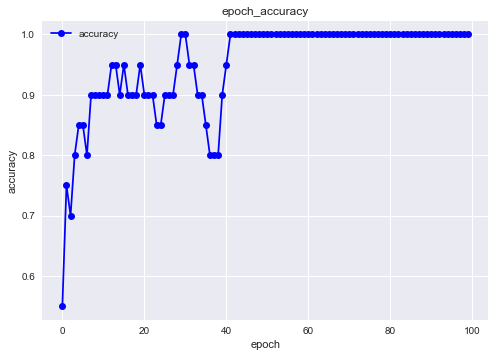

In [2]:
#loss
import os
import pandas as pd
from matplotlib import pyplot as plt

def loss_visualize(epoch, tra_loss):
    plt.style.use("seaborn")
    plt.figure()
    plt.subplot(1, 1, 1)
    plt.title("epoch_accuracy")
    plt.plot(epoch, tra_loss, label='accuracy', color='b', linestyle='-', marker='o')
#     plt.plot(epoch, val_loss, label='val_loss', linestyle='-', color='b', marker='^')
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.savefig(os.path.join(res_dir, r'epoch_acc.png'))
    plt.show()


def read_value(train_df):
    epoch = train_df['Step'].values
    train_loss = train_df['Value']
#     val_loss = val_df['Value']
    return epoch, train_loss


if __name__ == "__main__":
    root_dir = os.getcwd()
    file_dir = os.path.join(root_dir, r'E:\master_lesson\image_analysis\实验课\efficientnet')
    res_dir = os.path.join(root_dir, r'E:\master_lesson\image_analysis\实验课\efficientnet')
    train_path = os.path.join(file_dir, r'run-.-tag-accuracy.csv')
#     val_path = os.path.join(file_dir, '4_val_loss.csv')
    train_df = pd.read_csv(train_path)
#     val_df = pd.read_csv(val_path)
    epoch, train_loss= read_value(train_df)
    loss_visualize(epoch, train_loss)

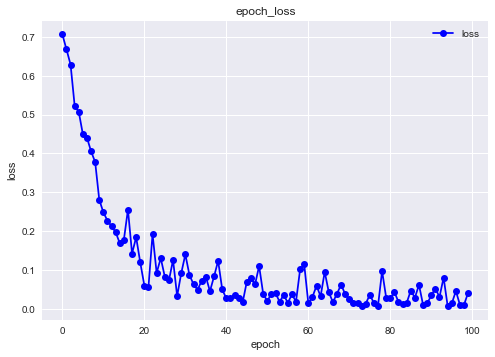

In [1]:
#loss曲线
import os
import pandas as pd
from matplotlib import pyplot as plt

def loss_visualize(epoch, tra_loss):
    plt.style.use("seaborn")
    plt.figure()
    plt.subplot(1, 1, 1)
    plt.title("epoch_loss")
    plt.plot(epoch, tra_loss, label='loss', color='b', linestyle='-', marker='o')
#     plt.plot(epoch, val_loss, label='val_loss', linestyle='-', color='b', marker='^')
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.savefig(os.path.join(res_dir, r'epoch_loss.png'))
    plt.show()


def read_value(train_df):
    epoch = train_df['Step'].values
    train_loss = train_df['Value']
#     val_loss = val_df['Value']
    return epoch, train_loss


if __name__ == "__main__":
    root_dir = os.getcwd()
    file_dir = os.path.join(root_dir, r'E:\master_lesson\image_analysis\实验课\efficientnet')
    res_dir = os.path.join(root_dir, r'E:\master_lesson\image_analysis\实验课\efficientnet')
    train_path = os.path.join(file_dir, r'run-.-tag-loss.csv')
#     val_path = os.path.join(file_dir, '4_val_loss.csv')
    train_df = pd.read_csv(train_path)
#     val_df = pd.read_csv(val_path)
    epoch, train_loss= read_value(train_df)
    loss_visualize(epoch, train_loss)

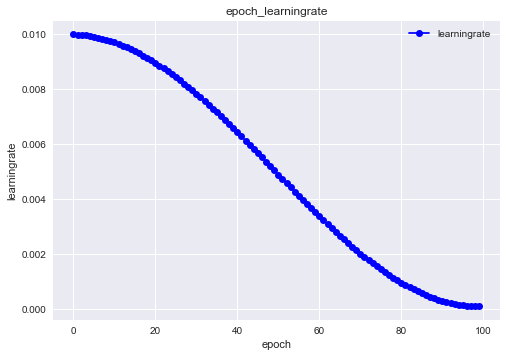

In [2]:
#学习率曲线
import os
import pandas as pd
from matplotlib import pyplot as plt

def loss_visualize(epoch, tra_loss):
    plt.style.use("seaborn")
    plt.figure()
    plt.subplot(1, 1, 1)
    plt.title("epoch_learningrate")
    plt.plot(epoch, tra_loss, label='learningrate', color='b', linestyle='-', marker='o')
#     plt.plot(epoch, val_loss, label='val_loss', linestyle='-', color='b', marker='^')
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('learningrate')
    plt.savefig(os.path.join(res_dir, r'epoch_learningrate.png'))
    plt.show()


def read_value(train_df):
    epoch = train_df['Step'].values
    train_loss = train_df['Value']
#     val_loss = val_df['Value']
    return epoch, train_loss


if __name__ == "__main__":
    root_dir = os.getcwd()
    file_dir = os.path.join(root_dir, r'E:\master_lesson\image_analysis\实验课\efficientnet')
    res_dir = os.path.join(root_dir, r'E:\master_lesson\image_analysis\实验课\efficientnet')
    train_path = os.path.join(file_dir, r'run-.-tag-learning_rate.csv')
#     val_path = os.path.join(file_dir, '4_val_loss.csv')
    train_df = pd.read_csv(train_path)
#     val_df = pd.read_csv(val_path)
    epoch, train_loss= read_value(train_df)
    loss_visualize(epoch, train_loss)

In [6]:
import pandas as pd

data = open(r'E:\trainingrecords\53-20210607_cyclegan_300epo_MN2MN\loss_MN2MN_300.txt')
res = []
for i in data:
    d = [x for x in i.strip().split(':')]#按空格分隔
    res.append(d)
save = pd.DataFrame(columns=['val','acc','val','acc','val','acc','val','acc','val','acc','val','acc','val','acc','val','acc','acc','acc','acc'], index = None, data=list(res)) #columns列名，index索引名，data数据
# print(save)
# fh = open(r'E:/trainingrecords/classfications/mobilenet_nopre_300/mobilenet.csv','w+',newline='')
# save.to_csv(fh)
# fh.close()
with open(r'E:\trainingrecords\53-20210607_cyclegan_300epo_MN2MN\loss_MN2MN_300.csv','w',newline='') as f:
#     writer=csv.writer(f)
#     writer.writerow(save)
#     writer.writerows(save)
#     f.close()
    save.to_csv(f)
    f.close()

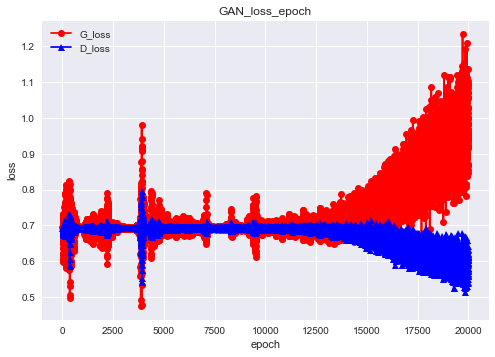

In [3]:
#G D loss
import os
import pandas as pd
from matplotlib import pyplot as plt

def loss_visualize(epoch, G_loss,D_loss):
    plt.style.use("seaborn")
    plt.figure()
    plt.subplot(1, 1, 1)
    plt.title("GAN_loss_epoch")
    plt.plot(epoch, G_loss, label='G_loss', color='r', linestyle='-', marker='o')
    plt.plot(epoch, D_loss, label='D_loss', linestyle='-', color='b', marker='^')
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.savefig(os.path.join(res_dir, r'GAN_loss_epoch.png'))
    plt.show()


def read_value(train_df):
    epoch = train_df['step']
    G_loss = train_df['G_loss']
    D_loss = train_df['D_loss']
    return epoch,G_loss,D_loss


if __name__ == "__main__":
    root_dir = os.getcwd()
    file_dir = os.path.join(root_dir, r'E:\trainingrecords\GAN\newMN_256batch_20000')
    res_dir = os.path.join(root_dir, r'E:\trainingrecords\GAN\newMN_256batch_20000')
    train_path = os.path.join(file_dir, r'E:\trainingrecords\GAN\newMN_256batch_20000\MN_average_96size_20000epo_test_loss.csv')
#     val_path = os.path.join(file_dir, '4_val_loss.csv')
    train_df = pd.read_csv(train_path)
#     val_df = pd.read_csv(val_path)
    epoch,G_loss,D_loss= read_value(train_df)
    loss_visualize(epoch,G_loss,D_loss)

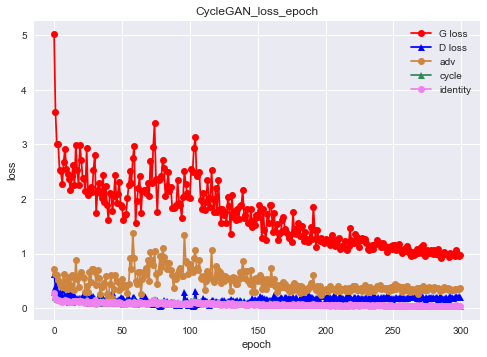

In [8]:
#cycleloss
import os
import pandas as pd
from matplotlib import pyplot as plt

def loss_visualize(epoch, G_loss,D_loss,adv,cycle,identity):
    plt.style.use("seaborn")
    plt.figure()
    plt.subplot(1, 1, 1)
    plt.title("CycleGAN_loss_epoch")
    plt.plot(epoch, G_loss, label='G loss', color='r', linestyle='-', marker='o')
    plt.plot(epoch, D_loss, label='D loss', linestyle='-', color='b', marker='^')
    plt.plot(epoch, adv, label='adv', color='peru', linestyle='-', marker='o')
    plt.plot(epoch, cycle, label='cycle', linestyle='-', color='seagreen', marker='^')
    plt.plot(epoch, identity, label='identity', color='violet', linestyle='-', marker='o')
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.savefig(os.path.join(res_dir, r'CycleGAN_loss_epoch.png'))
    plt.show()


def read_value(train_df):
    epoch = train_df['epoch']
    G_loss = train_df['G loss']
    D_loss = train_df['D loss']
    adv = train_df['adv']
    cycle = train_df['cycle']
    identity = train_df['identity']
    return epoch,G_loss,D_loss,adv,cycle,identity


if __name__ == "__main__":
    root_dir = os.getcwd()
    file_dir = os.path.join(root_dir, r'E:\trainingrecords\53-20210607_cyclegan_300epo_MN2MN')
    res_dir = os.path.join(root_dir, r'E:\trainingrecords\53-20210607_cyclegan_300epo_MN2MN')
    train_path = os.path.join(file_dir, r'E:\trainingrecords\53-20210607_cyclegan_300epo_MN2MN\loss_MN2MN_300.csv')
#     val_path = os.path.join(file_dir, '4_val_loss.csv')
    train_df = pd.read_csv(train_path)
#     val_df = pd.read_csv(val_path)
    epoch,G_loss,D_loss,adv,cycle,identity= read_value(train_df)
    loss_visualize(epoch,G_loss,D_loss,adv,cycle,identity)

逐行读取txt到csv

In [7]:
import pandas as pd

data = open(r'E:\trainingrecords\classfications\resnet_resnet34-pre_300_HPC/resnet.out')
res = []
for i in data:
    d = [x for x in i.strip().split('_accuracy:')]
    res.append(d)
save = pd.DataFrame(columns=['val','acc'], index = None, data=list(res)) #columns列名，index索引名，data数据
# print(save)
# fh = open(r'E:/trainingrecords/classfications/mobilenet_nopre_300/mobilenet.csv','w+',newline='')
# save.to_csv(fh)
# fh.close()
with open(r'E:\trainingrecords\classfications\resnet_resnet34-pre_300_HPC/resnet.csv','w',newline='') as f:
#     writer=csv.writer(f)
#     writer.writerow(save)
#     writer.writerows(save)
#     f.close()
    save.to_csv(f)
    f.close()

PermissionError: [Errno 13] Permission denied: 'E:\\trainingrecords\\classfications\\resnet_resnet34-pre_300_HPC/resnet.csv'

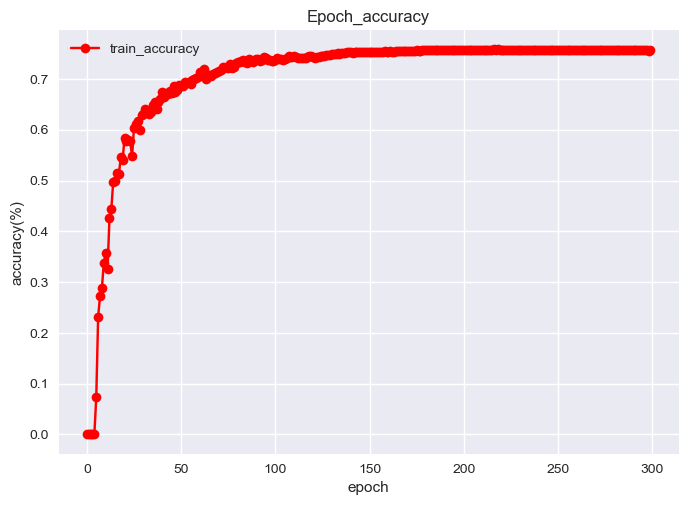

In [15]:
#acc
import os
import pandas as pd
from matplotlib import pyplot as plt

def loss_visualize(epoch, tra_loss):
    plt.style.use("seaborn")
    plt.figure()
    plt.subplot(1, 1, 1)
    plt.title("Epoch_accuracy")
    plt.plot(epoch, tra_loss, label='train_accuracy', color='r', linestyle='-', marker='o')
#     plt.plot(epoch, val_loss, label='val_loss', linestyle='-', color='b', marker='^')
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('accuracy(%)')
    plt.savefig(os.path.join(res_dir, r'yolov5_accuracy_seaborn.png'))
    plt.show()


def read_value(train_df):
    epoch = train_df['Step'].values
    train_loss = train_df['Value']
#     val_loss = val_df['Value']
    return epoch, train_loss


if __name__ == "__main__":
    root_dir = os.getcwd()
    file_dir = os.path.join(root_dir, r'E:\训练记录\classfications')
    res_dir = os.path.join(root_dir, r'E:\训练记录\classfications\results')
    train_path = os.path.join(file_dir, r'run-.-tag-metrics_mAP_0.5 0.95.csv')
#     val_path = os.path.join(file_dir, '4_val_loss.csv')
    train_df = pd.read_csv(train_path)
#     val_df = pd.read_csv(val_path)
    epoch, train_loss= read_value(train_df)
    loss_visualize(epoch, train_loss)

## 可视化神经网络特征图

In [6]:
import os
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import argparse
import skimage.data
import skimage.io
import skimage.transform
import numpy as np
import matplotlib.pyplot as plt
import torchvision.models as models
from PIL import Image
import cv2

class FeatureExtractor(nn.Module):
    def __init__(self, submodule, extracted_layers):
        super(FeatureExtractor, self).__init__()
        self.submodule = submodule
        self.extracted_layers = extracted_layers
 
    def forward(self, x):
        outputs = {}
        for name, module in self.submodule._modules.items():
            if "fc" in name: 
                x = x.view(x.size(0), -1)
            
            x = module(x)
            print(name)
            if self.extracted_layers is None or name in self.extracted_layers and 'fc' not in name:
                outputs[name] = x

        return outputs


def get_picture(pic_name, transform):
    img = skimage.io.imread(pic_name)
    img = skimage.transform.resize(img, (256, 256))
    img = np.asarray(img, dtype=np.float32)
    return transform(img)

def make_dirs(path):
    if os.path.exists(path) is False:
        os.makedirs(path)


def get_feature():
    pic_dir = '‪test\good_1_2148.jpg'
    transform = transforms.ToTensor()
    img = get_picture(pic_dir, transform)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # 插入维度
    img = img.unsqueeze(0)

    img = img.to(device)

    
    net = models.resnet101().to(device)
    net.load_state_dict(torch.load(r'E:/Targetdetection_model/yolo5_improve/weights/yolov5s.pt'))
    exact_list = None
    dst = 'test'
    therd_size = 256

    myexactor = FeatureExtractor(net, exact_list)
    outs = myexactor(img)
    for k, v in outs.items():
        features = v[0]
        iter_range = features.shape[0]
        for i in range(iter_range):
            #plt.imshow(x[0].data.numpy()[0,i,:,:],cmap='jet')
            if 'fc' in k:
                continue

            feature = features.data.numpy()
            feature_img = feature[i,:,:]
            feature_img = np.asarray(feature_img * 255, dtype=np.uint8)
            
            dst_path = os.path.join(dst, k)
            
            make_dirs(dst_path)
            feature_img = cv2.applyColorMap(feature_img, cv2.COLORMAP_JET)
            if feature_img.shape[0] < therd_size:
                tmp_file = os.path.join(dst_path, str(i) + '_' + str(therd_size) + '.png')
                tmp_img = feature_img.copy()
                tmp_img = cv2.resize(tmp_img, (therd_size,therd_size), interpolation =  cv2.INTER_NEAREST)
                cv2.imwrite(tmp_file, tmp_img)
            
            dst_file = os.path.join(dst_path, str(i) + '.png')
            cv2.imwrite(dst_file, feature_img)

if __name__ == '__main__':
    get_feature()

FileNotFoundError: No such file: 'E:\python-jupyter-work-ML\‪	est\good_1_2148.jpg'